# Benchmarking Field Transformations

### DONE - FT-HMC implemented for 8x8 2D QED (using SiLU as activation function).

- [x] Try to minimize size of the force in training. No significant improvements.
- [x]  Some test on ergodicity
- [x] (calculate the probablity of generating the configs obtained via conventional HMC).

### TODO

- [ ] Plot the force size distribution 
- [ ] Is the large force from the original action or Field-Transformation the determinant?
- [ ] If from the determinant, then the fermion force won't cause problem for HMC
- [ ] Use the same Field-Transformation for larger system (say 16x16, 32x32, 64x64, etc)
- [ ] Study how the delta H depends on the system size ( perhaps delta H ~ sqrt(volume) )
- [ ] Study the auto-correlation for observables, topo, plaq, flowed plaq, etc.
- [ ] Improving the Field-Transformation to reduce force.

## Setup, `import`'s, ..., etc

In [1]:
import os
import sys
import torch

from functools import reduce
from IPython.core.interactiveshell import InteractiveShell

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format ='retina'

InteractiveShell.ast_node_interactivity = "all"


project_dir = os.path.abspath('../../')
if project_dir not in sys.path:
    sys.path.append(project_dir)

In [2]:
from fthmc.utils.param import Param
import fthmc.utils.io as io
logger = io.Logger()

torch.manual_seed(9)

#torch.set_num_threads(param.nth)
#torch.set_num_interop_threads(param.nth_interop)
#os.environ["OMP_NUM_THREADS"] = str(param.nth)
#os.environ["KMP_BLOCKTIME"] = "0"
#os.environ["KMP_SETTINGS"] = "1"
#os.environ["KMP_AFFINITY"]= "granularity=fine,verbose,compact,1,0"

#torch.set_default_tensor_type(torch.DoubleTensor)

## Specify `Param` object

In [4]:
param = {
    'L': 8,
    'tau': 0.5,
    'nrun': 5,
    'beta': 2.0,
    'nstep': 15,
    'ntraj': 256,
    'nprint': 10,
    'seed': 1331,
    'randinit': True,
}

param = Param(**param)
logger.log(repr(param))

[04:40:30]  Param:                                                                                                                                                                                                                                              
            ----------------                                                                                                                                                                                                                                    
            beta=2.0                                                                                                                                                                                                                                            
            L=8                                                                                                                                                                                                                                                 
            tau=0.5                                                                                                                                                                                                                                             
            nstep=15                                                                                                                                                                                                                                            
            ntraj=256                                                                                                                                                                                                                                           
            nrun=5                                                                                                                                                                                                                                              
            nprint=10                                                                                                                                                                                                                                           
            seed=1331                                                                                                                                                                                                                                           
            randinit=True                                                                                                                                                                                                                                       
            nth=2                                                                                                                                                                                                                                               
            nth_interop=2                                                                                                                                                                                                                                       
            lat=[8, 8]                                                                                                                                                                                                                                          
            nd=2                                                                                                                                                                                                                                                
            shape=[2, 8, 8]                                                                                                                      

## Specify directories for saving model, etc

In [5]:
import datetime

from fthmc.train import run as hmc_run
from fthmc.config import LOGS_DIR

DAYSTR = io.get_timestamp('%Y-%m-%d')
NOW = io.get_timestamp('%Y-%m-%d-%H%M%S')

PARAM_DIR = os.path.join(LOGS_DIR, param.uniquestr())
METRICS_DIR = os.path.join(PARAM_DIR, 'metrics')
MODEL_DIR = os.path.join(PARAM_DIR, 'models')
#OUTDIR = os.path.join(METRICS_DIR)

io.check_else_make_dir(PARAM_DIR)
io.check_else_make_dir(MODEL_DIR)
io.check_else_make_dir(METRICS_DIR)

Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 92 ('figure.facecolor: 474747')
Duplicate key in file PosixPath('/home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle'), line 93 ('figure.edgecolor: 0.50')
In /home/foremans/.config/matplotlib/stylelib/dark_jupyter.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.


TORCH DEVICE: cuda


In [7]:
fields, metrics = hmc_run(param, logger=logger, keep_fields=True)

#hmc_metrics_dir = os.path.join(METRICS_DIR, 'hmc')
#metrics_file = os.path.join(hmc_metrics_dir, f'hmc_metrics_{NOW}.z')
#io.savez(metrics, metrics_file)

[04:41:10]  Param:                                                                                                                                                                                                                                              
            ----------------                                                                                                                                                                                                                                    
            beta=2.0                                                                                                                                                                                                                                            
            L=8                                                                                                                                                                                                                                                 
            tau=0.5                                                                                                                                                                                                                                             
            nstep=15                                                                                                                                                                                                                                            
            ntraj=256                                                                                                                                                                                                                                           
            nrun=5                                                                                                                                                                                                                                              
            nprint=10                                                                                                                                                                                                                                           
            seed=1331                                                                                                                                                                                                                                           
            randinit=True                                                                                                                                                                                                                                       
            nth=2                                                                                                                                                                                                                                               
            nth_interop=2                                                                                                                                                                                                                                       
            lat=[8, 8]                                                                                                                                                                                                                                          
            nd=2                                                                                                                                                                                                                                                
            shape=[2, 8, 8]                                                                                                                      

            action=-0.000 plaq=0.000 charge=-1.000

            dt=0.008 traj=2 accept=True dH=0.026 expdH=0.975 dq=4.000

[04:41:11]  dt=0.008 traj=27 accept=True dH=0.016 expdH=0.984 dq=0.000

            dt=0.008 traj=52 accept=True dH=0.005 expdH=0.995 dq=1.000

            dt=0.008 traj=77 accept=True dH=-0.011 expdH=1.012 dq=0.000

            dt=0.008 traj=102 accept=True dH=0.014 expdH=0.987 dq=0.000

            dt=0.008 traj=127 accept=True dH=-0.007 expdH=1.007 dq=0.000

[04:41:12]  dt=0.008 traj=152 accept=True dH=-0.003 expdH=1.003 dq=0.000

            dt=0.008 traj=177 accept=True dH=0.013 expdH=0.987 dq=0.000

            dt=0.008 traj=202 accept=True dH=-0.004 expdH=1.004 dq=0.000

            dt=0.008 traj=227 accept=True dH=-0.004 expdH=1.004 dq=0.000

[04:41:13]  dt=0.008 traj=252 accept=True dH=0.014 expdH=0.986 dq=0.000

            dt=0.008 traj=258 accept=True dH=-0.005 expdH=1.005 dq=0.000

            dt=0.008 traj=283 accept=True dH=0.001 expdH=0.999 dq=0.000

            dt=0.008 traj=308 accept=True dH=-0.010 expdH=1.011 dq=0.000

            dt=0.008 traj=333 accept=True dH=0.010 expdH=0.990 dq=0.000

            dt=0.008 traj=358 accept=True dH=-0.016 expdH=1.016 dq=0.000

[04:41:14]  dt=0.008 traj=383 accept=True dH=0.027 expdH=0.973 dq=0.000

            dt=0.008 traj=408 accept=True dH=0.000 expdH=1.000 dq=0.000

            dt=0.008 traj=433 accept=True dH=0.009 expdH=0.992 dq=1.000

            dt=0.008 traj=458 accept=True dH=0.002 expdH=0.998 dq=0.000

            dt=0.008 traj=483 accept=True dH=-0.019 expdH=1.019 dq=0.000

[04:41:15]  dt=0.008 traj=508 accept=True dH=0.003 expdH=0.997 dq=0.000

            dt=0.008 traj=514 accept=True dH=0.016 expdH=0.985 dq=0.000

            dt=0.008 traj=539 accept=True dH=0.006 expdH=0.994 dq=1.000

            dt=0.008 traj=564 accept=True dH=-0.004 expdH=1.004 dq=0.000

            dt=0.008 traj=589 accept=True dH=-0.005 expdH=1.005 dq=0.000

[04:41:16]  dt=0.008 traj=614 accept=True dH=-0.010 expdH=1.010 dq=1.000

            dt=0.008 traj=639 accept=True dH=0.000 expdH=1.000 dq=0.000

            dt=0.008 traj=664 accept=True dH=0.001 expdH=0.999 dq=4.000

            dt=0.008 traj=689 accept=True dH=-0.008 expdH=1.008 dq=1.000

            dt=0.008 traj=714 accept=True dH=0.009 expdH=0.991 dq=0.000

[04:41:17]  dt=0.008 traj=739 accept=True dH=0.002 expdH=0.998 dq=1.000

            dt=0.008 traj=764 accept=True dH=0.012 expdH=0.988 dq=0.000

            dt=0.008 traj=770 accept=True dH=-0.003 expdH=1.003 dq=0.000

            dt=0.008 traj=795 accept=True dH=-0.003 expdH=1.003 dq=0.000

            dt=0.008 traj=820 accept=True dH=-0.004 expdH=1.004 dq=0.000

            dt=0.008 traj=845 accept=True dH=0.006 expdH=0.994 dq=0.000

[04:41:18]  dt=0.008 traj=870 accept=True dH=-0.004 expdH=1.004 dq=0.000

            dt=0.008 traj=895 accept=True dH=-0.010 expdH=1.010 dq=0.000

            dt=0.008 traj=920 accept=True dH=-0.017 expdH=1.017 dq=1.000

            dt=0.008 traj=945 accept=True dH=-0.007 expdH=1.007 dq=0.000

[04:41:19]  dt=0.008 traj=970 accept=True dH=0.021 expdH=0.979 dq=0.000

            dt=0.008 traj=995 accept=True dH=-0.002 expdH=1.002 dq=0.000

            dt=0.008 traj=1020 accept=True dH=0.024 expdH=0.976 dq=0.000

            dt=0.008 traj=1026 accept=True dH=-0.013 expdH=1.013 dq=1.000

            dt=0.008 traj=1051 accept=True dH=-0.011 expdH=1.012 dq=1.000

            dt=0.008 traj=1076 accept=True dH=-0.015 expdH=1.015 dq=0.000

[04:41:20]  dt=0.008 traj=1101 accept=True dH=0.012 expdH=0.988 dq=0.000

            dt=0.008 traj=1126 accept=True dH=0.005 expdH=0.995 dq=4.000

            dt=0.008 traj=1151 accept=True dH=-0.000 expdH=1.000 dq=0.000

            dt=0.008 traj=1176 accept=True dH=0.001 expdH=0.999 dq=1.000

            dt=0.008 traj=1201 accept=True dH=0.009 expdH=0.991 dq=0.000

[04:41:21]  dt=0.008 traj=1226 accept=True dH=0.006 expdH=0.994 dq=0.000

            dt=0.008 traj=1251 accept=True dH=0.004 expdH=0.996 dq=1.000

            dt=0.008 traj=1276 accept=True dH=-0.010 expdH=1.010 dq=0.000

            Run times: [0.008105, 2.149925, 0.008167, 2.14422, 0.008134, 2.147762, 0.008152, 2.146298, 0.008126, 2.152133]

            Per trajectory: [3.2e-05, 0.008398, 3.2e-05, 0.008376, 3.2e-05, 0.00839, 3.2e-05, 0.008384, 3.2e-05, 0.008407]

## Specify `TrainConfig` object for training our model

Note, we train the `pre_flow_model` using the Kullback-Leibler divergence:

$$
D_{\mathrm{KL}} = \left(P\|Q\right) = \sum_{x\in\mathcal{X}} P(x)\log\left(\frac{P(x)}{Q(x)}\right)
$$

## Define `TrainConfig` and build model as
```python
model = {
    'prior': MultivariateUniform(...),
    'model': make_u1_equiv_layers(...),
}
```

In [9]:
import matplotlib as mpl

from fthmc.train import train
from fthmc.config import TrainConfig, PI
from fthmc.utils.distributions import MultivariateUniform
from fthmc.utils.layers import make_u1_equiv_layers, set_weights

import fthmc.utils.qed_helpers as qed

mpl.rcParams['text.usetex'] = False

train_config = TrainConfig(**{
    'n_era': 100,
    'n_epoch': 100,
    'n_layers': 32,
    'n_s_nets': 2,
    'hidden_sizes': [8, 8],
    'kernel_size': 3,
    'batch_size': 1024,
    'print_freq': 10,
    'plot_freq': 50,
})

link_shape = (2, *param.lat)
lattice_shape = tuple(param.lat)
#u1_action = qed.BatchAction(param.beta)
u1_action = qed.BatchAction(param.beta)

np_unif = np.random.uniform(0, 2 * PI, size=link_shape)
np_unif = torch.from_numpy(np.array(np_unif, dtype=np.float32))

if torch.cuda.is_available():
    np_unif = np_unif.cuda()
    
prior = MultivariateUniform(torch.zeros(link_shape), np_unif)
                            #TWO_PI * torch.ones(link_shape))
    
layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                              n_layers=train_config.n_layers,
                              n_mixture_comps=train_config.n_s_nets,
                              hidden_sizes=train_config.hidden_sizes,
                              kernel_size=train_config.kernel_size)

set_weights(layers)

model_init = {
    'prior': prior,
    'layers': layers,
}

### Train `model_init`:


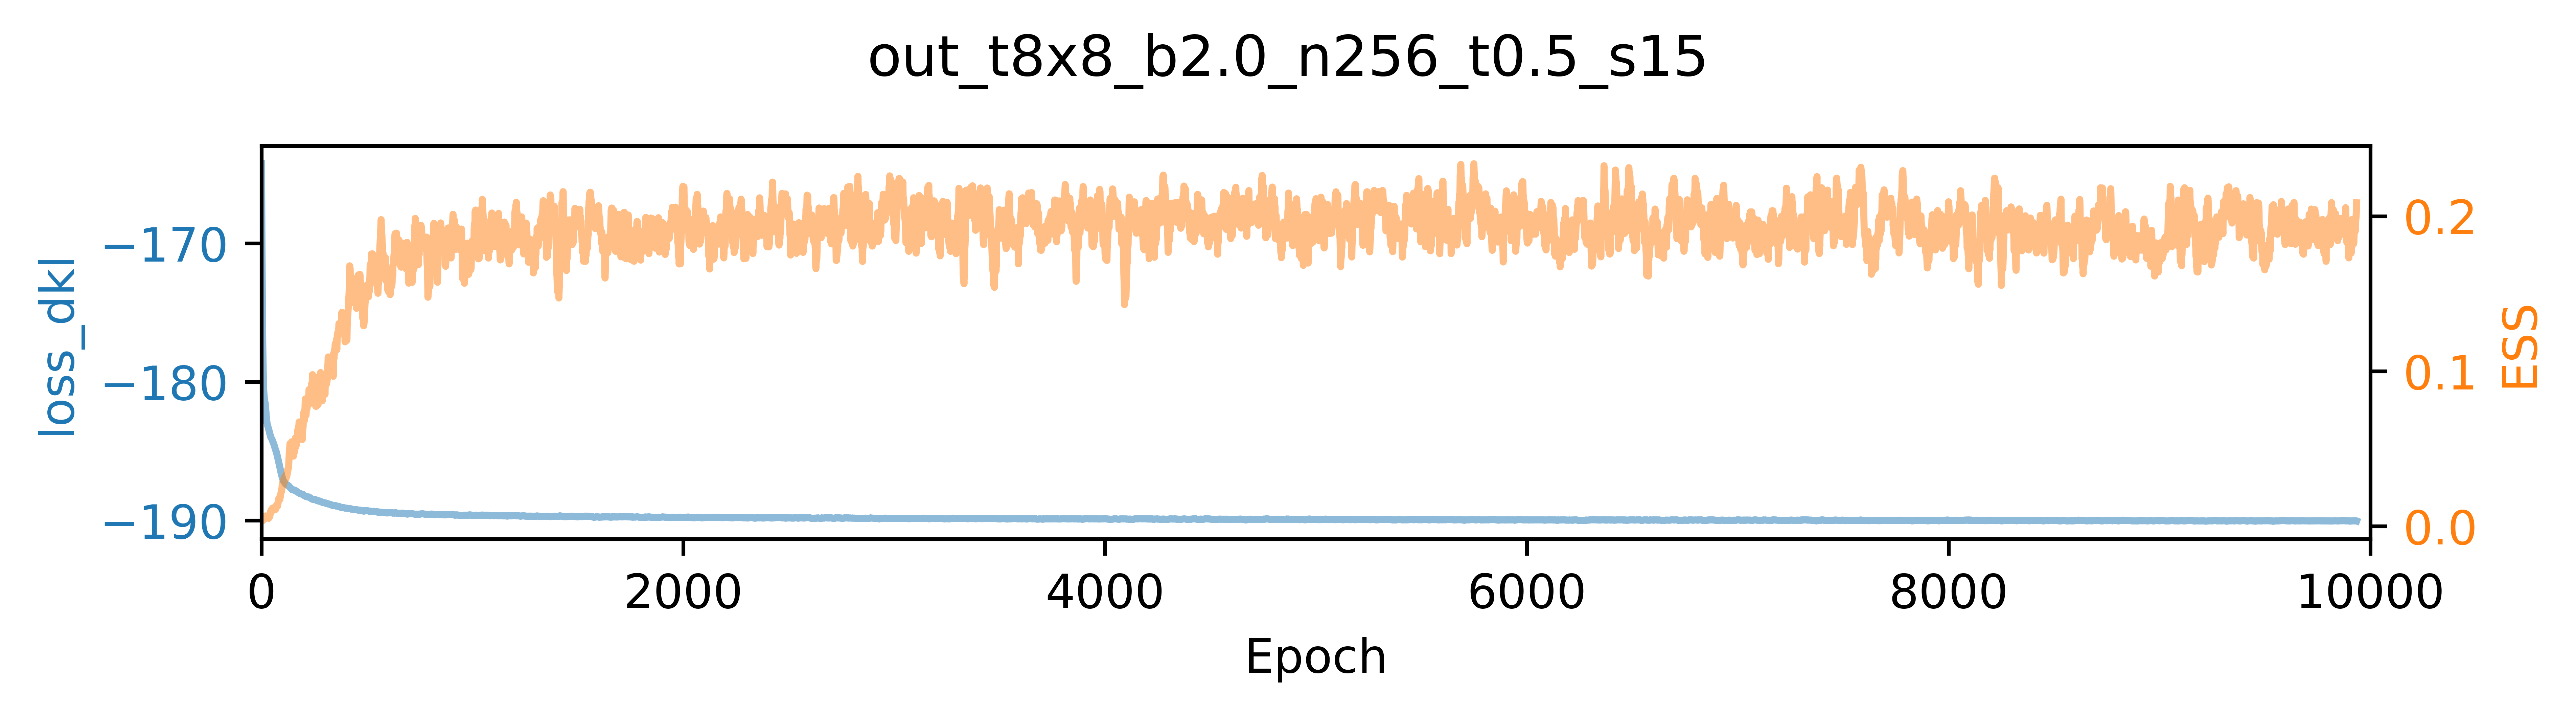

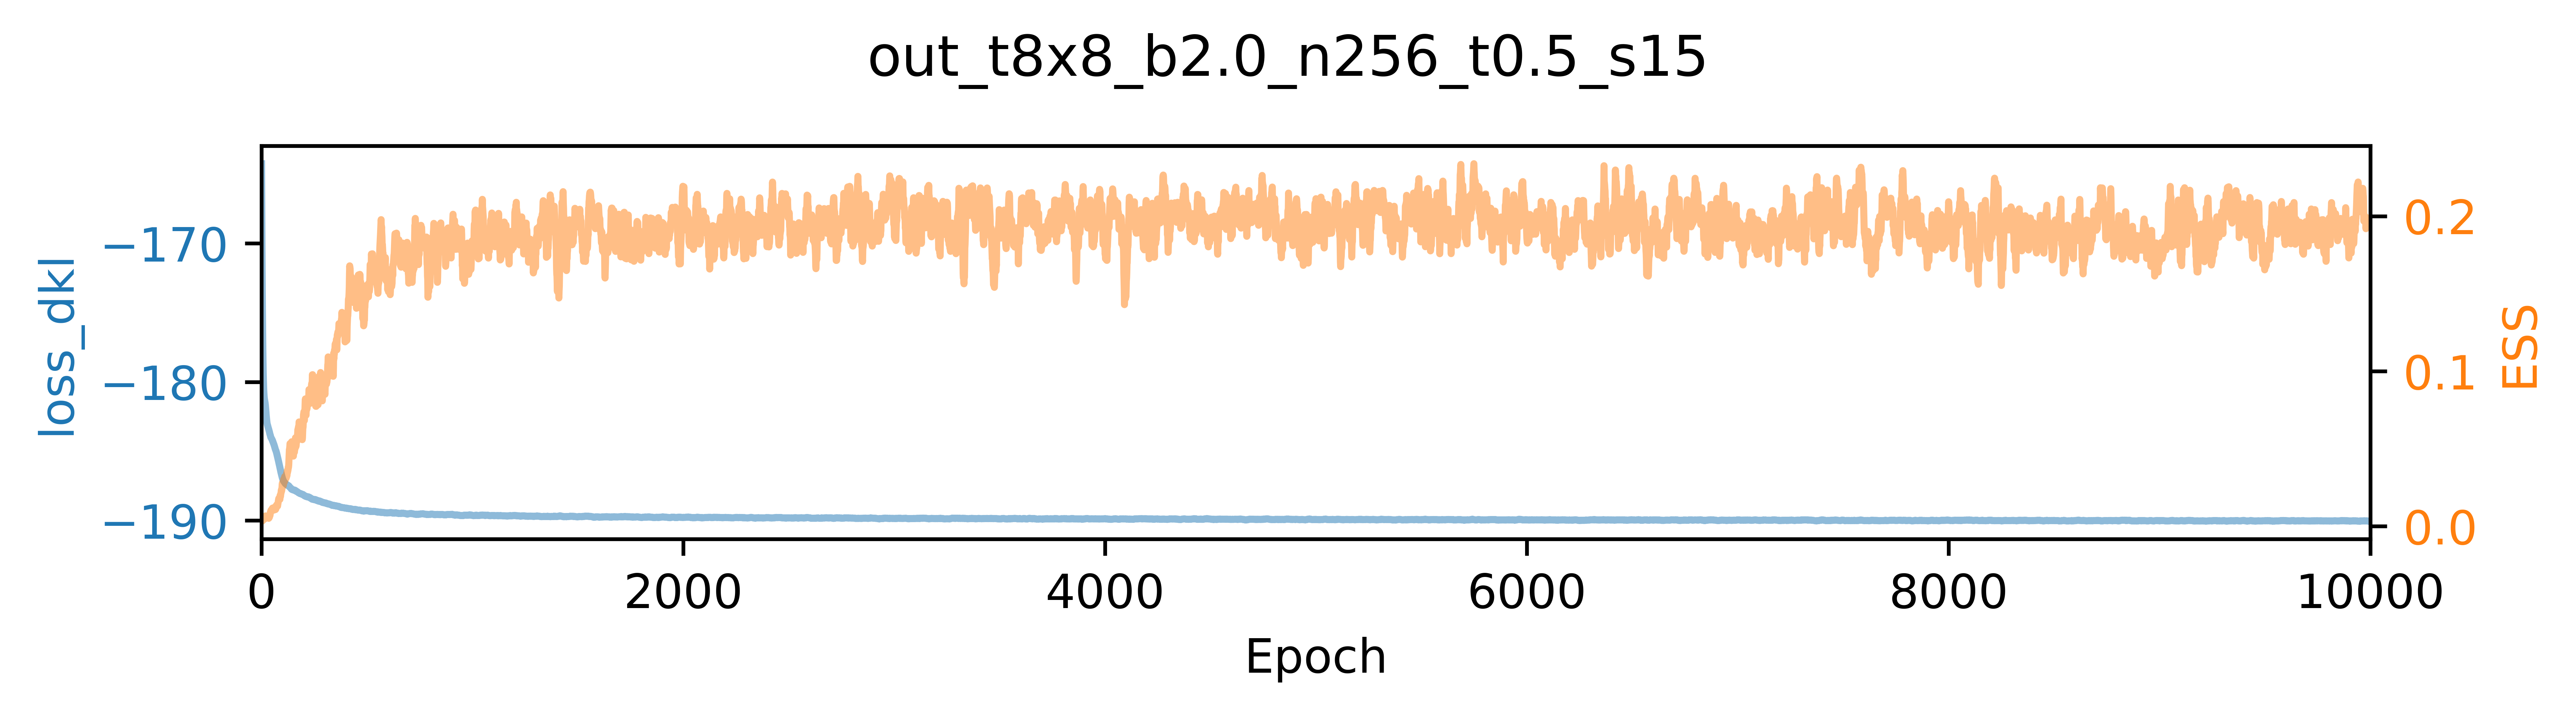

[04:42:25]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=0, last took: 0 min 0 s                                                                                                                                                                                                                         
            -------------------------------------------------------------------

[04:42:31]  epoch=7.000 dt=0.159 loss=-167.647 dq=2.580 ess=0.003 loss_dkl=-167.647 logp=37.230 logq=-130.417

[04:42:32]  epoch=17.000 dt=0.158 loss=-181.206 dq=3.008 ess=0.003 loss_dkl=-181.206 logp=78.237 logq=-102.969

[04:42:34]  epoch=27.000 dt=0.157 loss=-182.306 dq=3.071 ess=0.005 loss_dkl=-182.306 logp=78.504 logq=-103.803

[04:42:36]  epoch=37.000 dt=0.159 loss=-183.089 dq=2.792 ess=0.005 loss_dkl=-183.089 logp=69.459 logq=-113.629

[04:42:37]  epoch=47.000 dt=0.158 loss=-183.905 dq=2.826 ess=0.007 loss_dkl=-183.905 logp=73.510 logq=-110.395

[04:42:40]  epoch=57.000 dt=0.158 loss=-184.134 dq=2.907 ess=0.014 loss_dkl=-184.134 logp=77.067 logq=-107.068

[04:42:42]  epoch=67.000 dt=0.158 loss=-184.634 dq=2.795 ess=0.011 loss_dkl=-184.634 logp=75.592 logq=-109.042

[04:42:44]  epoch=77.000 dt=0.153 loss=-185.092 dq=2.883 ess=0.011 loss_dkl=-185.092 logp=76.790 logq=-108.302

[04:42:45]  epoch=87.000 dt=0.152 loss=-185.709 dq=3.056 ess=0.013 loss_dkl=-185.709 logp=78.025 logq=-107.684

[04:42:47]  epoch=97.000 dt=0.152 loss=-186.335 dq=2.724 ess=0.020 loss_dkl=-186.335 logp=79.765 logq=-106.571

[04:42:48]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=1, last took: 0 min 23.07 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:42:50]  epoch=7.000 dt=0.153 loss=-187.048 dq=2.663 ess=0.030 loss_dkl=-187.048 logp=81.599 logq=-105.449

[04:42:51]  epoch=17.000 dt=0.152 loss=-187.281 dq=2.670 ess=0.028 loss_dkl=-187.281 logp=82.872 logq=-104.408

[04:42:53]  epoch=27.000 dt=0.153 loss=-187.438 dq=2.758 ess=0.030 loss_dkl=-187.438 logp=81.956 logq=-105.481

[04:42:55]  epoch=37.000 dt=0.152 loss=-187.552 dq=2.889 ess=0.046 loss_dkl=-187.552 logp=82.981 logq=-104.572

[04:42:56]  epoch=47.000 dt=0.152 loss=-187.704 dq=2.855 ess=0.063 loss_dkl=-187.704 logp=83.352 logq=-104.352

[04:42:59]  epoch=57.000 dt=0.152 loss=-187.791 dq=2.908 ess=0.047 loss_dkl=-187.791 logp=83.324 logq=-104.467

[04:43:01]  epoch=67.000 dt=0.154 loss=-187.857 dq=2.827 ess=0.049 loss_dkl=-187.857 logp=83.762 logq=-104.095

[04:43:02]  epoch=77.000 dt=0.152 loss=-187.964 dq=2.888 ess=0.057 loss_dkl=-187.964 logp=83.834 logq=-104.131

[04:43:04]  epoch=87.000 dt=0.153 loss=-188.031 dq=2.982 ess=0.077 loss_dkl=-188.031 logp=84.145 logq=-103.886

[04:43:05]  epoch=97.000 dt=0.153 loss=-188.061 dq=3.129 ess=0.052 loss_dkl=-188.061 logp=84.217 logq=-103.843

[04:43:07]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=2, last took: 0 min 18.71 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:43:09]  epoch=7.000 dt=0.152 loss=-188.168 dq=3.005 ess=0.064 loss_dkl=-188.168 logp=84.245 logq=-103.923

[04:43:10]  epoch=17.000 dt=0.153 loss=-188.251 dq=3.210 ess=0.067 loss_dkl=-188.251 logp=84.795 logq=-103.455

[04:43:12]  epoch=27.000 dt=0.154 loss=-188.285 dq=3.312 ess=0.097 loss_dkl=-188.285 logp=84.382 logq=-103.903

[04:43:13]  epoch=37.000 dt=0.152 loss=-188.349 dq=3.285 ess=0.080 loss_dkl=-188.349 logp=84.821 logq=-103.528

[04:43:15]  epoch=47.000 dt=0.152 loss=-188.456 dq=3.296 ess=0.092 loss_dkl=-188.456 logp=84.924 logq=-103.532

[04:43:18]  epoch=57.000 dt=0.152 loss=-188.463 dq=3.453 ess=0.086 loss_dkl=-188.463 logp=85.142 logq=-103.321

[04:43:20]  epoch=67.000 dt=0.152 loss=-188.491 dq=3.375 ess=0.082 loss_dkl=-188.491 logp=84.997 logq=-103.495

[04:43:21]  epoch=77.000 dt=0.152 loss=-188.596 dq=3.557 ess=0.087 loss_dkl=-188.596 logp=85.086 logq=-103.509

[04:43:23]  epoch=87.000 dt=0.152 loss=-188.614 dq=3.538 ess=0.093 loss_dkl=-188.614 logp=85.312 logq=-103.302

[04:43:24]  epoch=97.000 dt=0.153 loss=-188.671 dq=3.574 ess=0.073 loss_dkl=-188.671 logp=85.194 logq=-103.477

[04:43:26]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=3, last took: 0 min 18.81 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:43:27]  epoch=7.000 dt=0.152 loss=-188.732 dq=3.592 ess=0.104 loss_dkl=-188.732 logp=85.464 logq=-103.269

[04:43:29]  epoch=17.000 dt=0.152 loss=-188.763 dq=3.752 ess=0.106 loss_dkl=-188.763 logp=85.490 logq=-103.273

[04:43:31]  epoch=27.000 dt=0.153 loss=-188.802 dq=3.766 ess=0.104 loss_dkl=-188.802 logp=85.517 logq=-103.284

[04:43:32]  epoch=37.000 dt=0.153 loss=-188.886 dq=3.856 ess=0.107 loss_dkl=-188.886 logp=85.651 logq=-103.235

[04:43:34]  epoch=47.000 dt=0.153 loss=-188.893 dq=3.994 ess=0.105 loss_dkl=-188.893 logp=85.768 logq=-103.125

[04:43:37]  epoch=57.000 dt=0.152 loss=-188.953 dq=4.104 ess=0.121 loss_dkl=-188.953 logp=85.784 logq=-103.169

[04:43:38]  epoch=67.000 dt=0.152 loss=-188.956 dq=3.815 ess=0.115 loss_dkl=-188.956 logp=85.806 logq=-103.150

[04:43:40]  epoch=77.000 dt=0.153 loss=-189.004 dq=3.997 ess=0.129 loss_dkl=-189.004 logp=85.989 logq=-103.014

[04:43:41]  epoch=87.000 dt=0.153 loss=-189.086 dq=3.780 ess=0.128 loss_dkl=-189.086 logp=85.972 logq=-103.114

[04:43:43]  epoch=97.000 dt=0.152 loss=-189.084 dq=3.960 ess=0.111 loss_dkl=-189.084 logp=86.293 logq=-102.791

[04:43:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=4, last took: 0 min 18.8 s                                                                                                                                                                                                                      
            -------------------------------------------------------------------

[04:43:46]  epoch=7.000 dt=0.152 loss=-189.099 dq=3.936 ess=0.117 loss_dkl=-189.099 logp=85.765 logq=-103.334

[04:43:48]  epoch=17.000 dt=0.153 loss=-189.137 dq=4.042 ess=0.115 loss_dkl=-189.137 logp=86.088 logq=-103.049

[04:43:49]  epoch=27.000 dt=0.156 loss=-189.129 dq=3.976 ess=0.163 loss_dkl=-189.129 logp=86.021 logq=-103.108

[04:43:51]  epoch=37.000 dt=0.157 loss=-189.208 dq=4.214 ess=0.152 loss_dkl=-189.209 logp=86.382 logq=-102.827

[04:43:53]  epoch=47.000 dt=0.153 loss=-189.200 dq=4.281 ess=0.160 loss_dkl=-189.200 logp=86.413 logq=-102.787

[04:43:56]  epoch=57.000 dt=0.153 loss=-189.233 dq=4.169 ess=0.149 loss_dkl=-189.233 logp=86.224 logq=-103.008

[04:43:57]  epoch=67.000 dt=0.153 loss=-189.235 dq=4.474 ess=0.180 loss_dkl=-189.235 logp=86.507 logq=-102.727

[04:43:59]  epoch=77.000 dt=0.153 loss=-189.253 dq=4.463 ess=0.141 loss_dkl=-189.253 logp=86.636 logq=-102.617

[04:44:00]  epoch=87.000 dt=0.153 loss=-189.313 dq=4.246 ess=0.115 loss_dkl=-189.313 logp=86.512 logq=-102.801

[04:44:02]  epoch=97.000 dt=0.155 loss=-189.317 dq=4.418 ess=0.152 loss_dkl=-189.317 logp=86.454 logq=-102.863

[04:44:04]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=5, last took: 0 min 18.96 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:44:05]  epoch=7.000 dt=0.153 loss=-189.299 dq=4.333 ess=0.163 loss_dkl=-189.299 logp=86.517 logq=-102.782

[04:44:07]  epoch=17.000 dt=0.153 loss=-189.321 dq=4.458 ess=0.163 loss_dkl=-189.321 logp=86.651 logq=-102.670

[04:44:08]  epoch=27.000 dt=0.155 loss=-189.342 dq=4.463 ess=0.187 loss_dkl=-189.342 logp=86.358 logq=-102.984

[04:44:10]  epoch=37.000 dt=0.154 loss=-189.357 dq=4.455 ess=0.185 loss_dkl=-189.357 logp=86.650 logq=-102.706

[04:44:11]  epoch=47.000 dt=0.154 loss=-189.339 dq=4.611 ess=0.160 loss_dkl=-189.339 logp=86.378 logq=-102.961

[04:44:15]  epoch=57.000 dt=0.156 loss=-189.360 dq=4.542 ess=0.162 loss_dkl=-189.360 logp=86.147 logq=-103.213

[04:44:16]  epoch=67.000 dt=0.153 loss=-189.380 dq=4.491 ess=0.163 loss_dkl=-189.380 logp=86.403 logq=-102.977

[04:44:18]  epoch=77.000 dt=0.153 loss=-189.418 dq=4.431 ess=0.193 loss_dkl=-189.418 logp=86.637 logq=-102.780

[04:44:19]  epoch=87.000 dt=0.154 loss=-189.417 dq=4.523 ess=0.179 loss_dkl=-189.417 logp=86.723 logq=-102.694

[04:44:21]  epoch=97.000 dt=0.155 loss=-189.460 dq=4.445 ess=0.173 loss_dkl=-189.460 logp=86.935 logq=-102.525

[04:44:23]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=6, last took: 0 min 19.01 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:44:24]  epoch=7.000 dt=0.153 loss=-189.474 dq=4.448 ess=0.180 loss_dkl=-189.474 logp=86.997 logq=-102.477

[04:44:26]  epoch=17.000 dt=0.153 loss=-189.430 dq=4.557 ess=0.165 loss_dkl=-189.430 logp=86.883 logq=-102.547

[04:44:27]  epoch=27.000 dt=0.155 loss=-189.461 dq=4.671 ess=0.158 loss_dkl=-189.461 logp=86.885 logq=-102.577

[04:44:29]  epoch=37.000 dt=0.157 loss=-189.456 dq=4.482 ess=0.168 loss_dkl=-189.456 logp=87.044 logq=-102.413

[04:44:30]  epoch=47.000 dt=0.153 loss=-189.425 dq=4.876 ess=0.183 loss_dkl=-189.425 logp=86.660 logq=-102.765

[04:44:34]  epoch=57.000 dt=0.153 loss=-189.485 dq=4.580 ess=0.165 loss_dkl=-189.485 logp=86.574 logq=-102.911

[04:44:35]  epoch=67.000 dt=0.153 loss=-189.506 dq=4.607 ess=0.165 loss_dkl=-189.506 logp=86.870 logq=-102.636

[04:44:37]  epoch=77.000 dt=0.154 loss=-189.492 dq=4.778 ess=0.177 loss_dkl=-189.492 logp=86.732 logq=-102.760

[04:44:38]  epoch=87.000 dt=0.154 loss=-189.479 dq=4.678 ess=0.154 loss_dkl=-189.479 logp=86.703 logq=-102.776

[04:44:40]  epoch=97.000 dt=0.154 loss=-189.550 dq=4.754 ess=0.162 loss_dkl=-189.550 logp=86.792 logq=-102.758

[04:44:42]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=7, last took: 0 min 19.01 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:44:43]  epoch=7.000 dt=0.154 loss=-189.497 dq=4.692 ess=0.140 loss_dkl=-189.497 logp=86.663 logq=-102.834

[04:44:45]  epoch=17.000 dt=0.153 loss=-189.499 dq=4.700 ess=0.183 loss_dkl=-189.499 logp=87.101 logq=-102.398

[04:44:46]  epoch=27.000 dt=0.153 loss=-189.511 dq=4.522 ess=0.134 loss_dkl=-189.511 logp=87.159 logq=-102.351

[04:44:48]  epoch=37.000 dt=0.155 loss=-189.559 dq=4.518 ess=0.200 loss_dkl=-189.559 logp=86.782 logq=-102.777

[04:44:50]  epoch=47.000 dt=0.154 loss=-189.587 dq=4.565 ess=0.166 loss_dkl=-189.587 logp=86.853 logq=-102.733

[04:44:53]  epoch=57.000 dt=0.173 loss=-189.532 dq=4.596 ess=0.198 loss_dkl=-189.532 logp=86.802 logq=-102.731

[04:44:55]  epoch=67.000 dt=0.174 loss=-189.498 dq=4.541 ess=0.194 loss_dkl=-189.498 logp=86.949 logq=-102.549

[04:44:56]  epoch=77.000 dt=0.157 loss=-189.504 dq=4.641 ess=0.177 loss_dkl=-189.504 logp=86.737 logq=-102.768

[04:44:58]  epoch=87.000 dt=0.154 loss=-189.563 dq=4.625 ess=0.166 loss_dkl=-189.563 logp=86.913 logq=-102.650

[04:44:59]  epoch=97.000 dt=0.154 loss=-189.571 dq=4.595 ess=0.149 loss_dkl=-189.571 logp=86.997 logq=-102.574

[04:45:01]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=8, last took: 0 min 19.42 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:45:03]  epoch=7.000 dt=0.154 loss=-189.555 dq=4.811 ess=0.196 loss_dkl=-189.555 logp=87.283 logq=-102.272

[04:45:04]  epoch=17.000 dt=0.154 loss=-189.503 dq=4.651 ess=0.191 loss_dkl=-189.503 logp=86.717 logq=-102.786

[04:45:06]  epoch=27.000 dt=0.157 loss=-189.572 dq=4.660 ess=0.192 loss_dkl=-189.572 logp=86.911 logq=-102.660

[04:45:07]  epoch=37.000 dt=0.156 loss=-189.580 dq=4.716 ess=0.154 loss_dkl=-189.580 logp=86.949 logq=-102.632

[04:45:09]  epoch=47.000 dt=0.155 loss=-189.561 dq=4.782 ess=0.163 loss_dkl=-189.561 logp=86.849 logq=-102.712

[04:45:12]  epoch=57.000 dt=0.154 loss=-189.555 dq=4.804 ess=0.186 loss_dkl=-189.555 logp=86.884 logq=-102.671

[04:45:14]  epoch=67.000 dt=0.154 loss=-189.553 dq=4.729 ess=0.178 loss_dkl=-189.553 logp=86.848 logq=-102.705

[04:45:15]  epoch=77.000 dt=0.155 loss=-189.597 dq=4.600 ess=0.158 loss_dkl=-189.597 logp=86.959 logq=-102.638

[04:45:17]  epoch=87.000 dt=0.156 loss=-189.568 dq=4.871 ess=0.181 loss_dkl=-189.568 logp=86.954 logq=-102.614

[04:45:19]  epoch=97.000 dt=0.156 loss=-189.561 dq=4.774 ess=0.175 loss_dkl=-189.561 logp=87.333 logq=-102.228

[04:45:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=9, last took: 0 min 19.17 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:45:22]  epoch=7.000 dt=0.156 loss=-189.538 dq=4.771 ess=0.180 loss_dkl=-189.538 logp=87.322 logq=-102.215

[04:45:23]  epoch=17.000 dt=0.154 loss=-189.558 dq=4.732 ess=0.212 loss_dkl=-189.558 logp=87.282 logq=-102.276

[04:45:25]  epoch=27.000 dt=0.154 loss=-189.576 dq=4.723 ess=0.192 loss_dkl=-189.576 logp=87.278 logq=-102.298

[04:45:27]  epoch=37.000 dt=0.154 loss=-189.574 dq=4.656 ess=0.211 loss_dkl=-189.574 logp=86.945 logq=-102.630

[04:45:28]  epoch=47.000 dt=0.156 loss=-189.619 dq=4.645 ess=0.179 loss_dkl=-189.619 logp=86.927 logq=-102.692

[04:45:31]  epoch=57.000 dt=0.154 loss=-189.653 dq=4.785 ess=0.163 loss_dkl=-189.653 logp=87.172 logq=-102.482

[04:45:33]  epoch=67.000 dt=0.154 loss=-189.631 dq=4.923 ess=0.160 loss_dkl=-189.631 logp=87.054 logq=-102.577

[04:45:35]  epoch=77.000 dt=0.155 loss=-189.619 dq=4.823 ess=0.165 loss_dkl=-189.619 logp=87.024 logq=-102.595

[04:45:36]  epoch=87.000 dt=0.158 loss=-189.617 dq=4.801 ess=0.159 loss_dkl=-189.617 logp=87.081 logq=-102.536

[04:45:38]  epoch=97.000 dt=0.155 loss=-189.576 dq=4.736 ess=0.165 loss_dkl=-189.576 logp=86.912 logq=-102.664

[04:45:39]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=10, last took: 0 min 19.2 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:45:41]  epoch=7.000 dt=0.154 loss=-189.612 dq=4.855 ess=0.188 loss_dkl=-189.612 logp=87.205 logq=-102.407

[04:45:43]  epoch=17.000 dt=0.154 loss=-189.662 dq=4.780 ess=0.168 loss_dkl=-189.662 logp=87.114 logq=-102.549

[04:45:44]  epoch=27.000 dt=0.155 loss=-189.598 dq=4.961 ess=0.202 loss_dkl=-189.598 logp=87.240 logq=-102.359

[04:45:46]  epoch=37.000 dt=0.156 loss=-189.626 dq=4.837 ess=0.182 loss_dkl=-189.626 logp=86.900 logq=-102.726

[04:45:47]  epoch=47.000 dt=0.155 loss=-189.615 dq=4.555 ess=0.201 loss_dkl=-189.615 logp=86.972 logq=-102.643

[04:45:51]  epoch=57.000 dt=0.154 loss=-189.577 dq=4.738 ess=0.201 loss_dkl=-189.577 logp=86.905 logq=-102.672

[04:45:52]  epoch=67.000 dt=0.154 loss=-189.640 dq=4.925 ess=0.170 loss_dkl=-189.640 logp=86.911 logq=-102.729

[04:45:54]  epoch=77.000 dt=0.157 loss=-189.590 dq=4.898 ess=0.199 loss_dkl=-189.590 logp=86.876 logq=-102.715

[04:45:55]  epoch=87.000 dt=0.154 loss=-189.646 dq=4.946 ess=0.165 loss_dkl=-189.646 logp=86.899 logq=-102.747

[04:45:57]  epoch=97.000 dt=0.154 loss=-189.632 dq=4.852 ess=0.208 loss_dkl=-189.632 logp=86.930 logq=-102.702

[04:45:59]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=11, last took: 0 min 19.13 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:46:00]  epoch=7.000 dt=0.156 loss=-189.619 dq=4.689 ess=0.207 loss_dkl=-189.619 logp=87.276 logq=-102.342

[04:46:02]  epoch=17.000 dt=0.154 loss=-189.623 dq=4.813 ess=0.183 loss_dkl=-189.623 logp=86.977 logq=-102.646

[04:46:03]  epoch=27.000 dt=0.154 loss=-189.656 dq=4.576 ess=0.214 loss_dkl=-189.656 logp=87.089 logq=-102.567

[04:46:05]  epoch=37.000 dt=0.154 loss=-189.640 dq=4.813 ess=0.163 loss_dkl=-189.640 logp=86.916 logq=-102.724

[04:46:06]  epoch=47.000 dt=0.155 loss=-189.673 dq=4.596 ess=0.189 loss_dkl=-189.673 logp=86.863 logq=-102.810

[04:46:10]  epoch=57.000 dt=0.154 loss=-189.633 dq=4.705 ess=0.178 loss_dkl=-189.633 logp=87.057 logq=-102.576

[04:46:11]  epoch=67.000 dt=0.154 loss=-189.648 dq=4.990 ess=0.194 loss_dkl=-189.648 logp=87.141 logq=-102.507

[04:46:13]  epoch=77.000 dt=0.155 loss=-189.688 dq=4.856 ess=0.171 loss_dkl=-189.688 logp=87.185 logq=-102.502

[04:46:14]  epoch=87.000 dt=0.155 loss=-189.651 dq=4.594 ess=0.182 loss_dkl=-189.651 logp=87.096 logq=-102.555

[04:46:16]  epoch=97.000 dt=0.155 loss=-189.646 dq=4.700 ess=0.192 loss_dkl=-189.646 logp=86.925 logq=-102.721

[04:46:18]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=12, last took: 0 min 19.1 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:46:19]  epoch=7.000 dt=0.154 loss=-189.634 dq=4.567 ess=0.202 loss_dkl=-189.634 logp=86.959 logq=-102.675

[04:46:21]  epoch=17.000 dt=0.164 loss=-189.678 dq=4.683 ess=0.190 loss_dkl=-189.678 logp=86.886 logq=-102.792

[04:46:22]  epoch=27.000 dt=0.158 loss=-189.656 dq=4.788 ess=0.197 loss_dkl=-189.656 logp=87.307 logq=-102.349

[04:46:24]  epoch=37.000 dt=0.155 loss=-189.665 dq=4.586 ess=0.192 loss_dkl=-189.665 logp=87.300 logq=-102.365

[04:46:26]  epoch=47.000 dt=0.155 loss=-189.644 dq=4.721 ess=0.179 loss_dkl=-189.644 logp=87.138 logq=-102.506

[04:46:29]  epoch=57.000 dt=0.160 loss=-189.672 dq=4.812 ess=0.209 loss_dkl=-189.672 logp=87.213 logq=-102.458

[04:46:31]  epoch=67.000 dt=0.155 loss=-189.697 dq=4.499 ess=0.186 loss_dkl=-189.697 logp=87.257 logq=-102.440

[04:46:32]  epoch=77.000 dt=0.177 loss=-189.680 dq=4.609 ess=0.175 loss_dkl=-189.680 logp=86.870 logq=-102.810

[04:46:34]  epoch=87.000 dt=0.162 loss=-189.689 dq=4.570 ess=0.185 loss_dkl=-189.689 logp=87.142 logq=-102.547

[04:46:36]  epoch=97.000 dt=0.157 loss=-189.682 dq=4.651 ess=0.195 loss_dkl=-189.682 logp=86.858 logq=-102.824

[04:46:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=13, last took: 0 min 19.7 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:46:39]  epoch=7.000 dt=0.155 loss=-189.666 dq=4.926 ess=0.169 loss_dkl=-189.666 logp=87.141 logq=-102.524

[04:46:41]  epoch=17.000 dt=0.155 loss=-189.673 dq=4.645 ess=0.177 loss_dkl=-189.673 logp=87.047 logq=-102.626

[04:46:42]  epoch=27.000 dt=0.159 loss=-189.689 dq=4.680 ess=0.198 loss_dkl=-189.689 logp=87.298 logq=-102.391

[04:46:44]  epoch=37.000 dt=0.158 loss=-189.703 dq=4.574 ess=0.220 loss_dkl=-189.703 logp=87.527 logq=-102.175

[04:46:45]  epoch=47.000 dt=0.155 loss=-189.700 dq=4.922 ess=0.202 loss_dkl=-189.700 logp=87.462 logq=-102.238

[04:46:49]  epoch=57.000 dt=0.155 loss=-189.720 dq=4.882 ess=0.207 loss_dkl=-189.720 logp=87.623 logq=-102.097

[04:46:50]  epoch=67.000 dt=0.155 loss=-189.681 dq=4.792 ess=0.171 loss_dkl=-189.681 logp=87.401 logq=-102.280

[04:46:52]  epoch=77.000 dt=0.155 loss=-189.715 dq=4.917 ess=0.218 loss_dkl=-189.715 logp=87.183 logq=-102.532

[04:46:53]  epoch=87.000 dt=0.157 loss=-189.683 dq=4.724 ess=0.182 loss_dkl=-189.683 logp=87.231 logq=-102.452

[04:46:55]  epoch=97.000 dt=0.156 loss=-189.677 dq=4.767 ess=0.219 loss_dkl=-189.677 logp=86.893 logq=-102.784

[04:46:57]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=14, last took: 0 min 19.36 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:46:58]  epoch=7.000 dt=0.157 loss=-189.718 dq=4.833 ess=0.188 loss_dkl=-189.718 logp=87.019 logq=-102.699

[04:47:00]  epoch=17.000 dt=0.156 loss=-189.674 dq=4.809 ess=0.150 loss_dkl=-189.674 logp=87.074 logq=-102.600

[04:47:02]  epoch=27.000 dt=0.155 loss=-189.670 dq=4.777 ess=0.188 loss_dkl=-189.670 logp=87.074 logq=-102.596

[04:47:03]  epoch=37.000 dt=0.155 loss=-189.729 dq=4.645 ess=0.212 loss_dkl=-189.729 logp=86.924 logq=-102.805

[04:47:05]  epoch=47.000 dt=0.155 loss=-189.741 dq=4.804 ess=0.165 loss_dkl=-189.741 logp=87.058 logq=-102.683

[04:47:08]  epoch=57.000 dt=0.155 loss=-189.731 dq=4.596 ess=0.201 loss_dkl=-189.731 logp=87.164 logq=-102.568

[04:47:10]  epoch=67.000 dt=0.176 loss=-189.692 dq=5.074 ess=0.180 loss_dkl=-189.692 logp=87.258 logq=-102.433

[04:47:11]  epoch=77.000 dt=0.160 loss=-189.682 dq=4.662 ess=0.201 loss_dkl=-189.682 logp=87.204 logq=-102.478

[04:47:13]  epoch=87.000 dt=0.155 loss=-189.693 dq=4.789 ess=0.199 loss_dkl=-189.693 logp=87.010 logq=-102.684

[04:47:15]  epoch=97.000 dt=0.155 loss=-189.731 dq=4.837 ess=0.191 loss_dkl=-189.731 logp=87.255 logq=-102.476

[04:47:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=15, last took: 0 min 19.55 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:47:18]  epoch=7.000 dt=0.155 loss=-189.751 dq=4.765 ess=0.193 loss_dkl=-189.751 logp=87.267 logq=-102.484

[04:47:19]  epoch=17.000 dt=0.155 loss=-189.724 dq=4.786 ess=0.203 loss_dkl=-189.724 logp=87.143 logq=-102.581

[04:47:21]  epoch=27.000 dt=0.158 loss=-189.690 dq=4.854 ess=0.195 loss_dkl=-189.690 logp=87.106 logq=-102.584

[04:47:23]  epoch=37.000 dt=0.157 loss=-189.679 dq=4.672 ess=0.178 loss_dkl=-189.679 logp=86.810 logq=-102.870

[04:47:24]  epoch=47.000 dt=0.158 loss=-189.692 dq=4.731 ess=0.151 loss_dkl=-189.692 logp=87.286 logq=-102.407

[04:47:28]  epoch=57.000 dt=0.155 loss=-189.704 dq=4.740 ess=0.184 loss_dkl=-189.704 logp=87.164 logq=-102.540

[04:47:29]  epoch=67.000 dt=0.155 loss=-189.708 dq=4.842 ess=0.245 loss_dkl=-189.708 logp=87.240 logq=-102.468

[04:47:31]  epoch=77.000 dt=0.157 loss=-189.732 dq=4.691 ess=0.195 loss_dkl=-189.732 logp=87.417 logq=-102.315

[04:47:32]  epoch=87.000 dt=0.157 loss=-189.763 dq=4.648 ess=0.183 loss_dkl=-189.763 logp=87.399 logq=-102.364

[04:47:34]  epoch=97.000 dt=0.157 loss=-189.743 dq=4.573 ess=0.203 loss_dkl=-189.743 logp=87.380 logq=-102.363

[04:47:36]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=16, last took: 0 min 19.42 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:47:37]  epoch=7.000 dt=0.156 loss=-189.736 dq=4.850 ess=0.189 loss_dkl=-189.736 logp=87.243 logq=-102.493

[04:47:39]  epoch=17.000 dt=0.157 loss=-189.751 dq=4.925 ess=0.178 loss_dkl=-189.751 logp=87.351 logq=-102.400

[04:47:41]  epoch=27.000 dt=0.156 loss=-189.751 dq=4.870 ess=0.203 loss_dkl=-189.751 logp=87.484 logq=-102.266

[04:47:42]  epoch=37.000 dt=0.155 loss=-189.733 dq=4.627 ess=0.171 loss_dkl=-189.733 logp=87.421 logq=-102.313

[04:47:44]  epoch=47.000 dt=0.155 loss=-189.742 dq=4.777 ess=0.197 loss_dkl=-189.741 logp=87.203 logq=-102.539

[04:47:47]  epoch=57.000 dt=0.178 loss=-189.742 dq=4.690 ess=0.179 loss_dkl=-189.742 logp=87.429 logq=-102.314

[04:47:49]  epoch=67.000 dt=0.176 loss=-189.747 dq=4.822 ess=0.178 loss_dkl=-189.747 logp=87.203 logq=-102.544

[04:47:51]  epoch=77.000 dt=0.161 loss=-189.739 dq=4.728 ess=0.152 loss_dkl=-189.739 logp=87.462 logq=-102.277

[04:47:52]  epoch=87.000 dt=0.156 loss=-189.751 dq=4.946 ess=0.161 loss_dkl=-189.751 logp=87.411 logq=-102.340

[04:47:54]  epoch=97.000 dt=0.168 loss=-189.724 dq=4.778 ess=0.198 loss_dkl=-189.724 logp=87.374 logq=-102.349

[04:47:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=17, last took: 0 min 20.03 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:47:57]  epoch=7.000 dt=0.157 loss=-189.738 dq=4.569 ess=0.196 loss_dkl=-189.738 logp=87.073 logq=-102.665

[04:47:59]  epoch=17.000 dt=0.156 loss=-189.740 dq=4.710 ess=0.154 loss_dkl=-189.740 logp=87.288 logq=-102.452

[04:48:01]  epoch=27.000 dt=0.162 loss=-189.725 dq=5.003 ess=0.191 loss_dkl=-189.726 logp=87.078 logq=-102.648

[04:48:02]  epoch=37.000 dt=0.160 loss=-189.729 dq=4.713 ess=0.152 loss_dkl=-189.729 logp=87.684 logq=-102.045

[04:48:04]  epoch=47.000 dt=0.159 loss=-189.724 dq=4.783 ess=0.203 loss_dkl=-189.724 logp=87.399 logq=-102.325

[04:48:07]  epoch=57.000 dt=0.178 loss=-189.730 dq=4.734 ess=0.165 loss_dkl=-189.730 logp=87.715 logq=-102.015

[04:48:09]  epoch=67.000 dt=0.178 loss=-189.743 dq=4.849 ess=0.163 loss_dkl=-189.743 logp=87.308 logq=-102.435

[04:48:11]  epoch=77.000 dt=0.170 loss=-189.755 dq=4.759 ess=0.165 loss_dkl=-189.755 logp=87.346 logq=-102.410

[04:48:13]  epoch=87.000 dt=0.161 loss=-189.700 dq=4.699 ess=0.176 loss_dkl=-189.700 logp=87.377 logq=-102.323

[04:48:14]  epoch=97.000 dt=0.161 loss=-189.761 dq=4.782 ess=0.187 loss_dkl=-189.761 logp=87.469 logq=-102.291

[04:48:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=18, last took: 0 min 20.35 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:48:18]  epoch=7.000 dt=0.177 loss=-189.777 dq=4.750 ess=0.178 loss_dkl=-189.777 logp=87.518 logq=-102.260

[04:48:20]  epoch=17.000 dt=0.175 loss=-189.754 dq=4.599 ess=0.170 loss_dkl=-189.754 logp=87.378 logq=-102.376

[04:48:21]  epoch=27.000 dt=0.162 loss=-189.762 dq=4.768 ess=0.180 loss_dkl=-189.762 logp=87.345 logq=-102.418

[04:48:23]  epoch=37.000 dt=0.156 loss=-189.747 dq=4.806 ess=0.207 loss_dkl=-189.747 logp=87.460 logq=-102.287

[04:48:25]  epoch=47.000 dt=0.156 loss=-189.724 dq=4.755 ess=0.192 loss_dkl=-189.724 logp=87.560 logq=-102.164

[04:48:28]  epoch=57.000 dt=0.157 loss=-189.774 dq=4.810 ess=0.199 loss_dkl=-189.774 logp=87.395 logq=-102.380

[04:48:30]  epoch=67.000 dt=0.156 loss=-189.765 dq=4.777 ess=0.198 loss_dkl=-189.765 logp=87.284 logq=-102.481

[04:48:31]  epoch=77.000 dt=0.158 loss=-189.766 dq=5.016 ess=0.147 loss_dkl=-189.766 logp=87.004 logq=-102.762

[04:48:33]  epoch=87.000 dt=0.158 loss=-189.784 dq=4.583 ess=0.175 loss_dkl=-189.784 logp=87.082 logq=-102.701

[04:48:34]  epoch=97.000 dt=0.158 loss=-189.769 dq=4.676 ess=0.191 loss_dkl=-189.769 logp=87.476 logq=-102.293

[04:48:36]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=19, last took: 0 min 20.08 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:48:38]  epoch=7.000 dt=0.157 loss=-189.724 dq=4.795 ess=0.189 loss_dkl=-189.724 logp=86.759 logq=-102.965

[04:48:39]  epoch=17.000 dt=0.157 loss=-189.761 dq=4.824 ess=0.199 loss_dkl=-189.761 logp=87.378 logq=-102.384

[04:48:41]  epoch=27.000 dt=0.159 loss=-189.771 dq=4.884 ess=0.178 loss_dkl=-189.771 logp=87.263 logq=-102.509

[04:48:43]  epoch=37.000 dt=0.161 loss=-189.776 dq=4.801 ess=0.198 loss_dkl=-189.776 logp=87.479 logq=-102.296

[04:48:44]  epoch=47.000 dt=0.159 loss=-189.794 dq=5.018 ess=0.195 loss_dkl=-189.794 logp=87.286 logq=-102.508

[04:48:48]  epoch=57.000 dt=0.158 loss=-189.742 dq=4.850 ess=0.194 loss_dkl=-189.742 logp=87.472 logq=-102.270

[04:48:49]  epoch=67.000 dt=0.156 loss=-189.776 dq=4.969 ess=0.197 loss_dkl=-189.776 logp=87.128 logq=-102.648

[04:48:51]  epoch=77.000 dt=0.157 loss=-189.776 dq=4.914 ess=0.204 loss_dkl=-189.776 logp=87.334 logq=-102.442

[04:48:52]  epoch=87.000 dt=0.156 loss=-189.719 dq=4.809 ess=0.178 loss_dkl=-189.719 logp=87.292 logq=-102.426

[04:48:54]  epoch=97.000 dt=0.158 loss=-189.774 dq=4.629 ess=0.185 loss_dkl=-189.774 logp=87.642 logq=-102.133

[04:48:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=20, last took: 0 min 19.64 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:48:57]  epoch=7.000 dt=0.157 loss=-189.778 dq=4.768 ess=0.226 loss_dkl=-189.778 logp=87.446 logq=-102.332

[04:48:59]  epoch=17.000 dt=0.178 loss=-189.772 dq=4.568 ess=0.187 loss_dkl=-189.772 logp=87.542 logq=-102.230

[04:49:01]  epoch=27.000 dt=0.162 loss=-189.749 dq=4.673 ess=0.232 loss_dkl=-189.749 logp=87.926 logq=-101.823

[04:49:03]  epoch=37.000 dt=0.159 loss=-189.764 dq=4.724 ess=0.180 loss_dkl=-189.764 logp=87.553 logq=-102.211

[04:49:04]  epoch=47.000 dt=0.156 loss=-189.793 dq=4.854 ess=0.192 loss_dkl=-189.793 logp=87.536 logq=-102.257

[04:49:08]  epoch=57.000 dt=0.156 loss=-189.803 dq=4.996 ess=0.163 loss_dkl=-189.803 logp=87.580 logq=-102.223

[04:49:09]  epoch=67.000 dt=0.156 loss=-189.808 dq=4.715 ess=0.206 loss_dkl=-189.808 logp=87.388 logq=-102.420

[04:49:11]  epoch=77.000 dt=0.158 loss=-189.769 dq=4.697 ess=0.199 loss_dkl=-189.769 logp=87.556 logq=-102.213

[04:49:12]  epoch=87.000 dt=0.159 loss=-189.772 dq=4.829 ess=0.180 loss_dkl=-189.772 logp=87.184 logq=-102.587

[04:49:14]  epoch=97.000 dt=0.156 loss=-189.803 dq=4.774 ess=0.204 loss_dkl=-189.803 logp=87.365 logq=-102.438

[04:49:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=21, last took: 0 min 19.97 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:49:17]  epoch=7.000 dt=0.157 loss=-189.797 dq=4.851 ess=0.212 loss_dkl=-189.797 logp=87.555 logq=-102.242

[04:49:19]  epoch=17.000 dt=0.156 loss=-189.762 dq=4.981 ess=0.210 loss_dkl=-189.762 logp=87.762 logq=-102.000

[04:49:21]  epoch=27.000 dt=0.159 loss=-189.768 dq=4.979 ess=0.156 loss_dkl=-189.768 logp=87.305 logq=-102.463

[04:49:22]  epoch=37.000 dt=0.158 loss=-189.780 dq=4.860 ess=0.174 loss_dkl=-189.780 logp=87.182 logq=-102.597

[04:49:24]  epoch=47.000 dt=0.157 loss=-189.799 dq=5.063 ess=0.178 loss_dkl=-189.799 logp=87.315 logq=-102.485

[04:49:27]  epoch=57.000 dt=0.158 loss=-189.783 dq=5.104 ess=0.147 loss_dkl=-189.783 logp=87.179 logq=-102.604

[04:49:29]  epoch=67.000 dt=0.157 loss=-189.776 dq=5.034 ess=0.178 loss_dkl=-189.776 logp=87.382 logq=-102.394

[04:49:30]  epoch=77.000 dt=0.157 loss=-189.793 dq=4.911 ess=0.220 loss_dkl=-189.793 logp=87.645 logq=-102.149

[04:49:32]  epoch=87.000 dt=0.157 loss=-189.792 dq=4.709 ess=0.194 loss_dkl=-189.792 logp=87.242 logq=-102.550

[04:49:34]  epoch=97.000 dt=0.157 loss=-189.796 dq=4.868 ess=0.187 loss_dkl=-189.796 logp=87.491 logq=-102.305

[04:49:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=22, last took: 0 min 19.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:49:37]  epoch=7.000 dt=0.157 loss=-189.772 dq=4.710 ess=0.188 loss_dkl=-189.772 logp=87.307 logq=-102.465

[04:49:39]  epoch=17.000 dt=0.157 loss=-189.801 dq=4.778 ess=0.206 loss_dkl=-189.801 logp=87.591 logq=-102.210

[04:49:40]  epoch=27.000 dt=0.158 loss=-189.797 dq=4.802 ess=0.213 loss_dkl=-189.797 logp=87.404 logq=-102.393

[04:49:42]  epoch=37.000 dt=0.159 loss=-189.823 dq=4.867 ess=0.173 loss_dkl=-189.823 logp=87.527 logq=-102.296

[04:49:43]  epoch=47.000 dt=0.158 loss=-189.806 dq=4.865 ess=0.184 loss_dkl=-189.806 logp=87.542 logq=-102.264

[04:49:47]  epoch=57.000 dt=0.158 loss=-189.764 dq=5.051 ess=0.184 loss_dkl=-189.764 logp=87.669 logq=-102.095

[04:49:48]  epoch=67.000 dt=0.157 loss=-189.757 dq=4.877 ess=0.192 loss_dkl=-189.757 logp=87.416 logq=-102.341

[04:49:50]  epoch=77.000 dt=0.157 loss=-189.759 dq=4.721 ess=0.230 loss_dkl=-189.759 logp=87.528 logq=-102.231

[04:49:52]  epoch=87.000 dt=0.158 loss=-189.817 dq=4.960 ess=0.195 loss_dkl=-189.817 logp=87.543 logq=-102.273

[04:49:53]  epoch=97.000 dt=0.157 loss=-189.805 dq=4.842 ess=0.142 loss_dkl=-189.805 logp=87.565 logq=-102.240

[04:49:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=23, last took: 0 min 19.57 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:49:57]  epoch=7.000 dt=0.157 loss=-189.825 dq=4.969 ess=0.193 loss_dkl=-189.825 logp=87.326 logq=-102.499

[04:49:58]  epoch=17.000 dt=0.157 loss=-189.818 dq=4.840 ess=0.224 loss_dkl=-189.818 logp=87.735 logq=-102.083

[04:50:00]  epoch=27.000 dt=0.157 loss=-189.793 dq=4.868 ess=0.210 loss_dkl=-189.793 logp=87.426 logq=-102.367

[04:50:01]  epoch=37.000 dt=0.162 loss=-189.794 dq=4.954 ess=0.200 loss_dkl=-189.794 logp=87.544 logq=-102.251

[04:50:03]  epoch=47.000 dt=0.157 loss=-189.816 dq=4.829 ess=0.214 loss_dkl=-189.816 logp=87.392 logq=-102.425

[04:50:06]  epoch=57.000 dt=0.157 loss=-189.758 dq=4.790 ess=0.177 loss_dkl=-189.758 logp=86.979 logq=-102.780

[04:50:08]  epoch=67.000 dt=0.166 loss=-189.793 dq=4.825 ess=0.198 loss_dkl=-189.793 logp=87.287 logq=-102.506

[04:50:10]  epoch=77.000 dt=0.163 loss=-189.820 dq=4.880 ess=0.214 loss_dkl=-189.820 logp=87.436 logq=-102.385

[04:50:12]  epoch=87.000 dt=0.163 loss=-189.830 dq=4.916 ess=0.187 loss_dkl=-189.830 logp=87.498 logq=-102.333

[04:50:13]  epoch=97.000 dt=0.158 loss=-189.803 dq=4.850 ess=0.176 loss_dkl=-189.803 logp=87.356 logq=-102.447

[04:50:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=24, last took: 0 min 19.89 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:50:16]  epoch=7.000 dt=0.158 loss=-189.794 dq=4.873 ess=0.194 loss_dkl=-189.794 logp=87.294 logq=-102.500

[04:50:18]  epoch=17.000 dt=0.158 loss=-189.801 dq=4.885 ess=0.173 loss_dkl=-189.801 logp=87.553 logq=-102.249

[04:50:20]  epoch=27.000 dt=0.162 loss=-189.827 dq=4.481 ess=0.235 loss_dkl=-189.827 logp=87.318 logq=-102.509

[04:50:21]  epoch=37.000 dt=0.161 loss=-189.816 dq=4.638 ess=0.216 loss_dkl=-189.816 logp=87.516 logq=-102.299

[04:50:23]  epoch=47.000 dt=0.158 loss=-189.791 dq=4.627 ess=0.186 loss_dkl=-189.791 logp=87.250 logq=-102.540

[04:50:26]  epoch=57.000 dt=0.158 loss=-189.771 dq=4.651 ess=0.210 loss_dkl=-189.771 logp=87.274 logq=-102.497

[04:50:28]  epoch=67.000 dt=0.158 loss=-189.767 dq=4.548 ess=0.180 loss_dkl=-189.767 logp=87.234 logq=-102.533

[04:50:30]  epoch=77.000 dt=0.161 loss=-189.808 dq=4.685 ess=0.211 loss_dkl=-189.808 logp=87.340 logq=-102.468

[04:50:31]  epoch=87.000 dt=0.161 loss=-189.797 dq=4.554 ess=0.239 loss_dkl=-189.797 logp=87.304 logq=-102.493

[04:50:33]  epoch=97.000 dt=0.160 loss=-189.805 dq=4.583 ess=0.203 loss_dkl=-189.805 logp=87.354 logq=-102.450

[04:50:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=25, last took: 0 min 19.86 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:50:36]  epoch=7.000 dt=0.158 loss=-189.783 dq=4.758 ess=0.213 loss_dkl=-189.783 logp=87.660 logq=-102.123

[04:50:38]  epoch=17.000 dt=0.158 loss=-189.800 dq=4.774 ess=0.179 loss_dkl=-189.800 logp=87.590 logq=-102.210

[04:50:40]  epoch=27.000 dt=0.162 loss=-189.829 dq=4.731 ess=0.199 loss_dkl=-189.829 logp=87.494 logq=-102.335

[04:50:41]  epoch=37.000 dt=0.159 loss=-189.793 dq=4.662 ess=0.158 loss_dkl=-189.793 logp=87.627 logq=-102.166

[04:50:43]  epoch=47.000 dt=0.158 loss=-189.858 dq=4.810 ess=0.221 loss_dkl=-189.858 logp=87.721 logq=-102.137

[04:50:46]  epoch=57.000 dt=0.158 loss=-189.836 dq=4.900 ess=0.175 loss_dkl=-189.836 logp=87.683 logq=-102.153

[04:50:48]  epoch=67.000 dt=0.158 loss=-189.777 dq=4.656 ess=0.174 loss_dkl=-189.777 logp=87.321 logq=-102.456

[04:50:50]  epoch=77.000 dt=0.160 loss=-189.822 dq=4.528 ess=0.201 loss_dkl=-189.822 logp=87.773 logq=-102.049

[04:50:51]  epoch=87.000 dt=0.160 loss=-189.805 dq=4.600 ess=0.171 loss_dkl=-189.805 logp=87.008 logq=-102.797

[04:50:53]  epoch=97.000 dt=0.160 loss=-189.799 dq=4.785 ess=0.208 loss_dkl=-189.799 logp=87.275 logq=-102.525

[04:50:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=26, last took: 0 min 19.9 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:50:56]  epoch=7.000 dt=0.177 loss=-189.792 dq=4.607 ess=0.178 loss_dkl=-189.792 logp=87.105 logq=-102.687

[04:50:58]  epoch=17.000 dt=0.180 loss=-189.822 dq=4.758 ess=0.177 loss_dkl=-189.822 logp=87.724 logq=-102.098

[04:51:00]  epoch=27.000 dt=0.169 loss=-189.840 dq=4.888 ess=0.202 loss_dkl=-189.840 logp=87.672 logq=-102.168

[04:51:02]  epoch=37.000 dt=0.159 loss=-189.843 dq=4.660 ess=0.167 loss_dkl=-189.843 logp=87.386 logq=-102.458

[04:51:03]  epoch=47.000 dt=0.158 loss=-189.809 dq=4.920 ess=0.217 loss_dkl=-189.809 logp=87.312 logq=-102.497

[04:51:07]  epoch=57.000 dt=0.158 loss=-189.832 dq=4.744 ess=0.179 loss_dkl=-189.832 logp=87.413 logq=-102.420

[04:51:08]  epoch=67.000 dt=0.158 loss=-189.797 dq=4.817 ess=0.187 loss_dkl=-189.797 logp=87.281 logq=-102.516

[04:51:10]  epoch=77.000 dt=0.161 loss=-189.806 dq=4.696 ess=0.196 loss_dkl=-189.806 logp=87.491 logq=-102.315

[04:51:12]  epoch=87.000 dt=0.161 loss=-189.804 dq=4.786 ess=0.185 loss_dkl=-189.804 logp=87.498 logq=-102.306

[04:51:13]  epoch=97.000 dt=0.163 loss=-189.811 dq=4.587 ess=0.198 loss_dkl=-189.811 logp=87.380 logq=-102.431

[04:51:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=27, last took: 0 min 20.42 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:51:17]  epoch=7.000 dt=0.158 loss=-189.803 dq=4.668 ess=0.182 loss_dkl=-189.803 logp=87.522 logq=-102.281

[04:51:18]  epoch=17.000 dt=0.158 loss=-189.839 dq=4.763 ess=0.226 loss_dkl=-189.839 logp=87.526 logq=-102.313

[04:51:20]  epoch=27.000 dt=0.166 loss=-189.826 dq=4.791 ess=0.167 loss_dkl=-189.826 logp=87.425 logq=-102.400

[04:51:22]  epoch=37.000 dt=0.162 loss=-189.807 dq=4.714 ess=0.172 loss_dkl=-189.807 logp=87.699 logq=-102.108

[04:51:23]  epoch=47.000 dt=0.159 loss=-189.821 dq=4.745 ess=0.197 loss_dkl=-189.821 logp=87.412 logq=-102.409

[04:51:27]  epoch=57.000 dt=0.159 loss=-189.842 dq=4.837 ess=0.191 loss_dkl=-189.842 logp=87.485 logq=-102.358

[04:51:28]  epoch=67.000 dt=0.159 loss=-189.829 dq=4.850 ess=0.212 loss_dkl=-189.829 logp=87.425 logq=-102.404

[04:51:30]  epoch=77.000 dt=0.162 loss=-189.807 dq=4.964 ess=0.188 loss_dkl=-189.807 logp=87.634 logq=-102.173

[04:51:32]  epoch=87.000 dt=0.161 loss=-189.819 dq=4.702 ess=0.208 loss_dkl=-189.819 logp=87.277 logq=-102.541

[04:51:33]  epoch=97.000 dt=0.160 loss=-189.838 dq=4.777 ess=0.178 loss_dkl=-189.838 logp=87.503 logq=-102.335

[04:51:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=28, last took: 0 min 20.06 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:51:37]  epoch=7.000 dt=0.159 loss=-189.835 dq=4.764 ess=0.147 loss_dkl=-189.835 logp=87.352 logq=-102.483

[04:51:38]  epoch=17.000 dt=0.158 loss=-189.801 dq=4.809 ess=0.195 loss_dkl=-189.801 logp=87.330 logq=-102.471

[04:51:40]  epoch=27.000 dt=0.160 loss=-189.842 dq=4.822 ess=0.202 loss_dkl=-189.842 logp=87.306 logq=-102.536

[04:51:42]  epoch=37.000 dt=0.160 loss=-189.845 dq=4.805 ess=0.229 loss_dkl=-189.845 logp=87.771 logq=-102.074

[04:51:43]  epoch=47.000 dt=0.160 loss=-189.858 dq=4.768 ess=0.201 loss_dkl=-189.858 logp=87.438 logq=-102.420

[04:51:47]  epoch=57.000 dt=0.159 loss=-189.828 dq=4.671 ess=0.175 loss_dkl=-189.828 logp=87.636 logq=-102.193

[04:51:48]  epoch=67.000 dt=0.159 loss=-189.810 dq=4.342 ess=0.211 loss_dkl=-189.810 logp=87.481 logq=-102.329

[04:51:50]  epoch=77.000 dt=0.160 loss=-189.845 dq=4.739 ess=0.197 loss_dkl=-189.845 logp=87.471 logq=-102.374

[04:51:52]  epoch=87.000 dt=0.162 loss=-189.865 dq=4.670 ess=0.201 loss_dkl=-189.865 logp=87.423 logq=-102.441

[04:51:53]  epoch=97.000 dt=0.159 loss=-189.794 dq=4.540 ess=0.176 loss_dkl=-189.794 logp=86.935 logq=-102.859

[04:51:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=29, last took: 0 min 19.89 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:51:57]  epoch=7.000 dt=0.159 loss=-189.827 dq=4.727 ess=0.191 loss_dkl=-189.827 logp=87.326 logq=-102.501

[04:51:58]  epoch=17.000 dt=0.159 loss=-189.847 dq=4.763 ess=0.179 loss_dkl=-189.847 logp=87.147 logq=-102.700

[04:52:00]  epoch=27.000 dt=0.160 loss=-189.845 dq=4.680 ess=0.216 loss_dkl=-189.845 logp=87.140 logq=-102.705

[04:52:02]  epoch=37.000 dt=0.160 loss=-189.877 dq=4.776 ess=0.165 loss_dkl=-189.877 logp=87.483 logq=-102.394

[04:52:03]  epoch=47.000 dt=0.173 loss=-189.847 dq=4.774 ess=0.188 loss_dkl=-189.847 logp=87.454 logq=-102.393

[04:52:07]  epoch=57.000 dt=0.172 loss=-189.829 dq=4.804 ess=0.222 loss_dkl=-189.829 logp=87.339 logq=-102.490

[04:52:08]  epoch=67.000 dt=0.164 loss=-189.820 dq=4.703 ess=0.175 loss_dkl=-189.820 logp=87.778 logq=-102.042

[04:52:10]  epoch=77.000 dt=0.162 loss=-189.836 dq=4.811 ess=0.221 loss_dkl=-189.836 logp=87.351 logq=-102.485

[04:52:12]  epoch=87.000 dt=0.160 loss=-189.825 dq=4.686 ess=0.244 loss_dkl=-189.825 logp=87.160 logq=-102.665

[04:52:13]  epoch=97.000 dt=0.159 loss=-189.843 dq=4.852 ess=0.203 loss_dkl=-189.843 logp=87.269 logq=-102.574

[04:52:15]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=30, last took: 0 min 20.14 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:52:17]  epoch=7.000 dt=0.160 loss=-189.835 dq=4.846 ess=0.198 loss_dkl=-189.835 logp=87.646 logq=-102.189

[04:52:18]  epoch=17.000 dt=0.159 loss=-189.858 dq=4.620 ess=0.209 loss_dkl=-189.858 logp=87.432 logq=-102.425

[04:52:20]  epoch=27.000 dt=0.159 loss=-189.854 dq=4.710 ess=0.216 loss_dkl=-189.854 logp=87.236 logq=-102.618

[04:52:22]  epoch=37.000 dt=0.163 loss=-189.846 dq=4.810 ess=0.227 loss_dkl=-189.846 logp=87.457 logq=-102.389

[04:52:23]  epoch=47.000 dt=0.162 loss=-189.828 dq=4.606 ess=0.233 loss_dkl=-189.828 logp=87.442 logq=-102.386

[04:52:27]  epoch=57.000 dt=0.159 loss=-189.805 dq=4.769 ess=0.172 loss_dkl=-189.805 logp=87.200 logq=-102.605

[04:52:28]  epoch=67.000 dt=0.160 loss=-189.836 dq=4.800 ess=0.184 loss_dkl=-189.836 logp=87.300 logq=-102.536

[04:52:30]  epoch=77.000 dt=0.163 loss=-189.876 dq=4.642 ess=0.187 loss_dkl=-189.876 logp=87.642 logq=-102.234

[04:52:32]  epoch=87.000 dt=0.162 loss=-189.849 dq=4.834 ess=0.184 loss_dkl=-189.849 logp=87.632 logq=-102.217

[04:52:33]  epoch=97.000 dt=0.159 loss=-189.823 dq=4.824 ess=0.207 loss_dkl=-189.823 logp=87.643 logq=-102.180

[04:52:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=31, last took: 0 min 20.09 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:52:37]  epoch=7.000 dt=0.159 loss=-189.872 dq=4.906 ess=0.184 loss_dkl=-189.872 logp=87.808 logq=-102.064

[04:52:39]  epoch=17.000 dt=0.179 loss=-189.833 dq=4.959 ess=0.169 loss_dkl=-189.833 logp=87.489 logq=-102.345

[04:52:40]  epoch=27.000 dt=0.164 loss=-189.864 dq=4.871 ess=0.210 loss_dkl=-189.864 logp=87.856 logq=-102.008

[04:52:42]  epoch=37.000 dt=0.164 loss=-189.842 dq=4.712 ess=0.154 loss_dkl=-189.841 logp=87.510 logq=-102.332

[04:52:44]  epoch=47.000 dt=0.181 loss=-189.832 dq=4.674 ess=0.218 loss_dkl=-189.832 logp=87.461 logq=-102.371

[04:52:48]  epoch=57.000 dt=0.181 loss=-189.855 dq=4.800 ess=0.181 loss_dkl=-189.855 logp=87.419 logq=-102.437

[04:52:49]  epoch=67.000 dt=0.176 loss=-189.847 dq=4.548 ess=0.224 loss_dkl=-189.847 logp=87.302 logq=-102.546

[04:52:51]  epoch=77.000 dt=0.165 loss=-189.857 dq=4.793 ess=0.201 loss_dkl=-189.857 logp=87.364 logq=-102.493

[04:52:53]  epoch=87.000 dt=0.160 loss=-189.839 dq=4.637 ess=0.174 loss_dkl=-189.839 logp=87.573 logq=-102.266

[04:52:54]  epoch=97.000 dt=0.160 loss=-189.869 dq=4.809 ess=0.201 loss_dkl=-189.869 logp=87.214 logq=-102.655

[04:52:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=32, last took: 0 min 20.97 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:52:58]  epoch=7.000 dt=0.166 loss=-189.864 dq=4.695 ess=0.193 loss_dkl=-189.864 logp=87.279 logq=-102.585

[04:53:00]  epoch=17.000 dt=0.166 loss=-189.883 dq=4.854 ess=0.189 loss_dkl=-189.883 logp=87.549 logq=-102.334

[04:53:01]  epoch=27.000 dt=0.167 loss=-189.853 dq=4.911 ess=0.188 loss_dkl=-189.853 logp=87.852 logq=-102.000

[04:53:03]  epoch=37.000 dt=0.167 loss=-189.848 dq=4.869 ess=0.183 loss_dkl=-189.848 logp=87.953 logq=-101.895

[04:53:05]  epoch=47.000 dt=0.166 loss=-189.913 dq=4.789 ess=0.179 loss_dkl=-189.913 logp=87.596 logq=-102.317

[04:53:08]  epoch=57.000 dt=0.165 loss=-189.871 dq=4.931 ess=0.199 loss_dkl=-189.871 logp=87.566 logq=-102.305

[04:53:10]  epoch=67.000 dt=0.165 loss=-189.862 dq=4.943 ess=0.179 loss_dkl=-189.862 logp=87.614 logq=-102.248

[04:53:12]  epoch=77.000 dt=0.167 loss=-189.840 dq=4.961 ess=0.202 loss_dkl=-189.840 logp=87.617 logq=-102.222

[04:53:13]  epoch=87.000 dt=0.168 loss=-189.829 dq=4.911 ess=0.176 loss_dkl=-189.829 logp=87.462 logq=-102.367

[04:53:15]  epoch=97.000 dt=0.170 loss=-189.817 dq=4.973 ess=0.179 loss_dkl=-189.817 logp=87.209 logq=-102.607

[04:53:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=33, last took: 0 min 20.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:53:19]  epoch=7.000 dt=0.165 loss=-189.837 dq=4.985 ess=0.190 loss_dkl=-189.837 logp=87.404 logq=-102.433

[04:53:20]  epoch=17.000 dt=0.165 loss=-189.851 dq=4.747 ess=0.187 loss_dkl=-189.851 logp=87.509 logq=-102.342

[04:53:22]  epoch=27.000 dt=0.166 loss=-189.807 dq=4.782 ess=0.229 loss_dkl=-189.807 logp=87.568 logq=-102.239

[04:53:24]  epoch=37.000 dt=0.168 loss=-189.840 dq=4.804 ess=0.146 loss_dkl=-189.840 logp=87.518 logq=-102.323

[04:53:26]  epoch=47.000 dt=0.170 loss=-189.857 dq=4.960 ess=0.223 loss_dkl=-189.857 logp=87.645 logq=-102.212

[04:53:29]  epoch=57.000 dt=0.165 loss=-189.875 dq=4.847 ess=0.189 loss_dkl=-189.875 logp=87.469 logq=-102.407

[04:53:31]  epoch=67.000 dt=0.165 loss=-189.853 dq=4.810 ess=0.195 loss_dkl=-189.853 logp=87.214 logq=-102.639

[04:53:33]  epoch=77.000 dt=0.167 loss=-189.846 dq=4.668 ess=0.220 loss_dkl=-189.846 logp=87.069 logq=-102.777

[04:53:34]  epoch=87.000 dt=0.165 loss=-189.882 dq=4.760 ess=0.199 loss_dkl=-189.882 logp=87.602 logq=-102.281

[04:53:36]  epoch=97.000 dt=0.167 loss=-189.893 dq=4.770 ess=0.194 loss_dkl=-189.893 logp=87.563 logq=-102.330

[04:53:38]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=34, last took: 0 min 20.75 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:53:39]  epoch=7.000 dt=0.168 loss=-189.849 dq=4.889 ess=0.208 loss_dkl=-189.849 logp=87.621 logq=-102.228

[04:53:41]  epoch=17.000 dt=0.165 loss=-189.882 dq=4.729 ess=0.202 loss_dkl=-189.882 logp=87.586 logq=-102.295

[04:53:43]  epoch=27.000 dt=0.165 loss=-189.878 dq=4.738 ess=0.177 loss_dkl=-189.878 logp=87.552 logq=-102.326

[04:53:45]  epoch=37.000 dt=0.165 loss=-189.878 dq=4.868 ess=0.178 loss_dkl=-189.878 logp=87.557 logq=-102.321

[04:53:46]  epoch=47.000 dt=0.165 loss=-189.856 dq=4.888 ess=0.176 loss_dkl=-189.856 logp=87.668 logq=-102.188

[04:53:50]  epoch=57.000 dt=0.166 loss=-189.881 dq=4.709 ess=0.209 loss_dkl=-189.881 logp=87.854 logq=-102.027

[04:53:52]  epoch=67.000 dt=0.165 loss=-189.820 dq=4.778 ess=0.189 loss_dkl=-189.820 logp=87.685 logq=-102.135

[04:53:53]  epoch=77.000 dt=0.171 loss=-189.852 dq=4.646 ess=0.148 loss_dkl=-189.852 logp=87.532 logq=-102.319

[04:53:55]  epoch=87.000 dt=0.165 loss=-189.855 dq=4.922 ess=0.159 loss_dkl=-189.855 logp=87.634 logq=-102.221

[04:53:57]  epoch=97.000 dt=0.165 loss=-189.867 dq=4.831 ess=0.148 loss_dkl=-189.867 logp=87.474 logq=-102.393

[04:53:58]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=35, last took: 0 min 20.77 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:54:00]  epoch=7.000 dt=0.165 loss=-189.867 dq=4.826 ess=0.199 loss_dkl=-189.867 logp=87.310 logq=-102.558

[04:54:02]  epoch=17.000 dt=0.165 loss=-189.891 dq=4.772 ess=0.202 loss_dkl=-189.891 logp=87.886 logq=-102.005

[04:54:04]  epoch=27.000 dt=0.169 loss=-189.864 dq=4.644 ess=0.199 loss_dkl=-189.864 logp=87.442 logq=-102.422

[04:54:05]  epoch=37.000 dt=0.167 loss=-189.882 dq=4.790 ess=0.199 loss_dkl=-189.882 logp=87.682 logq=-102.199

[04:54:07]  epoch=47.000 dt=0.168 loss=-189.888 dq=4.704 ess=0.227 loss_dkl=-189.888 logp=87.886 logq=-102.002

[04:54:11]  epoch=57.000 dt=0.165 loss=-189.867 dq=4.671 ess=0.201 loss_dkl=-189.867 logp=87.791 logq=-102.076

[04:54:12]  epoch=67.000 dt=0.165 loss=-189.835 dq=4.921 ess=0.202 loss_dkl=-189.835 logp=87.522 logq=-102.313

[04:54:14]  epoch=77.000 dt=0.167 loss=-189.856 dq=4.803 ess=0.171 loss_dkl=-189.856 logp=87.508 logq=-102.349

[04:54:16]  epoch=87.000 dt=0.167 loss=-189.868 dq=4.773 ess=0.202 loss_dkl=-189.868 logp=87.869 logq=-102.000

[04:54:18]  epoch=97.000 dt=0.166 loss=-189.868 dq=4.809 ess=0.167 loss_dkl=-189.868 logp=87.700 logq=-102.168

[04:54:19]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=36, last took: 0 min 20.83 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:54:21]  epoch=7.000 dt=0.165 loss=-189.868 dq=4.778 ess=0.192 loss_dkl=-189.868 logp=87.539 logq=-102.330

[04:54:23]  epoch=17.000 dt=0.165 loss=-189.864 dq=4.480 ess=0.220 loss_dkl=-189.864 logp=87.643 logq=-102.221

[04:54:24]  epoch=27.000 dt=0.167 loss=-189.832 dq=4.694 ess=0.195 loss_dkl=-189.832 logp=87.231 logq=-102.601

[04:54:26]  epoch=37.000 dt=0.165 loss=-189.907 dq=4.864 ess=0.189 loss_dkl=-189.907 logp=87.390 logq=-102.517

[04:54:28]  epoch=47.000 dt=0.165 loss=-189.824 dq=4.704 ess=0.193 loss_dkl=-189.824 logp=87.364 logq=-102.460

[04:54:31]  epoch=57.000 dt=0.167 loss=-189.889 dq=4.825 ess=0.225 loss_dkl=-189.889 logp=87.504 logq=-102.385

[04:54:33]  epoch=67.000 dt=0.166 loss=-189.874 dq=4.762 ess=0.177 loss_dkl=-189.874 logp=87.698 logq=-102.176

[04:54:35]  epoch=77.000 dt=0.170 loss=-189.887 dq=4.801 ess=0.229 loss_dkl=-189.887 logp=88.006 logq=-101.881

[04:54:37]  epoch=87.000 dt=0.166 loss=-189.912 dq=4.620 ess=0.239 loss_dkl=-189.912 logp=87.878 logq=-102.034

[04:54:38]  epoch=97.000 dt=0.166 loss=-189.879 dq=4.755 ess=0.175 loss_dkl=-189.879 logp=87.836 logq=-102.043

[04:54:40]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=37, last took: 0 min 20.88 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:54:42]  epoch=7.000 dt=0.166 loss=-189.892 dq=4.825 ess=0.190 loss_dkl=-189.892 logp=87.586 logq=-102.306

[04:54:44]  epoch=17.000 dt=0.166 loss=-189.887 dq=4.685 ess=0.195 loss_dkl=-189.887 logp=87.454 logq=-102.434

[04:54:46]  epoch=27.000 dt=0.180 loss=-189.861 dq=4.554 ess=0.147 loss_dkl=-189.861 logp=87.580 logq=-102.281

[04:54:47]  epoch=37.000 dt=0.165 loss=-189.872 dq=4.681 ess=0.192 loss_dkl=-189.872 logp=87.402 logq=-102.470

[04:54:49]  epoch=47.000 dt=0.164 loss=-189.867 dq=4.769 ess=0.213 loss_dkl=-189.867 logp=87.760 logq=-102.108

[04:54:52]  epoch=57.000 dt=0.161 loss=-189.877 dq=4.666 ess=0.185 loss_dkl=-189.877 logp=87.562 logq=-102.314

[04:54:54]  epoch=67.000 dt=0.161 loss=-189.869 dq=4.802 ess=0.223 loss_dkl=-189.869 logp=87.810 logq=-102.059

[04:54:56]  epoch=77.000 dt=0.164 loss=-189.874 dq=5.084 ess=0.178 loss_dkl=-189.874 logp=87.703 logq=-102.171

[04:54:57]  epoch=87.000 dt=0.166 loss=-189.886 dq=5.110 ess=0.218 loss_dkl=-189.886 logp=87.660 logq=-102.227

[04:54:59]  epoch=97.000 dt=0.162 loss=-189.862 dq=4.920 ess=0.179 loss_dkl=-189.862 logp=87.552 logq=-102.310

[04:55:01]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=38, last took: 0 min 20.69 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:03]  epoch=7.000 dt=0.161 loss=-189.861 dq=4.967 ess=0.203 loss_dkl=-189.861 logp=87.561 logq=-102.300

[04:55:04]  epoch=17.000 dt=0.161 loss=-189.864 dq=4.926 ess=0.195 loss_dkl=-189.864 logp=87.678 logq=-102.187

[04:55:06]  epoch=27.000 dt=0.161 loss=-189.870 dq=5.143 ess=0.200 loss_dkl=-189.870 logp=87.848 logq=-102.023

[04:55:08]  epoch=37.000 dt=0.163 loss=-189.874 dq=5.042 ess=0.217 loss_dkl=-189.874 logp=87.638 logq=-102.237

[04:55:09]  epoch=47.000 dt=0.162 loss=-189.877 dq=4.818 ess=0.197 loss_dkl=-189.877 logp=87.287 logq=-102.590

[04:55:13]  epoch=57.000 dt=0.166 loss=-189.897 dq=5.032 ess=0.191 loss_dkl=-189.897 logp=87.470 logq=-102.427

[04:55:14]  epoch=67.000 dt=0.161 loss=-189.889 dq=4.840 ess=0.141 loss_dkl=-189.889 logp=87.382 logq=-102.507

[04:55:16]  epoch=77.000 dt=0.161 loss=-189.874 dq=4.735 ess=0.173 loss_dkl=-189.874 logp=87.601 logq=-102.273

[04:55:18]  epoch=87.000 dt=0.164 loss=-189.877 dq=4.993 ess=0.208 loss_dkl=-189.877 logp=87.608 logq=-102.269

[04:55:19]  epoch=97.000 dt=0.164 loss=-189.880 dq=5.027 ess=0.217 loss_dkl=-189.880 logp=87.256 logq=-102.623

[04:55:21]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=39, last took: 0 min 20.32 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:23]  epoch=7.000 dt=0.161 loss=-189.889 dq=4.822 ess=0.201 loss_dkl=-189.889 logp=87.286 logq=-102.603

[04:55:25]  epoch=17.000 dt=0.178 loss=-189.868 dq=4.957 ess=0.203 loss_dkl=-189.868 logp=87.469 logq=-102.399

[04:55:26]  epoch=27.000 dt=0.162 loss=-189.868 dq=5.059 ess=0.190 loss_dkl=-189.868 logp=87.589 logq=-102.279

[04:55:28]  epoch=37.000 dt=0.161 loss=-189.914 dq=4.837 ess=0.220 loss_dkl=-189.914 logp=87.822 logq=-102.092

[04:55:30]  epoch=47.000 dt=0.161 loss=-189.865 dq=4.899 ess=0.161 loss_dkl=-189.865 logp=87.622 logq=-102.243

[04:55:33]  epoch=57.000 dt=0.161 loss=-189.855 dq=4.735 ess=0.197 loss_dkl=-189.855 logp=87.879 logq=-101.976

[04:55:35]  epoch=67.000 dt=0.161 loss=-189.880 dq=4.701 ess=0.206 loss_dkl=-189.880 logp=87.855 logq=-102.026

[04:55:37]  epoch=77.000 dt=0.164 loss=-189.867 dq=4.964 ess=0.197 loss_dkl=-189.867 logp=88.055 logq=-101.812

[04:55:38]  epoch=87.000 dt=0.164 loss=-189.889 dq=4.691 ess=0.237 loss_dkl=-189.889 logp=87.541 logq=-102.348

[04:55:40]  epoch=97.000 dt=0.162 loss=-189.895 dq=4.897 ess=0.212 loss_dkl=-189.895 logp=87.650 logq=-102.245

[04:55:42]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=40, last took: 0 min 20.59 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:55:43]  epoch=7.000 dt=0.161 loss=-189.858 dq=4.729 ess=0.192 loss_dkl=-189.858 logp=87.818 logq=-102.040

[04:55:45]  epoch=17.000 dt=0.161 loss=-189.927 dq=4.765 ess=0.172 loss_dkl=-189.927 logp=87.637 logq=-102.290

[04:55:47]  epoch=27.000 dt=0.163 loss=-189.898 dq=4.719 ess=0.215 loss_dkl=-189.898 logp=87.919 logq=-101.979

[04:55:49]  epoch=37.000 dt=0.164 loss=-189.915 dq=4.904 ess=0.209 loss_dkl=-189.915 logp=87.649 logq=-102.266

[04:55:50]  epoch=47.000 dt=0.162 loss=-189.890 dq=4.866 ess=0.222 loss_dkl=-189.890 logp=87.638 logq=-102.252

[04:55:54]  epoch=57.000 dt=0.164 loss=-189.890 dq=5.011 ess=0.186 loss_dkl=-189.890 logp=87.724 logq=-102.166

[04:55:56]  epoch=67.000 dt=0.181 loss=-189.903 dq=4.537 ess=0.192 loss_dkl=-189.903 logp=87.582 logq=-102.321

[04:55:57]  epoch=77.000 dt=0.162 loss=-189.892 dq=4.720 ess=0.200 loss_dkl=-189.892 logp=87.624 logq=-102.268

[04:55:59]  epoch=87.000 dt=0.162 loss=-189.888 dq=4.912 ess=0.207 loss_dkl=-189.888 logp=87.322 logq=-102.566

[04:56:01]  epoch=97.000 dt=0.162 loss=-189.860 dq=4.898 ess=0.160 loss_dkl=-189.860 logp=87.446 logq=-102.415

[04:56:02]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=41, last took: 0 min 20.6 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:56:04]  epoch=7.000 dt=0.170 loss=-189.868 dq=5.058 ess=0.165 loss_dkl=-189.868 logp=87.517 logq=-102.351

[04:56:06]  epoch=17.000 dt=0.182 loss=-189.901 dq=4.980 ess=0.189 loss_dkl=-189.901 logp=87.357 logq=-102.545

[04:56:08]  epoch=27.000 dt=0.162 loss=-189.879 dq=5.047 ess=0.225 loss_dkl=-189.879 logp=87.604 logq=-102.275

[04:56:09]  epoch=37.000 dt=0.162 loss=-189.924 dq=4.612 ess=0.198 loss_dkl=-189.924 logp=87.684 logq=-102.240

[04:56:11]  epoch=47.000 dt=0.166 loss=-189.884 dq=4.912 ess=0.205 loss_dkl=-189.884 logp=87.187 logq=-102.697

[04:56:15]  epoch=57.000 dt=0.162 loss=-189.870 dq=4.810 ess=0.202 loss_dkl=-189.870 logp=87.533 logq=-102.337

[04:56:16]  epoch=67.000 dt=0.162 loss=-189.855 dq=4.984 ess=0.180 loss_dkl=-189.855 logp=87.476 logq=-102.378

[04:56:18]  epoch=77.000 dt=0.165 loss=-189.869 dq=4.746 ess=0.204 loss_dkl=-189.869 logp=87.782 logq=-102.087

[04:56:20]  epoch=87.000 dt=0.162 loss=-189.852 dq=4.696 ess=0.174 loss_dkl=-189.852 logp=87.374 logq=-102.478

[04:56:21]  epoch=97.000 dt=0.162 loss=-189.846 dq=4.803 ess=0.196 loss_dkl=-189.846 logp=87.491 logq=-102.355

[04:56:23]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=42, last took: 0 min 20.67 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:56:25]  epoch=7.000 dt=0.162 loss=-189.876 dq=4.795 ess=0.225 loss_dkl=-189.876 logp=87.689 logq=-102.188

[04:56:26]  epoch=17.000 dt=0.162 loss=-189.876 dq=4.782 ess=0.148 loss_dkl=-189.876 logp=87.831 logq=-102.045

[04:56:28]  epoch=27.000 dt=0.165 loss=-189.871 dq=4.810 ess=0.206 loss_dkl=-189.871 logp=87.699 logq=-102.172

[04:56:30]  epoch=37.000 dt=0.164 loss=-189.897 dq=4.934 ess=0.203 loss_dkl=-189.897 logp=87.573 logq=-102.325

[04:56:32]  epoch=47.000 dt=0.162 loss=-189.870 dq=4.994 ess=0.164 loss_dkl=-189.870 logp=87.590 logq=-102.280

[04:56:35]  epoch=57.000 dt=0.162 loss=-189.887 dq=4.864 ess=0.210 loss_dkl=-189.887 logp=87.623 logq=-102.265

[04:56:37]  epoch=67.000 dt=0.162 loss=-189.895 dq=4.820 ess=0.211 loss_dkl=-189.895 logp=87.855 logq=-102.040

[04:56:38]  epoch=77.000 dt=0.164 loss=-189.932 dq=4.856 ess=0.239 loss_dkl=-189.932 logp=88.003 logq=-101.930

[04:56:40]  epoch=87.000 dt=0.163 loss=-189.898 dq=4.718 ess=0.220 loss_dkl=-189.898 logp=87.793 logq=-102.105

[04:56:42]  epoch=97.000 dt=0.163 loss=-189.915 dq=4.715 ess=0.207 loss_dkl=-189.915 logp=87.562 logq=-102.353

[04:56:44]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=43, last took: 0 min 20.5 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[04:56:45]  epoch=7.000 dt=0.162 loss=-189.940 dq=4.920 ess=0.198 loss_dkl=-189.940 logp=87.670 logq=-102.270

[04:56:47]  epoch=17.000 dt=0.163 loss=-189.884 dq=4.943 ess=0.212 loss_dkl=-189.884 logp=87.394 logq=-102.490

[04:56:49]  epoch=27.000 dt=0.164 loss=-189.875 dq=4.900 ess=0.205 loss_dkl=-189.875 logp=87.467 logq=-102.408

[04:56:50]  epoch=37.000 dt=0.162 loss=-189.893 dq=5.006 ess=0.195 loss_dkl=-189.893 logp=87.530 logq=-102.363

[04:56:52]  epoch=47.000 dt=0.162 loss=-189.916 dq=4.877 ess=0.200 loss_dkl=-189.916 logp=87.468 logq=-102.449

[04:56:55]  epoch=57.000 dt=0.162 loss=-189.935 dq=4.970 ess=0.241 loss_dkl=-189.935 logp=87.356 logq=-102.579

[04:56:57]  epoch=67.000 dt=0.162 loss=-189.912 dq=4.871 ess=0.186 loss_dkl=-189.912 logp=87.314 logq=-102.598

[04:56:59]  epoch=77.000 dt=0.164 loss=-189.860 dq=4.914 ess=0.181 loss_dkl=-189.860 logp=87.402 logq=-102.459

[04:57:01]  epoch=87.000 dt=0.164 loss=-189.896 dq=4.838 ess=0.205 loss_dkl=-189.896 logp=87.829 logq=-102.066

[04:57:02]  epoch=97.000 dt=0.162 loss=-189.927 dq=4.890 ess=0.205 loss_dkl=-189.927 logp=87.791 logq=-102.135

[04:57:04]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=44, last took: 0 min 20.51 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:57:06]  epoch=7.000 dt=0.162 loss=-189.909 dq=4.897 ess=0.199 loss_dkl=-189.909 logp=87.398 logq=-102.512

[04:57:07]  epoch=17.000 dt=0.162 loss=-189.900 dq=4.781 ess=0.161 loss_dkl=-189.900 logp=87.477 logq=-102.423

[04:57:09]  epoch=27.000 dt=0.163 loss=-189.871 dq=4.622 ess=0.197 loss_dkl=-189.871 logp=87.430 logq=-102.441

[04:57:11]  epoch=37.000 dt=0.166 loss=-189.898 dq=4.876 ess=0.181 loss_dkl=-189.898 logp=87.827 logq=-102.072

[04:57:13]  epoch=47.000 dt=0.163 loss=-189.920 dq=4.710 ess=0.201 loss_dkl=-189.920 logp=87.280 logq=-102.640

[04:57:16]  epoch=57.000 dt=0.163 loss=-189.878 dq=4.960 ess=0.159 loss_dkl=-189.878 logp=87.421 logq=-102.457

[04:57:18]  epoch=67.000 dt=0.163 loss=-189.902 dq=4.952 ess=0.239 loss_dkl=-189.902 logp=87.711 logq=-102.191

[04:57:19]  epoch=77.000 dt=0.162 loss=-189.903 dq=4.839 ess=0.204 loss_dkl=-189.903 logp=87.329 logq=-102.574

[04:57:21]  epoch=87.000 dt=0.165 loss=-189.891 dq=5.066 ess=0.195 loss_dkl=-189.891 logp=87.234 logq=-102.657

[04:57:23]  epoch=97.000 dt=0.164 loss=-189.876 dq=4.993 ess=0.208 loss_dkl=-189.876 logp=87.463 logq=-102.413

[04:57:25]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=45, last took: 0 min 20.64 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:57:26]  epoch=7.000 dt=0.162 loss=-189.922 dq=4.980 ess=0.190 loss_dkl=-189.922 logp=87.659 logq=-102.263

[04:57:28]  epoch=17.000 dt=0.182 loss=-189.935 dq=4.966 ess=0.194 loss_dkl=-189.935 logp=87.748 logq=-102.187

[04:57:30]  epoch=27.000 dt=0.168 loss=-189.894 dq=4.931 ess=0.190 loss_dkl=-189.894 logp=87.372 logq=-102.522

[04:57:32]  epoch=37.000 dt=0.166 loss=-189.906 dq=4.981 ess=0.187 loss_dkl=-189.906 logp=87.610 logq=-102.296

[04:57:34]  epoch=47.000 dt=0.163 loss=-189.865 dq=4.797 ess=0.166 loss_dkl=-189.865 logp=87.187 logq=-102.677

[04:57:37]  epoch=57.000 dt=0.163 loss=-189.917 dq=4.797 ess=0.211 loss_dkl=-189.917 logp=87.482 logq=-102.436

[04:57:39]  epoch=67.000 dt=0.163 loss=-189.892 dq=4.918 ess=0.197 loss_dkl=-189.892 logp=87.608 logq=-102.284

[04:57:40]  epoch=77.000 dt=0.166 loss=-189.886 dq=4.840 ess=0.166 loss_dkl=-189.886 logp=87.399 logq=-102.488

[04:57:42]  epoch=87.000 dt=0.167 loss=-189.909 dq=4.894 ess=0.188 loss_dkl=-189.909 logp=87.462 logq=-102.447

[04:57:44]  epoch=97.000 dt=0.163 loss=-189.918 dq=5.036 ess=0.212 loss_dkl=-189.918 logp=87.721 logq=-102.197

[04:57:46]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=46, last took: 0 min 20.97 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:57:47]  epoch=7.000 dt=0.163 loss=-189.933 dq=4.800 ess=0.209 loss_dkl=-189.933 logp=87.537 logq=-102.396

[04:57:49]  epoch=17.000 dt=0.163 loss=-189.906 dq=4.855 ess=0.206 loss_dkl=-189.906 logp=87.655 logq=-102.251

[04:57:51]  epoch=27.000 dt=0.166 loss=-189.889 dq=4.890 ess=0.215 loss_dkl=-189.889 logp=87.390 logq=-102.499

[04:57:53]  epoch=37.000 dt=0.165 loss=-189.908 dq=4.930 ess=0.186 loss_dkl=-189.908 logp=87.682 logq=-102.226

[04:57:54]  epoch=47.000 dt=0.170 loss=-189.861 dq=4.912 ess=0.173 loss_dkl=-189.861 logp=87.719 logq=-102.142

[04:57:58]  epoch=57.000 dt=0.163 loss=-189.906 dq=4.935 ess=0.202 loss_dkl=-189.906 logp=87.558 logq=-102.348

[04:57:59]  epoch=67.000 dt=0.163 loss=-189.955 dq=4.939 ess=0.203 loss_dkl=-189.955 logp=87.628 logq=-102.327

[04:58:01]  epoch=77.000 dt=0.165 loss=-189.945 dq=4.950 ess=0.196 loss_dkl=-189.945 logp=87.628 logq=-102.317

[04:58:03]  epoch=87.000 dt=0.166 loss=-189.913 dq=4.952 ess=0.212 loss_dkl=-189.913 logp=87.774 logq=-102.139

[04:58:05]  epoch=97.000 dt=0.166 loss=-189.891 dq=5.010 ess=0.186 loss_dkl=-189.891 logp=87.506 logq=-102.385

[04:58:06]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=47, last took: 0 min 20.69 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:58:08]  epoch=7.000 dt=0.163 loss=-189.903 dq=4.784 ess=0.207 loss_dkl=-189.903 logp=87.341 logq=-102.562

[04:58:10]  epoch=17.000 dt=0.163 loss=-189.918 dq=4.783 ess=0.188 loss_dkl=-189.918 logp=87.851 logq=-102.068

[04:58:11]  epoch=27.000 dt=0.164 loss=-189.919 dq=4.744 ess=0.205 loss_dkl=-189.919 logp=87.402 logq=-102.518

[04:58:13]  epoch=37.000 dt=0.164 loss=-189.915 dq=4.957 ess=0.185 loss_dkl=-189.915 logp=87.503 logq=-102.412

[04:58:15]  epoch=47.000 dt=0.163 loss=-189.894 dq=4.862 ess=0.215 loss_dkl=-189.894 logp=87.471 logq=-102.423

[04:58:18]  epoch=57.000 dt=0.164 loss=-189.895 dq=4.958 ess=0.242 loss_dkl=-189.895 logp=87.425 logq=-102.470

[04:58:20]  epoch=67.000 dt=0.164 loss=-189.882 dq=4.792 ess=0.190 loss_dkl=-189.881 logp=87.690 logq=-102.192

[04:58:22]  epoch=77.000 dt=0.166 loss=-189.852 dq=4.897 ess=0.196 loss_dkl=-189.852 logp=87.596 logq=-102.256

[04:58:23]  epoch=87.000 dt=0.164 loss=-189.908 dq=4.996 ess=0.219 loss_dkl=-189.908 logp=87.560 logq=-102.348

[04:58:25]  epoch=97.000 dt=0.163 loss=-189.922 dq=4.966 ess=0.197 loss_dkl=-189.922 logp=87.816 logq=-102.106

[04:58:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=48, last took: 0 min 20.59 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:58:29]  epoch=7.000 dt=0.163 loss=-189.942 dq=4.761 ess=0.177 loss_dkl=-189.942 logp=87.658 logq=-102.284

[04:58:30]  epoch=17.000 dt=0.163 loss=-189.879 dq=4.875 ess=0.228 loss_dkl=-189.879 logp=87.316 logq=-102.563

[04:58:32]  epoch=27.000 dt=0.163 loss=-189.919 dq=4.754 ess=0.190 loss_dkl=-189.919 logp=87.485 logq=-102.434

[04:58:34]  epoch=37.000 dt=0.163 loss=-189.935 dq=4.980 ess=0.162 loss_dkl=-189.935 logp=87.637 logq=-102.298

[04:58:35]  epoch=47.000 dt=0.163 loss=-189.917 dq=4.785 ess=0.189 loss_dkl=-189.917 logp=87.650 logq=-102.267

[04:58:39]  epoch=57.000 dt=0.163 loss=-189.925 dq=5.061 ess=0.230 loss_dkl=-189.925 logp=87.875 logq=-102.050

[04:58:41]  epoch=67.000 dt=0.163 loss=-189.895 dq=4.973 ess=0.168 loss_dkl=-189.895 logp=87.793 logq=-102.102

[04:58:42]  epoch=77.000 dt=0.163 loss=-189.902 dq=4.764 ess=0.186 loss_dkl=-189.902 logp=87.619 logq=-102.283

[04:58:44]  epoch=87.000 dt=0.166 loss=-189.912 dq=4.899 ess=0.181 loss_dkl=-189.912 logp=87.714 logq=-102.198

[04:58:46]  epoch=97.000 dt=0.163 loss=-189.897 dq=4.964 ess=0.209 loss_dkl=-189.897 logp=87.546 logq=-102.351

[04:58:48]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=49, last took: 0 min 20.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:58:49]  epoch=7.000 dt=0.163 loss=-189.920 dq=4.786 ess=0.203 loss_dkl=-189.920 logp=87.734 logq=-102.185

[04:58:51]  epoch=17.000 dt=0.163 loss=-189.914 dq=4.715 ess=0.215 loss_dkl=-189.914 logp=87.630 logq=-102.284

[04:58:53]  epoch=27.000 dt=0.162 loss=-189.949 dq=4.813 ess=0.178 loss_dkl=-189.949 logp=87.637 logq=-102.311

[04:58:54]  epoch=37.000 dt=0.165 loss=-189.910 dq=4.867 ess=0.220 loss_dkl=-189.910 logp=87.622 logq=-102.288

[04:58:56]  epoch=47.000 dt=0.166 loss=-189.937 dq=4.757 ess=0.210 loss_dkl=-189.937 logp=87.824 logq=-102.114

[04:59:00]  epoch=57.000 dt=0.164 loss=-189.959 dq=4.923 ess=0.226 loss_dkl=-189.959 logp=87.899 logq=-102.060

[04:59:01]  epoch=67.000 dt=0.163 loss=-189.924 dq=4.981 ess=0.211 loss_dkl=-189.924 logp=87.678 logq=-102.246

[04:59:03]  epoch=77.000 dt=0.163 loss=-189.883 dq=4.847 ess=0.190 loss_dkl=-189.883 logp=87.778 logq=-102.104

[04:59:05]  epoch=87.000 dt=0.165 loss=-189.941 dq=4.815 ess=0.184 loss_dkl=-189.941 logp=88.023 logq=-101.917

[04:59:06]  epoch=97.000 dt=0.164 loss=-189.914 dq=4.948 ess=0.202 loss_dkl=-189.914 logp=87.502 logq=-102.412

[04:59:08]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=50, last took: 0 min 20.63 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:59:10]  epoch=7.000 dt=0.163 loss=-189.931 dq=4.896 ess=0.194 loss_dkl=-189.931 logp=87.795 logq=-102.136

[04:59:12]  epoch=17.000 dt=0.164 loss=-189.938 dq=5.210 ess=0.184 loss_dkl=-189.938 logp=87.628 logq=-102.310

[04:59:13]  epoch=27.000 dt=0.164 loss=-189.915 dq=4.903 ess=0.181 loss_dkl=-189.915 logp=87.598 logq=-102.317

[04:59:15]  epoch=37.000 dt=0.163 loss=-189.919 dq=4.921 ess=0.214 loss_dkl=-189.919 logp=87.683 logq=-102.237

[04:59:17]  epoch=47.000 dt=0.163 loss=-189.901 dq=5.182 ess=0.196 loss_dkl=-189.901 logp=87.456 logq=-102.445

[04:59:20]  epoch=57.000 dt=0.164 loss=-189.910 dq=5.020 ess=0.233 loss_dkl=-189.910 logp=87.628 logq=-102.282

[04:59:22]  epoch=67.000 dt=0.163 loss=-189.935 dq=4.829 ess=0.190 loss_dkl=-189.935 logp=87.801 logq=-102.133

[04:59:24]  epoch=77.000 dt=0.162 loss=-189.967 dq=4.783 ess=0.189 loss_dkl=-189.967 logp=87.890 logq=-102.077

[04:59:25]  epoch=87.000 dt=0.165 loss=-189.929 dq=4.970 ess=0.188 loss_dkl=-189.929 logp=87.877 logq=-102.052

[04:59:27]  epoch=97.000 dt=0.164 loss=-189.940 dq=4.955 ess=0.219 loss_dkl=-189.940 logp=87.685 logq=-102.255

[04:59:29]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=51, last took: 0 min 20.61 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:59:31]  epoch=7.000 dt=0.163 loss=-189.910 dq=5.059 ess=0.218 loss_dkl=-189.910 logp=87.798 logq=-102.112

[04:59:32]  epoch=17.000 dt=0.163 loss=-189.924 dq=4.777 ess=0.190 loss_dkl=-189.924 logp=87.901 logq=-102.023

[04:59:34]  epoch=27.000 dt=0.164 loss=-189.922 dq=4.821 ess=0.174 loss_dkl=-189.922 logp=87.875 logq=-102.047

[04:59:36]  epoch=37.000 dt=0.163 loss=-189.937 dq=4.779 ess=0.221 loss_dkl=-189.937 logp=87.920 logq=-102.017

[04:59:37]  epoch=47.000 dt=0.163 loss=-189.922 dq=4.869 ess=0.191 loss_dkl=-189.922 logp=87.634 logq=-102.287

[04:59:41]  epoch=57.000 dt=0.166 loss=-189.914 dq=4.848 ess=0.228 loss_dkl=-189.914 logp=87.936 logq=-101.978

[04:59:43]  epoch=67.000 dt=0.164 loss=-189.940 dq=4.824 ess=0.239 loss_dkl=-189.940 logp=87.486 logq=-102.454

[04:59:44]  epoch=77.000 dt=0.163 loss=-189.924 dq=4.705 ess=0.166 loss_dkl=-189.924 logp=87.718 logq=-102.205

[04:59:46]  epoch=87.000 dt=0.163 loss=-189.966 dq=5.016 ess=0.230 loss_dkl=-189.966 logp=88.166 logq=-101.800

[04:59:48]  epoch=97.000 dt=0.163 loss=-189.943 dq=5.002 ess=0.224 loss_dkl=-189.943 logp=87.682 logq=-102.261

[04:59:49]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=52, last took: 0 min 20.68 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[04:59:51]  epoch=7.000 dt=0.163 loss=-189.889 dq=4.872 ess=0.186 loss_dkl=-189.889 logp=87.725 logq=-102.165

[04:59:53]  epoch=17.000 dt=0.163 loss=-189.888 dq=5.029 ess=0.219 loss_dkl=-189.888 logp=87.373 logq=-102.515

[04:59:55]  epoch=27.000 dt=0.163 loss=-189.936 dq=4.880 ess=0.200 loss_dkl=-189.936 logp=87.582 logq=-102.354

[04:59:56]  epoch=37.000 dt=0.167 loss=-189.919 dq=5.191 ess=0.189 loss_dkl=-189.919 logp=87.681 logq=-102.238

[04:59:58]  epoch=47.000 dt=0.166 loss=-189.930 dq=4.884 ess=0.202 loss_dkl=-189.930 logp=87.643 logq=-102.288

[05:00:02]  epoch=57.000 dt=0.163 loss=-189.928 dq=4.662 ess=0.166 loss_dkl=-189.928 logp=87.883 logq=-102.046

[05:00:03]  epoch=67.000 dt=0.163 loss=-189.937 dq=4.818 ess=0.190 loss_dkl=-189.937 logp=87.701 logq=-102.236

[05:00:05]  epoch=77.000 dt=0.163 loss=-189.910 dq=4.896 ess=0.220 loss_dkl=-189.910 logp=87.464 logq=-102.446

[05:00:07]  epoch=87.000 dt=0.165 loss=-189.943 dq=4.877 ess=0.226 loss_dkl=-189.943 logp=87.714 logq=-102.229

[05:00:08]  epoch=97.000 dt=0.164 loss=-189.949 dq=4.874 ess=0.202 loss_dkl=-189.949 logp=87.728 logq=-102.220

[05:00:10]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=53, last took: 0 min 20.81 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:00:12]  epoch=7.000 dt=0.163 loss=-189.936 dq=4.765 ess=0.194 loss_dkl=-189.936 logp=87.392 logq=-102.544

[05:00:14]  epoch=17.000 dt=0.163 loss=-189.923 dq=4.937 ess=0.209 loss_dkl=-189.923 logp=88.020 logq=-101.903

[05:00:15]  epoch=27.000 dt=0.165 loss=-189.935 dq=4.887 ess=0.214 loss_dkl=-189.935 logp=87.918 logq=-102.017

[05:00:17]  epoch=37.000 dt=0.165 loss=-189.930 dq=4.737 ess=0.208 loss_dkl=-189.930 logp=88.060 logq=-101.870

[05:00:19]  epoch=47.000 dt=0.163 loss=-189.925 dq=4.804 ess=0.203 loss_dkl=-189.925 logp=87.540 logq=-102.385

[05:00:23]  epoch=57.000 dt=0.181 loss=-189.929 dq=4.787 ess=0.196 loss_dkl=-189.929 logp=87.530 logq=-102.399

[05:00:24]  epoch=67.000 dt=0.177 loss=-189.954 dq=4.883 ess=0.140 loss_dkl=-189.954 logp=87.621 logq=-102.333

[05:00:26]  epoch=77.000 dt=0.166 loss=-189.979 dq=4.958 ess=0.201 loss_dkl=-189.979 logp=87.595 logq=-102.383

[05:00:28]  epoch=87.000 dt=0.167 loss=-189.956 dq=5.043 ess=0.189 loss_dkl=-189.956 logp=87.813 logq=-102.143

[05:00:30]  epoch=97.000 dt=0.164 loss=-189.907 dq=4.945 ess=0.171 loss_dkl=-189.907 logp=87.674 logq=-102.232

[05:00:31]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=54, last took: 0 min 21.13 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:00:33]  epoch=7.000 dt=0.164 loss=-189.915 dq=5.000 ess=0.212 loss_dkl=-189.915 logp=87.709 logq=-102.206

[05:00:35]  epoch=17.000 dt=0.165 loss=-189.947 dq=4.782 ess=0.199 loss_dkl=-189.947 logp=87.524 logq=-102.423

[05:00:37]  epoch=27.000 dt=0.169 loss=-189.909 dq=4.714 ess=0.197 loss_dkl=-189.909 logp=87.811 logq=-102.099

[05:00:38]  epoch=37.000 dt=0.167 loss=-189.924 dq=4.905 ess=0.205 loss_dkl=-189.924 logp=87.773 logq=-102.150

[05:00:40]  epoch=47.000 dt=0.165 loss=-189.942 dq=4.987 ess=0.198 loss_dkl=-189.942 logp=87.849 logq=-102.093

[05:00:44]  epoch=57.000 dt=0.164 loss=-189.920 dq=4.904 ess=0.214 loss_dkl=-189.920 logp=88.189 logq=-101.731

[05:00:45]  epoch=67.000 dt=0.165 loss=-189.928 dq=4.666 ess=0.190 loss_dkl=-189.928 logp=88.024 logq=-101.904

[05:00:47]  epoch=77.000 dt=0.166 loss=-189.933 dq=5.028 ess=0.199 loss_dkl=-189.933 logp=87.842 logq=-102.091

[05:00:49]  epoch=87.000 dt=0.164 loss=-189.935 dq=5.028 ess=0.203 loss_dkl=-189.935 logp=87.920 logq=-102.016

[05:00:51]  epoch=97.000 dt=0.164 loss=-189.943 dq=4.827 ess=0.225 loss_dkl=-189.943 logp=87.768 logq=-102.175

[05:00:52]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=55, last took: 0 min 20.93 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:00:54]  epoch=7.000 dt=0.175 loss=-189.968 dq=5.138 ess=0.197 loss_dkl=-189.968 logp=87.898 logq=-102.070

[05:00:56]  epoch=17.000 dt=0.176 loss=-189.922 dq=4.891 ess=0.240 loss_dkl=-189.922 logp=88.058 logq=-101.864

[05:00:58]  epoch=27.000 dt=0.167 loss=-189.904 dq=4.935 ess=0.134 loss_dkl=-189.904 logp=87.632 logq=-102.272

[05:01:00]  epoch=37.000 dt=0.164 loss=-189.944 dq=4.901 ess=0.227 loss_dkl=-189.944 logp=87.734 logq=-102.211

[05:01:01]  epoch=47.000 dt=0.164 loss=-189.948 dq=4.859 ess=0.195 loss_dkl=-189.948 logp=87.563 logq=-102.384

[05:01:05]  epoch=57.000 dt=0.164 loss=-189.924 dq=4.863 ess=0.174 loss_dkl=-189.924 logp=87.627 logq=-102.296

[05:01:07]  epoch=67.000 dt=0.170 loss=-189.932 dq=4.893 ess=0.200 loss_dkl=-189.932 logp=87.528 logq=-102.405

[05:01:08]  epoch=77.000 dt=0.166 loss=-189.932 dq=4.794 ess=0.204 loss_dkl=-189.932 logp=87.530 logq=-102.402

[05:01:10]  epoch=87.000 dt=0.168 loss=-189.959 dq=4.745 ess=0.229 loss_dkl=-189.959 logp=87.813 logq=-102.146

[05:01:12]  epoch=97.000 dt=0.164 loss=-189.921 dq=4.823 ess=0.192 loss_dkl=-189.921 logp=87.714 logq=-102.207

[05:01:14]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=56, last took: 0 min 21.21 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:01:15]  epoch=7.000 dt=0.164 loss=-189.902 dq=4.774 ess=0.210 loss_dkl=-189.902 logp=87.556 logq=-102.346

[05:01:17]  epoch=17.000 dt=0.166 loss=-189.951 dq=4.759 ess=0.215 loss_dkl=-189.951 logp=87.857 logq=-102.094

[05:01:19]  epoch=27.000 dt=0.167 loss=-189.932 dq=4.631 ess=0.212 loss_dkl=-189.932 logp=88.024 logq=-101.908

[05:01:21]  epoch=37.000 dt=0.166 loss=-189.924 dq=4.724 ess=0.195 loss_dkl=-189.924 logp=87.701 logq=-102.222

[05:01:22]  epoch=47.000 dt=0.164 loss=-189.935 dq=4.574 ess=0.180 loss_dkl=-189.935 logp=87.957 logq=-101.978

[05:01:26]  epoch=57.000 dt=0.164 loss=-189.935 dq=4.546 ess=0.207 loss_dkl=-189.935 logp=87.584 logq=-102.351

[05:01:28]  epoch=67.000 dt=0.164 loss=-189.957 dq=4.813 ess=0.187 loss_dkl=-189.957 logp=87.726 logq=-102.231

[05:01:29]  epoch=77.000 dt=0.181 loss=-189.944 dq=4.899 ess=0.190 loss_dkl=-189.944 logp=87.909 logq=-102.035

[05:01:31]  epoch=87.000 dt=0.167 loss=-189.931 dq=4.613 ess=0.222 loss_dkl=-189.931 logp=87.849 logq=-102.082

[05:01:33]  epoch=97.000 dt=0.167 loss=-189.936 dq=4.643 ess=0.221 loss_dkl=-189.936 logp=88.043 logq=-101.894

[05:01:35]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=57, last took: 0 min 21.21 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:01:37]  epoch=7.000 dt=0.166 loss=-189.972 dq=4.767 ess=0.207 loss_dkl=-189.972 logp=88.012 logq=-101.960

[05:01:38]  epoch=17.000 dt=0.166 loss=-189.952 dq=4.762 ess=0.176 loss_dkl=-189.952 logp=87.949 logq=-102.002

[05:01:40]  epoch=27.000 dt=0.167 loss=-189.968 dq=4.829 ess=0.188 loss_dkl=-189.968 logp=87.660 logq=-102.308

[05:01:42]  epoch=37.000 dt=0.164 loss=-189.961 dq=5.082 ess=0.227 loss_dkl=-189.961 logp=87.862 logq=-102.098

[05:01:43]  epoch=47.000 dt=0.164 loss=-189.902 dq=4.797 ess=0.216 loss_dkl=-189.902 logp=87.649 logq=-102.253

[05:01:47]  epoch=57.000 dt=0.164 loss=-189.945 dq=4.684 ess=0.229 loss_dkl=-189.945 logp=87.621 logq=-102.324

[05:01:49]  epoch=67.000 dt=0.176 loss=-189.953 dq=4.717 ess=0.211 loss_dkl=-189.953 logp=87.246 logq=-102.706

[05:01:51]  epoch=77.000 dt=0.170 loss=-189.911 dq=4.862 ess=0.204 loss_dkl=-189.911 logp=87.487 logq=-102.424

[05:01:52]  epoch=87.000 dt=0.165 loss=-189.956 dq=4.852 ess=0.174 loss_dkl=-189.956 logp=87.351 logq=-102.605

[05:01:54]  epoch=97.000 dt=0.164 loss=-189.943 dq=4.867 ess=0.215 loss_dkl=-189.943 logp=87.198 logq=-102.745

[05:01:56]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=58, last took: 0 min 21.22 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:01:58]  epoch=7.000 dt=0.164 loss=-189.960 dq=4.800 ess=0.204 loss_dkl=-189.960 logp=87.666 logq=-102.295

[05:01:59]  epoch=17.000 dt=0.165 loss=-189.925 dq=4.849 ess=0.232 loss_dkl=-189.925 logp=87.310 logq=-102.615

[05:02:01]  epoch=27.000 dt=0.167 loss=-189.951 dq=4.868 ess=0.176 loss_dkl=-189.951 logp=87.720 logq=-102.231

[05:02:03]  epoch=37.000 dt=0.169 loss=-189.953 dq=4.749 ess=0.191 loss_dkl=-189.953 logp=87.735 logq=-102.218

[05:02:05]  epoch=47.000 dt=0.164 loss=-189.918 dq=4.694 ess=0.146 loss_dkl=-189.918 logp=87.473 logq=-102.445

[05:02:08]  epoch=57.000 dt=0.164 loss=-189.925 dq=4.686 ess=0.187 loss_dkl=-189.925 logp=87.666 logq=-102.259

[05:02:10]  epoch=67.000 dt=0.164 loss=-189.965 dq=4.621 ess=0.211 loss_dkl=-189.965 logp=87.805 logq=-102.160

[05:02:12]  epoch=77.000 dt=0.164 loss=-189.943 dq=4.884 ess=0.184 loss_dkl=-189.943 logp=87.943 logq=-102.000

[05:02:13]  epoch=87.000 dt=0.165 loss=-189.971 dq=4.727 ess=0.203 loss_dkl=-189.971 logp=87.935 logq=-102.036

[05:02:15]  epoch=97.000 dt=0.164 loss=-189.940 dq=4.743 ess=0.150 loss_dkl=-189.940 logp=87.752 logq=-102.189

[05:02:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=59, last took: 0 min 20.99 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:02:19]  epoch=7.000 dt=0.165 loss=-189.950 dq=4.915 ess=0.211 loss_dkl=-189.950 logp=87.762 logq=-102.188

[05:02:20]  epoch=17.000 dt=0.168 loss=-189.933 dq=4.745 ess=0.191 loss_dkl=-189.933 logp=87.844 logq=-102.089

[05:02:22]  epoch=27.000 dt=0.164 loss=-189.974 dq=4.794 ess=0.221 loss_dkl=-189.974 logp=87.815 logq=-102.159

[05:02:24]  epoch=37.000 dt=0.164 loss=-189.936 dq=4.793 ess=0.155 loss_dkl=-189.936 logp=87.857 logq=-102.079

[05:02:26]  epoch=47.000 dt=0.164 loss=-189.948 dq=4.566 ess=0.217 loss_dkl=-189.948 logp=87.526 logq=-102.422

[05:02:29]  epoch=57.000 dt=0.164 loss=-189.969 dq=4.806 ess=0.158 loss_dkl=-189.969 logp=87.595 logq=-102.374

[05:02:31]  epoch=67.000 dt=0.166 loss=-189.920 dq=4.826 ess=0.230 loss_dkl=-189.920 logp=87.270 logq=-102.649

[05:02:33]  epoch=77.000 dt=0.180 loss=-189.917 dq=4.951 ess=0.197 loss_dkl=-189.917 logp=87.394 logq=-102.523

[05:02:35]  epoch=87.000 dt=0.173 loss=-189.942 dq=4.805 ess=0.209 loss_dkl=-189.942 logp=87.346 logq=-102.596

[05:02:36]  epoch=97.000 dt=0.167 loss=-189.942 dq=4.876 ess=0.197 loss_dkl=-189.942 logp=87.663 logq=-102.279

[05:02:38]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=60, last took: 0 min 21.27 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:02:40]  epoch=7.000 dt=0.164 loss=-189.954 dq=4.847 ess=0.218 loss_dkl=-189.954 logp=88.007 logq=-101.947

[05:02:42]  epoch=17.000 dt=0.167 loss=-189.983 dq=4.846 ess=0.202 loss_dkl=-189.983 logp=88.150 logq=-101.833

[05:02:44]  epoch=27.000 dt=0.169 loss=-189.947 dq=4.730 ess=0.203 loss_dkl=-189.947 logp=88.130 logq=-101.817

[05:02:45]  epoch=37.000 dt=0.166 loss=-189.931 dq=4.755 ess=0.198 loss_dkl=-189.931 logp=88.076 logq=-101.855

[05:02:47]  epoch=47.000 dt=0.164 loss=-189.941 dq=4.692 ess=0.204 loss_dkl=-189.941 logp=87.540 logq=-102.401

[05:02:51]  epoch=57.000 dt=0.164 loss=-189.975 dq=4.758 ess=0.197 loss_dkl=-189.975 logp=88.058 logq=-101.918

[05:02:52]  epoch=67.000 dt=0.164 loss=-189.934 dq=4.690 ess=0.195 loss_dkl=-189.934 logp=87.735 logq=-102.199

[05:02:54]  epoch=77.000 dt=0.167 loss=-189.932 dq=4.770 ess=0.231 loss_dkl=-189.932 logp=87.999 logq=-101.932

[05:02:56]  epoch=87.000 dt=0.166 loss=-189.967 dq=4.643 ess=0.185 loss_dkl=-189.967 logp=87.667 logq=-102.300

[05:02:58]  epoch=97.000 dt=0.167 loss=-189.917 dq=4.611 ess=0.195 loss_dkl=-189.917 logp=88.063 logq=-101.854

[05:02:59]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=61, last took: 0 min 21.07 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:03:01]  epoch=7.000 dt=0.166 loss=-189.956 dq=4.689 ess=0.225 loss_dkl=-189.956 logp=88.035 logq=-101.921

[05:03:03]  epoch=17.000 dt=0.165 loss=-189.933 dq=4.704 ess=0.214 loss_dkl=-189.933 logp=87.681 logq=-102.252

[05:03:05]  epoch=27.000 dt=0.165 loss=-189.978 dq=4.655 ess=0.192 loss_dkl=-189.978 logp=87.916 logq=-102.063

[05:03:06]  epoch=37.000 dt=0.164 loss=-189.969 dq=4.891 ess=0.194 loss_dkl=-189.969 logp=87.745 logq=-102.224

[05:03:08]  epoch=47.000 dt=0.164 loss=-189.960 dq=4.738 ess=0.163 loss_dkl=-189.960 logp=87.514 logq=-102.446

[05:03:12]  epoch=57.000 dt=0.164 loss=-189.956 dq=4.932 ess=0.155 loss_dkl=-189.956 logp=87.446 logq=-102.510

[05:03:13]  epoch=67.000 dt=0.164 loss=-189.947 dq=4.953 ess=0.187 loss_dkl=-189.947 logp=87.580 logq=-102.367

[05:03:15]  epoch=77.000 dt=0.164 loss=-189.940 dq=4.707 ess=0.187 loss_dkl=-189.940 logp=87.657 logq=-102.283

[05:03:17]  epoch=87.000 dt=0.164 loss=-189.973 dq=4.913 ess=0.205 loss_dkl=-189.973 logp=87.392 logq=-102.581

[05:03:18]  epoch=97.000 dt=0.164 loss=-189.966 dq=4.871 ess=0.189 loss_dkl=-189.966 logp=87.725 logq=-102.242

[05:03:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=62, last took: 0 min 20.96 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:03:22]  epoch=7.000 dt=0.176 loss=-189.962 dq=4.906 ess=0.182 loss_dkl=-189.962 logp=87.547 logq=-102.415

[05:03:24]  epoch=17.000 dt=0.165 loss=-189.972 dq=4.994 ess=0.202 loss_dkl=-189.972 logp=87.699 logq=-102.273

[05:03:26]  epoch=27.000 dt=0.165 loss=-189.976 dq=5.014 ess=0.191 loss_dkl=-189.976 logp=87.776 logq=-102.200

[05:03:27]  epoch=37.000 dt=0.165 loss=-189.918 dq=4.848 ess=0.197 loss_dkl=-189.918 logp=87.592 logq=-102.326

[05:03:29]  epoch=47.000 dt=0.169 loss=-189.983 dq=4.788 ess=0.199 loss_dkl=-189.983 logp=87.582 logq=-102.401

[05:03:33]  epoch=57.000 dt=0.168 loss=-189.999 dq=5.044 ess=0.205 loss_dkl=-189.999 logp=87.774 logq=-102.225

[05:03:35]  epoch=67.000 dt=0.166 loss=-189.971 dq=4.881 ess=0.209 loss_dkl=-189.971 logp=87.745 logq=-102.226

[05:03:36]  epoch=77.000 dt=0.168 loss=-189.981 dq=4.768 ess=0.205 loss_dkl=-189.981 logp=88.041 logq=-101.940

[05:03:38]  epoch=87.000 dt=0.167 loss=-189.968 dq=4.751 ess=0.161 loss_dkl=-189.968 logp=87.960 logq=-102.008

[05:03:40]  epoch=97.000 dt=0.164 loss=-189.987 dq=4.775 ess=0.177 loss_dkl=-189.987 logp=87.711 logq=-102.277

[05:03:42]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=63, last took: 0 min 21.37 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:03:43]  epoch=7.000 dt=0.164 loss=-189.971 dq=4.704 ess=0.199 loss_dkl=-189.971 logp=87.818 logq=-102.153

[05:03:45]  epoch=17.000 dt=0.164 loss=-189.939 dq=4.782 ess=0.161 loss_dkl=-189.939 logp=87.878 logq=-102.062

[05:03:47]  epoch=27.000 dt=0.164 loss=-189.913 dq=4.912 ess=0.185 loss_dkl=-189.913 logp=88.033 logq=-101.880

[05:03:49]  epoch=37.000 dt=0.164 loss=-189.952 dq=4.884 ess=0.156 loss_dkl=-189.952 logp=87.929 logq=-102.023

[05:03:50]  epoch=47.000 dt=0.166 loss=-189.962 dq=4.812 ess=0.238 loss_dkl=-189.962 logp=87.984 logq=-101.978

[05:03:54]  epoch=57.000 dt=0.165 loss=-189.956 dq=4.642 ess=0.203 loss_dkl=-189.956 logp=88.012 logq=-101.944

[05:03:56]  epoch=67.000 dt=0.165 loss=-189.949 dq=4.973 ess=0.194 loss_dkl=-189.949 logp=87.704 logq=-102.245

[05:03:58]  epoch=77.000 dt=0.182 loss=-189.930 dq=4.569 ess=0.235 loss_dkl=-189.929 logp=87.876 logq=-102.053

[05:03:59]  epoch=87.000 dt=0.182 loss=-189.947 dq=4.697 ess=0.181 loss_dkl=-189.947 logp=87.914 logq=-102.033

[05:04:01]  epoch=97.000 dt=0.165 loss=-189.949 dq=4.833 ess=0.182 loss_dkl=-189.949 logp=88.336 logq=-101.613

[05:04:03]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=64, last took: 0 min 21.35 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:04:05]  epoch=7.000 dt=0.165 loss=-189.955 dq=4.625 ess=0.194 loss_dkl=-189.955 logp=87.866 logq=-102.089

[05:04:07]  epoch=17.000 dt=0.171 loss=-189.967 dq=4.747 ess=0.151 loss_dkl=-189.967 logp=87.972 logq=-101.995

[05:04:08]  epoch=27.000 dt=0.168 loss=-189.948 dq=4.892 ess=0.225 loss_dkl=-189.948 logp=87.467 logq=-102.481

[05:04:10]  epoch=37.000 dt=0.165 loss=-189.951 dq=4.865 ess=0.205 loss_dkl=-189.951 logp=87.657 logq=-102.293

[05:04:12]  epoch=47.000 dt=0.165 loss=-189.976 dq=4.752 ess=0.152 loss_dkl=-189.976 logp=87.825 logq=-102.151

[05:04:15]  epoch=57.000 dt=0.164 loss=-189.947 dq=4.937 ess=0.196 loss_dkl=-189.947 logp=87.915 logq=-102.032

[05:04:17]  epoch=67.000 dt=0.166 loss=-189.947 dq=4.701 ess=0.212 loss_dkl=-189.947 logp=87.852 logq=-102.094

[05:04:19]  epoch=77.000 dt=0.167 loss=-189.953 dq=4.725 ess=0.197 loss_dkl=-189.953 logp=87.839 logq=-102.114

[05:04:21]  epoch=87.000 dt=0.168 loss=-189.949 dq=4.739 ess=0.240 loss_dkl=-189.949 logp=87.795 logq=-102.154

[05:04:22]  epoch=97.000 dt=0.165 loss=-189.958 dq=4.654 ess=0.239 loss_dkl=-189.958 logp=87.853 logq=-102.104

[05:04:24]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=65, last took: 0 min 21.24 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:04:26]  epoch=7.000 dt=0.164 loss=-189.940 dq=4.734 ess=0.205 loss_dkl=-189.940 logp=87.980 logq=-101.960

[05:04:28]  epoch=17.000 dt=0.164 loss=-189.956 dq=4.762 ess=0.207 loss_dkl=-189.956 logp=87.862 logq=-102.094

[05:04:29]  epoch=27.000 dt=0.166 loss=-189.975 dq=4.926 ess=0.189 loss_dkl=-189.975 logp=87.672 logq=-102.303

[05:04:31]  epoch=37.000 dt=0.166 loss=-189.932 dq=4.745 ess=0.237 loss_dkl=-189.932 logp=87.700 logq=-102.232

[05:04:33]  epoch=47.000 dt=0.166 loss=-189.952 dq=4.659 ess=0.187 loss_dkl=-189.952 logp=87.737 logq=-102.215

[05:04:37]  epoch=57.000 dt=0.166 loss=-189.968 dq=4.662 ess=0.193 loss_dkl=-189.968 logp=87.537 logq=-102.431

[05:04:38]  epoch=67.000 dt=0.167 loss=-189.924 dq=4.888 ess=0.200 loss_dkl=-189.924 logp=87.710 logq=-102.214

[05:04:40]  epoch=77.000 dt=0.165 loss=-189.993 dq=4.570 ess=0.166 loss_dkl=-189.993 logp=87.843 logq=-102.150

[05:04:42]  epoch=87.000 dt=0.175 loss=-189.959 dq=4.766 ess=0.172 loss_dkl=-189.959 logp=87.629 logq=-102.330

[05:04:44]  epoch=97.000 dt=0.165 loss=-189.952 dq=4.798 ess=0.171 loss_dkl=-189.952 logp=87.773 logq=-102.179

[05:04:45]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=66, last took: 0 min 21.2 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:04:47]  epoch=7.000 dt=0.165 loss=-189.990 dq=4.685 ess=0.214 loss_dkl=-189.990 logp=87.634 logq=-102.355

[05:04:49]  epoch=17.000 dt=0.167 loss=-189.946 dq=4.877 ess=0.176 loss_dkl=-189.946 logp=87.695 logq=-102.251

[05:04:51]  epoch=27.000 dt=0.169 loss=-189.956 dq=4.853 ess=0.170 loss_dkl=-189.956 logp=87.753 logq=-102.203

[05:04:53]  epoch=37.000 dt=0.165 loss=-189.947 dq=4.793 ess=0.198 loss_dkl=-189.947 logp=87.453 logq=-102.494

[05:04:54]  epoch=47.000 dt=0.165 loss=-189.979 dq=4.885 ess=0.159 loss_dkl=-189.979 logp=87.806 logq=-102.173

[05:04:58]  epoch=57.000 dt=0.165 loss=-189.982 dq=4.749 ess=0.178 loss_dkl=-189.982 logp=87.844 logq=-102.138

[05:05:00]  epoch=67.000 dt=0.165 loss=-189.971 dq=4.910 ess=0.209 loss_dkl=-189.971 logp=87.708 logq=-102.264

[05:05:01]  epoch=77.000 dt=0.169 loss=-189.983 dq=4.991 ess=0.208 loss_dkl=-189.983 logp=87.685 logq=-102.298

[05:05:03]  epoch=87.000 dt=0.165 loss=-189.954 dq=5.147 ess=0.193 loss_dkl=-189.954 logp=87.683 logq=-102.271

[05:05:05]  epoch=97.000 dt=0.169 loss=-189.929 dq=4.904 ess=0.228 loss_dkl=-189.929 logp=87.872 logq=-102.057

[05:05:07]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=67, last took: 0 min 21.32 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:05:09]  epoch=7.000 dt=0.165 loss=-189.960 dq=4.925 ess=0.214 loss_dkl=-189.960 logp=87.872 logq=-102.089

[05:05:10]  epoch=17.000 dt=0.165 loss=-189.923 dq=5.060 ess=0.186 loss_dkl=-189.923 logp=87.947 logq=-101.976

[05:05:12]  epoch=27.000 dt=0.170 loss=-189.978 dq=4.925 ess=0.239 loss_dkl=-189.978 logp=87.914 logq=-102.064

[05:05:14]  epoch=37.000 dt=0.166 loss=-189.983 dq=4.910 ess=0.163 loss_dkl=-189.983 logp=87.719 logq=-102.264

[05:05:16]  epoch=47.000 dt=0.165 loss=-189.953 dq=4.782 ess=0.196 loss_dkl=-189.953 logp=87.801 logq=-102.152

[05:05:19]  epoch=57.000 dt=0.170 loss=-189.931 dq=5.109 ess=0.168 loss_dkl=-189.931 logp=87.757 logq=-102.174

[05:05:21]  epoch=67.000 dt=0.165 loss=-189.959 dq=4.999 ess=0.197 loss_dkl=-189.959 logp=87.678 logq=-102.281

[05:05:23]  epoch=77.000 dt=0.165 loss=-189.976 dq=5.045 ess=0.215 loss_dkl=-189.976 logp=87.770 logq=-102.205

[05:05:24]  epoch=87.000 dt=0.165 loss=-189.956 dq=4.696 ess=0.194 loss_dkl=-189.956 logp=87.753 logq=-102.204

[05:05:26]  epoch=97.000 dt=0.172 loss=-189.980 dq=4.823 ess=0.205 loss_dkl=-189.980 logp=87.658 logq=-102.322

[05:05:28]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=68, last took: 0 min 21.31 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:05:30]  epoch=7.000 dt=0.165 loss=-189.926 dq=4.931 ess=0.229 loss_dkl=-189.926 logp=87.697 logq=-102.229

[05:05:32]  epoch=17.000 dt=0.168 loss=-189.969 dq=4.903 ess=0.194 loss_dkl=-189.969 logp=87.308 logq=-102.662

[05:05:33]  epoch=27.000 dt=0.165 loss=-189.931 dq=4.676 ess=0.185 loss_dkl=-189.931 logp=87.601 logq=-102.330

[05:05:35]  epoch=37.000 dt=0.165 loss=-189.955 dq=5.082 ess=0.205 loss_dkl=-189.955 logp=87.451 logq=-102.505

[05:05:37]  epoch=47.000 dt=0.168 loss=-189.984 dq=4.932 ess=0.171 loss_dkl=-189.984 logp=87.457 logq=-102.527

[05:05:40]  epoch=57.000 dt=0.165 loss=-189.982 dq=4.860 ess=0.182 loss_dkl=-189.982 logp=87.719 logq=-102.263

[05:05:42]  epoch=67.000 dt=0.166 loss=-189.950 dq=4.716 ess=0.186 loss_dkl=-189.950 logp=87.890 logq=-102.060

[05:05:44]  epoch=77.000 dt=0.169 loss=-189.945 dq=5.035 ess=0.237 loss_dkl=-189.945 logp=87.771 logq=-102.174

[05:05:46]  epoch=87.000 dt=0.170 loss=-189.947 dq=4.889 ess=0.202 loss_dkl=-189.947 logp=87.931 logq=-102.017

[05:05:47]  epoch=97.000 dt=0.165 loss=-189.970 dq=4.649 ess=0.138 loss_dkl=-189.970 logp=87.729 logq=-102.240

[05:05:49]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=69, last took: 0 min 21.23 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:05:51]  epoch=7.000 dt=0.184 loss=-189.959 dq=4.817 ess=0.214 loss_dkl=-189.959 logp=87.628 logq=-102.331

[05:05:53]  epoch=17.000 dt=0.172 loss=-190.003 dq=4.820 ess=0.181 loss_dkl=-190.003 logp=87.722 logq=-102.281

[05:05:55]  epoch=27.000 dt=0.170 loss=-189.981 dq=4.911 ess=0.180 loss_dkl=-189.981 logp=87.626 logq=-102.355

[05:05:57]  epoch=37.000 dt=0.165 loss=-189.963 dq=4.918 ess=0.218 loss_dkl=-189.963 logp=87.553 logq=-102.411

[05:05:58]  epoch=47.000 dt=0.165 loss=-189.954 dq=4.922 ess=0.210 loss_dkl=-189.954 logp=87.631 logq=-102.323

[05:06:02]  epoch=57.000 dt=0.184 loss=-190.032 dq=4.942 ess=0.179 loss_dkl=-190.032 logp=87.609 logq=-102.423

[05:06:04]  epoch=67.000 dt=0.175 loss=-189.948 dq=5.096 ess=0.211 loss_dkl=-189.948 logp=87.546 logq=-102.402

[05:06:06]  epoch=77.000 dt=0.173 loss=-189.996 dq=5.006 ess=0.194 loss_dkl=-189.996 logp=87.710 logq=-102.286

[05:06:08]  epoch=87.000 dt=0.169 loss=-189.962 dq=4.928 ess=0.174 loss_dkl=-189.962 logp=87.653 logq=-102.309

[05:06:09]  epoch=97.000 dt=0.167 loss=-189.983 dq=5.012 ess=0.195 loss_dkl=-189.983 logp=87.595 logq=-102.388

[05:06:11]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=70, last took: 0 min 22.02 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:13]  epoch=7.000 dt=0.165 loss=-189.948 dq=5.118 ess=0.180 loss_dkl=-189.948 logp=87.482 logq=-102.465

[05:06:15]  epoch=17.000 dt=0.166 loss=-189.983 dq=5.013 ess=0.164 loss_dkl=-189.983 logp=87.682 logq=-102.302

[05:06:17]  epoch=27.000 dt=0.169 loss=-189.975 dq=4.807 ess=0.169 loss_dkl=-189.975 logp=87.580 logq=-102.395

[05:06:18]  epoch=37.000 dt=0.165 loss=-189.965 dq=4.947 ess=0.161 loss_dkl=-189.965 logp=87.466 logq=-102.498

[05:06:20]  epoch=47.000 dt=0.165 loss=-189.963 dq=4.919 ess=0.168 loss_dkl=-189.963 logp=87.556 logq=-102.407

[05:06:24]  epoch=57.000 dt=0.165 loss=-189.952 dq=4.920 ess=0.182 loss_dkl=-189.952 logp=87.275 logq=-102.678

[05:06:25]  epoch=67.000 dt=0.165 loss=-189.967 dq=4.874 ess=0.204 loss_dkl=-189.967 logp=87.849 logq=-102.118

[05:06:27]  epoch=77.000 dt=0.184 loss=-189.999 dq=4.813 ess=0.200 loss_dkl=-189.999 logp=87.803 logq=-102.197

[05:06:29]  epoch=87.000 dt=0.166 loss=-189.950 dq=4.871 ess=0.209 loss_dkl=-189.950 logp=87.563 logq=-102.388

[05:06:31]  epoch=97.000 dt=0.170 loss=-189.953 dq=5.017 ess=0.202 loss_dkl=-189.953 logp=87.688 logq=-102.265

[05:06:33]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=71, last took: 0 min 21.35 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:34]  epoch=7.000 dt=0.168 loss=-190.004 dq=5.013 ess=0.199 loss_dkl=-190.004 logp=88.038 logq=-101.966

[05:06:36]  epoch=17.000 dt=0.169 loss=-189.988 dq=4.993 ess=0.183 loss_dkl=-189.988 logp=88.041 logq=-101.947

[05:06:38]  epoch=27.000 dt=0.168 loss=-189.974 dq=5.159 ess=0.170 loss_dkl=-189.974 logp=87.915 logq=-102.059

[05:06:40]  epoch=37.000 dt=0.167 loss=-189.939 dq=4.904 ess=0.171 loss_dkl=-189.939 logp=87.535 logq=-102.404

[05:06:42]  epoch=47.000 dt=0.165 loss=-189.969 dq=5.096 ess=0.159 loss_dkl=-189.969 logp=87.859 logq=-102.110

[05:06:45]  epoch=57.000 dt=0.183 loss=-189.975 dq=5.084 ess=0.177 loss_dkl=-189.975 logp=87.532 logq=-102.443

[05:06:47]  epoch=67.000 dt=0.185 loss=-189.981 dq=5.066 ess=0.207 loss_dkl=-189.981 logp=87.631 logq=-102.350

[05:06:49]  epoch=77.000 dt=0.172 loss=-189.974 dq=4.991 ess=0.198 loss_dkl=-189.974 logp=87.918 logq=-102.056

[05:06:51]  epoch=87.000 dt=0.171 loss=-189.942 dq=4.944 ess=0.191 loss_dkl=-189.942 logp=87.753 logq=-102.190

[05:06:53]  epoch=97.000 dt=0.166 loss=-189.965 dq=4.989 ess=0.164 loss_dkl=-189.965 logp=87.585 logq=-102.380

[05:06:54]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=72, last took: 0 min 21.72 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:06:56]  epoch=7.000 dt=0.166 loss=-190.017 dq=4.820 ess=0.165 loss_dkl=-190.017 logp=87.681 logq=-102.337

[05:06:58]  epoch=17.000 dt=0.174 loss=-189.953 dq=4.921 ess=0.187 loss_dkl=-189.953 logp=87.434 logq=-102.519

[05:07:00]  epoch=27.000 dt=0.174 loss=-189.979 dq=4.949 ess=0.188 loss_dkl=-189.979 logp=87.377 logq=-102.602

[05:07:02]  epoch=37.000 dt=0.166 loss=-189.987 dq=4.818 ess=0.204 loss_dkl=-189.987 logp=87.427 logq=-102.560

[05:07:03]  epoch=47.000 dt=0.166 loss=-189.969 dq=4.905 ess=0.179 loss_dkl=-189.969 logp=87.670 logq=-102.299

[05:07:07]  epoch=57.000 dt=0.166 loss=-189.978 dq=4.948 ess=0.189 loss_dkl=-189.978 logp=87.647 logq=-102.331

[05:07:09]  epoch=67.000 dt=0.166 loss=-189.959 dq=4.801 ess=0.196 loss_dkl=-189.959 logp=87.606 logq=-102.353

[05:07:10]  epoch=77.000 dt=0.169 loss=-190.006 dq=5.106 ess=0.202 loss_dkl=-190.006 logp=87.644 logq=-102.362

[05:07:12]  epoch=87.000 dt=0.168 loss=-189.947 dq=4.987 ess=0.188 loss_dkl=-189.947 logp=87.548 logq=-102.399

[05:07:14]  epoch=97.000 dt=0.171 loss=-189.995 dq=4.937 ess=0.176 loss_dkl=-189.995 logp=87.849 logq=-102.146

[05:07:16]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=73, last took: 0 min 21.53 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:07:18]  epoch=7.000 dt=0.168 loss=-189.970 dq=4.977 ess=0.193 loss_dkl=-189.970 logp=87.562 logq=-102.408

[05:07:19]  epoch=17.000 dt=0.167 loss=-189.972 dq=4.934 ess=0.184 loss_dkl=-189.972 logp=87.927 logq=-102.045

[05:07:21]  epoch=27.000 dt=0.167 loss=-189.945 dq=4.984 ess=0.168 loss_dkl=-189.945 logp=87.771 logq=-102.174

[05:07:23]  epoch=37.000 dt=0.167 loss=-189.948 dq=5.001 ess=0.211 loss_dkl=-189.948 logp=87.564 logq=-102.384

[05:07:25]  epoch=47.000 dt=0.169 loss=-189.959 dq=4.947 ess=0.219 loss_dkl=-189.959 logp=87.742 logq=-102.217

[05:07:28]  epoch=57.000 dt=0.166 loss=-189.985 dq=4.860 ess=0.227 loss_dkl=-189.985 logp=87.911 logq=-102.073

[05:07:30]  epoch=67.000 dt=0.167 loss=-189.987 dq=4.671 ess=0.187 loss_dkl=-189.987 logp=87.544 logq=-102.443

[05:07:32]  epoch=77.000 dt=0.166 loss=-190.029 dq=4.762 ess=0.238 loss_dkl=-190.029 logp=87.690 logq=-102.339

[05:07:34]  epoch=87.000 dt=0.166 loss=-189.987 dq=4.885 ess=0.213 loss_dkl=-189.987 logp=87.559 logq=-102.427

[05:07:35]  epoch=97.000 dt=0.171 loss=-189.999 dq=4.831 ess=0.170 loss_dkl=-189.999 logp=87.530 logq=-102.469

[05:07:37]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=74, last took: 0 min 21.41 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:07:39]  epoch=7.000 dt=0.166 loss=-189.961 dq=5.044 ess=0.221 loss_dkl=-189.961 logp=87.528 logq=-102.433

[05:07:41]  epoch=17.000 dt=0.166 loss=-189.917 dq=4.955 ess=0.224 loss_dkl=-189.917 logp=87.620 logq=-102.297

[05:07:43]  epoch=27.000 dt=0.166 loss=-190.002 dq=5.062 ess=0.199 loss_dkl=-190.002 logp=87.788 logq=-102.214

[05:07:44]  epoch=37.000 dt=0.168 loss=-190.000 dq=4.959 ess=0.215 loss_dkl=-190.000 logp=87.734 logq=-102.266

[05:07:46]  epoch=47.000 dt=0.166 loss=-189.992 dq=4.920 ess=0.214 loss_dkl=-189.992 logp=87.797 logq=-102.194

[05:07:50]  epoch=57.000 dt=0.166 loss=-189.985 dq=4.845 ess=0.219 loss_dkl=-189.985 logp=87.890 logq=-102.095

[05:07:51]  epoch=67.000 dt=0.168 loss=-189.960 dq=4.778 ess=0.157 loss_dkl=-189.960 logp=87.771 logq=-102.189

[05:07:53]  epoch=77.000 dt=0.169 loss=-189.969 dq=5.106 ess=0.221 loss_dkl=-189.969 logp=88.110 logq=-101.859

[05:07:55]  epoch=87.000 dt=0.169 loss=-189.994 dq=4.915 ess=0.202 loss_dkl=-189.994 logp=88.188 logq=-101.806

[05:07:57]  epoch=97.000 dt=0.166 loss=-190.002 dq=4.932 ess=0.213 loss_dkl=-190.002 logp=87.987 logq=-102.015

[05:07:59]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=75, last took: 0 min 21.36 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:08:00]  epoch=7.000 dt=0.166 loss=-189.936 dq=4.864 ess=0.180 loss_dkl=-189.936 logp=88.296 logq=-101.640

[05:08:02]  epoch=17.000 dt=0.166 loss=-190.017 dq=4.919 ess=0.175 loss_dkl=-190.017 logp=87.996 logq=-102.021

[05:08:04]  epoch=27.000 dt=0.168 loss=-189.999 dq=4.755 ess=0.166 loss_dkl=-189.999 logp=87.579 logq=-102.419

[05:08:06]  epoch=37.000 dt=0.170 loss=-190.002 dq=4.949 ess=0.204 loss_dkl=-190.002 logp=87.719 logq=-102.283

[05:08:08]  epoch=47.000 dt=0.168 loss=-190.034 dq=4.889 ess=0.224 loss_dkl=-190.034 logp=87.661 logq=-102.374

[05:08:11]  epoch=57.000 dt=0.166 loss=-189.990 dq=5.088 ess=0.202 loss_dkl=-189.990 logp=87.583 logq=-102.407

[05:08:13]  epoch=67.000 dt=0.168 loss=-189.993 dq=4.804 ess=0.195 loss_dkl=-189.993 logp=87.525 logq=-102.468

[05:08:15]  epoch=77.000 dt=0.167 loss=-189.988 dq=4.896 ess=0.217 loss_dkl=-189.988 logp=87.640 logq=-102.349

[05:08:16]  epoch=87.000 dt=0.167 loss=-189.948 dq=4.787 ess=0.243 loss_dkl=-189.948 logp=87.631 logq=-102.316

[05:08:18]  epoch=97.000 dt=0.167 loss=-189.969 dq=4.939 ess=0.232 loss_dkl=-189.969 logp=87.626 logq=-102.343

[05:08:20]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=76, last took: 0 min 21.4 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:08:22]  epoch=7.000 dt=0.166 loss=-190.010 dq=4.942 ess=0.198 loss_dkl=-190.010 logp=87.602 logq=-102.408

[05:08:24]  epoch=17.000 dt=0.166 loss=-189.978 dq=5.030 ess=0.207 loss_dkl=-189.978 logp=87.903 logq=-102.075

[05:08:25]  epoch=27.000 dt=0.167 loss=-190.004 dq=4.978 ess=0.163 loss_dkl=-190.004 logp=87.467 logq=-102.537

[05:08:27]  epoch=37.000 dt=0.166 loss=-190.007 dq=5.030 ess=0.173 loss_dkl=-190.007 logp=87.811 logq=-102.196

[05:08:29]  epoch=47.000 dt=0.166 loss=-189.978 dq=5.092 ess=0.163 loss_dkl=-189.978 logp=87.693 logq=-102.285

[05:08:33]  epoch=57.000 dt=0.166 loss=-190.016 dq=4.776 ess=0.162 loss_dkl=-190.016 logp=87.838 logq=-102.179

[05:08:34]  epoch=67.000 dt=0.167 loss=-190.005 dq=4.814 ess=0.176 loss_dkl=-190.005 logp=87.848 logq=-102.157

[05:08:36]  epoch=77.000 dt=0.166 loss=-190.031 dq=5.002 ess=0.197 loss_dkl=-190.031 logp=87.836 logq=-102.195

[05:08:38]  epoch=87.000 dt=0.168 loss=-189.984 dq=4.853 ess=0.214 loss_dkl=-189.984 logp=87.603 logq=-102.381

[05:08:40]  epoch=97.000 dt=0.166 loss=-190.022 dq=4.796 ess=0.241 loss_dkl=-190.022 logp=87.834 logq=-102.188

[05:08:41]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=77, last took: 0 min 21.35 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:08:43]  epoch=7.000 dt=0.166 loss=-189.975 dq=4.881 ess=0.220 loss_dkl=-189.975 logp=87.832 logq=-102.144

[05:08:45]  epoch=17.000 dt=0.168 loss=-190.038 dq=4.795 ess=0.205 loss_dkl=-190.038 logp=87.954 logq=-102.084

[05:08:47]  epoch=27.000 dt=0.178 loss=-189.974 dq=4.789 ess=0.222 loss_dkl=-189.974 logp=88.164 logq=-101.810

[05:08:49]  epoch=37.000 dt=0.169 loss=-189.972 dq=4.893 ess=0.214 loss_dkl=-189.972 logp=87.886 logq=-102.087

[05:08:50]  epoch=47.000 dt=0.173 loss=-189.986 dq=5.043 ess=0.193 loss_dkl=-189.986 logp=88.128 logq=-101.858

[05:08:54]  epoch=57.000 dt=0.166 loss=-190.007 dq=5.018 ess=0.202 loss_dkl=-190.007 logp=87.895 logq=-102.112

[05:08:56]  epoch=67.000 dt=0.166 loss=-189.992 dq=4.926 ess=0.177 loss_dkl=-189.992 logp=87.754 logq=-102.238

[05:08:58]  epoch=77.000 dt=0.170 loss=-189.967 dq=4.846 ess=0.163 loss_dkl=-189.967 logp=87.673 logq=-102.294

[05:08:59]  epoch=87.000 dt=0.169 loss=-190.022 dq=4.986 ess=0.238 loss_dkl=-190.022 logp=87.941 logq=-102.081

[05:09:01]  epoch=97.000 dt=0.170 loss=-189.979 dq=4.944 ess=0.221 loss_dkl=-189.979 logp=87.784 logq=-102.195

[05:09:03]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=78, last took: 0 min 21.54 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:09:05]  epoch=7.000 dt=0.166 loss=-190.011 dq=5.001 ess=0.228 loss_dkl=-190.011 logp=88.060 logq=-101.951

[05:09:06]  epoch=17.000 dt=0.166 loss=-189.998 dq=4.761 ess=0.183 loss_dkl=-189.998 logp=87.899 logq=-102.099

[05:09:08]  epoch=27.000 dt=0.168 loss=-190.002 dq=4.766 ess=0.223 loss_dkl=-190.002 logp=87.845 logq=-102.158

[05:09:10]  epoch=37.000 dt=0.167 loss=-190.027 dq=4.707 ess=0.210 loss_dkl=-190.027 logp=87.812 logq=-102.215

[05:09:12]  epoch=47.000 dt=0.167 loss=-189.979 dq=4.872 ess=0.182 loss_dkl=-189.979 logp=88.027 logq=-101.952

[05:09:15]  epoch=57.000 dt=0.166 loss=-190.032 dq=4.956 ess=0.240 loss_dkl=-190.032 logp=88.075 logq=-101.957

[05:09:17]  epoch=67.000 dt=0.168 loss=-189.975 dq=4.952 ess=0.158 loss_dkl=-189.975 logp=87.706 logq=-102.269

[05:09:19]  epoch=77.000 dt=0.171 loss=-189.979 dq=4.990 ess=0.182 loss_dkl=-189.979 logp=87.653 logq=-102.325

[05:09:21]  epoch=87.000 dt=0.168 loss=-189.982 dq=4.925 ess=0.195 loss_dkl=-189.982 logp=87.599 logq=-102.382

[05:09:22]  epoch=97.000 dt=0.169 loss=-189.981 dq=4.600 ess=0.197 loss_dkl=-189.981 logp=87.677 logq=-102.303

[05:09:24]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=79, last took: 0 min 21.38 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:09:26]  epoch=7.000 dt=0.166 loss=-189.994 dq=4.743 ess=0.176 loss_dkl=-189.994 logp=87.628 logq=-102.366

[05:09:28]  epoch=17.000 dt=0.166 loss=-190.033 dq=5.013 ess=0.180 loss_dkl=-190.033 logp=87.756 logq=-102.277

[05:09:30]  epoch=27.000 dt=0.167 loss=-189.969 dq=5.002 ess=0.175 loss_dkl=-189.969 logp=87.810 logq=-102.159

[05:09:31]  epoch=37.000 dt=0.168 loss=-189.997 dq=4.875 ess=0.208 loss_dkl=-189.997 logp=87.797 logq=-102.200

[05:09:33]  epoch=47.000 dt=0.167 loss=-189.985 dq=4.912 ess=0.195 loss_dkl=-189.985 logp=87.848 logq=-102.137

[05:09:37]  epoch=57.000 dt=0.166 loss=-190.028 dq=5.030 ess=0.205 loss_dkl=-190.028 logp=87.632 logq=-102.397

[05:09:39]  epoch=67.000 dt=0.166 loss=-189.969 dq=4.898 ess=0.183 loss_dkl=-189.969 logp=87.532 logq=-102.437

[05:09:40]  epoch=77.000 dt=0.169 loss=-190.006 dq=4.763 ess=0.207 loss_dkl=-190.006 logp=87.343 logq=-102.663

[05:09:42]  epoch=87.000 dt=0.182 loss=-189.995 dq=5.059 ess=0.207 loss_dkl=-189.995 logp=87.970 logq=-102.025

[05:09:44]  epoch=97.000 dt=0.167 loss=-189.951 dq=5.035 ess=0.164 loss_dkl=-189.951 logp=87.693 logq=-102.258

[05:09:46]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=80, last took: 0 min 21.5 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:09:48]  epoch=7.000 dt=0.174 loss=-189.966 dq=4.905 ess=0.203 loss_dkl=-189.966 logp=87.799 logq=-102.167

[05:09:49]  epoch=17.000 dt=0.167 loss=-189.971 dq=4.829 ess=0.176 loss_dkl=-189.971 logp=87.666 logq=-102.305

[05:09:51]  epoch=27.000 dt=0.170 loss=-190.004 dq=4.788 ess=0.178 loss_dkl=-190.004 logp=87.949 logq=-102.056

[05:09:53]  epoch=37.000 dt=0.169 loss=-189.987 dq=4.815 ess=0.162 loss_dkl=-189.987 logp=88.050 logq=-101.937

[05:09:55]  epoch=47.000 dt=0.167 loss=-189.952 dq=4.698 ess=0.197 loss_dkl=-189.952 logp=88.057 logq=-101.895

[05:09:58]  epoch=57.000 dt=0.166 loss=-189.987 dq=4.815 ess=0.198 loss_dkl=-189.987 logp=88.013 logq=-101.973

[05:10:00]  epoch=67.000 dt=0.168 loss=-189.998 dq=5.086 ess=0.213 loss_dkl=-189.998 logp=87.815 logq=-102.184

[05:10:02]  epoch=77.000 dt=0.170 loss=-189.967 dq=4.921 ess=0.201 loss_dkl=-189.967 logp=87.952 logq=-102.015

[05:10:04]  epoch=87.000 dt=0.168 loss=-189.973 dq=4.987 ess=0.219 loss_dkl=-189.973 logp=88.011 logq=-101.962

[05:10:06]  epoch=97.000 dt=0.171 loss=-189.945 dq=4.867 ess=0.161 loss_dkl=-189.945 logp=87.818 logq=-102.127

[05:10:07]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=81, last took: 0 min 21.58 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:10:09]  epoch=7.000 dt=0.166 loss=-189.973 dq=4.738 ess=0.180 loss_dkl=-189.973 logp=87.630 logq=-102.343

[05:10:11]  epoch=17.000 dt=0.166 loss=-189.975 dq=4.784 ess=0.220 loss_dkl=-189.975 logp=87.594 logq=-102.380

[05:10:13]  epoch=27.000 dt=0.167 loss=-190.000 dq=4.885 ess=0.173 loss_dkl=-190.000 logp=87.691 logq=-102.309

[05:10:14]  epoch=37.000 dt=0.168 loss=-189.954 dq=4.787 ess=0.192 loss_dkl=-189.954 logp=87.913 logq=-102.041

[05:10:16]  epoch=47.000 dt=0.167 loss=-190.001 dq=4.708 ess=0.184 loss_dkl=-190.001 logp=87.722 logq=-102.279

[05:10:20]  epoch=57.000 dt=0.166 loss=-190.031 dq=4.725 ess=0.181 loss_dkl=-190.031 logp=88.085 logq=-101.946

[05:10:22]  epoch=67.000 dt=0.167 loss=-189.983 dq=4.830 ess=0.193 loss_dkl=-189.983 logp=87.976 logq=-102.007

[05:10:23]  epoch=77.000 dt=0.167 loss=-190.015 dq=4.679 ess=0.223 loss_dkl=-190.015 logp=88.036 logq=-101.979

[05:10:25]  epoch=87.000 dt=0.167 loss=-190.027 dq=4.780 ess=0.208 loss_dkl=-190.027 logp=88.064 logq=-101.963

[05:10:27]  epoch=97.000 dt=0.166 loss=-189.969 dq=4.919 ess=0.143 loss_dkl=-189.969 logp=88.043 logq=-101.927

[05:10:29]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=82, last took: 0 min 21.4 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:10:31]  epoch=7.000 dt=0.175 loss=-189.983 dq=4.830 ess=0.187 loss_dkl=-189.983 logp=87.966 logq=-102.016

[05:10:32]  epoch=17.000 dt=0.171 loss=-190.014 dq=4.772 ess=0.198 loss_dkl=-190.015 logp=87.920 logq=-102.094

[05:10:34]  epoch=27.000 dt=0.166 loss=-190.008 dq=4.848 ess=0.237 loss_dkl=-190.008 logp=87.908 logq=-102.100

[05:10:36]  epoch=37.000 dt=0.166 loss=-189.989 dq=4.972 ess=0.222 loss_dkl=-189.989 logp=87.888 logq=-102.101

[05:10:38]  epoch=47.000 dt=0.166 loss=-189.996 dq=4.955 ess=0.223 loss_dkl=-189.996 logp=88.083 logq=-101.913

[05:10:41]  epoch=57.000 dt=0.166 loss=-189.997 dq=4.811 ess=0.172 loss_dkl=-189.997 logp=87.913 logq=-102.084

[05:10:43]  epoch=67.000 dt=0.169 loss=-190.010 dq=4.930 ess=0.199 loss_dkl=-190.010 logp=88.076 logq=-101.934

[05:10:45]  epoch=77.000 dt=0.168 loss=-190.001 dq=4.914 ess=0.208 loss_dkl=-190.001 logp=88.400 logq=-101.601

[05:10:47]  epoch=87.000 dt=0.172 loss=-190.008 dq=4.755 ess=0.201 loss_dkl=-190.008 logp=87.815 logq=-102.193

[05:10:48]  epoch=97.000 dt=0.166 loss=-189.999 dq=4.980 ess=0.192 loss_dkl=-189.999 logp=88.022 logq=-101.977

[05:10:50]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=83, last took: 0 min 21.52 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:10:52]  epoch=7.000 dt=0.166 loss=-189.991 dq=4.950 ess=0.191 loss_dkl=-189.991 logp=87.998 logq=-101.993

[05:10:54]  epoch=17.000 dt=0.168 loss=-189.976 dq=5.070 ess=0.218 loss_dkl=-189.976 logp=87.824 logq=-102.152

[05:10:56]  epoch=27.000 dt=0.169 loss=-190.013 dq=4.875 ess=0.192 loss_dkl=-190.013 logp=87.464 logq=-102.549

[05:10:58]  epoch=37.000 dt=0.185 loss=-190.003 dq=4.831 ess=0.200 loss_dkl=-190.003 logp=87.856 logq=-102.147

[05:10:59]  epoch=47.000 dt=0.183 loss=-189.982 dq=4.972 ess=0.195 loss_dkl=-189.982 logp=87.496 logq=-102.486

[05:11:03]  epoch=57.000 dt=0.166 loss=-189.991 dq=4.971 ess=0.169 loss_dkl=-189.991 logp=87.520 logq=-102.471

[05:11:05]  epoch=67.000 dt=0.169 loss=-189.986 dq=4.711 ess=0.189 loss_dkl=-189.985 logp=87.446 logq=-102.540

[05:11:07]  epoch=77.000 dt=0.167 loss=-189.984 dq=4.814 ess=0.226 loss_dkl=-189.984 logp=87.990 logq=-101.993

[05:11:08]  epoch=87.000 dt=0.166 loss=-190.018 dq=4.619 ess=0.178 loss_dkl=-190.018 logp=87.774 logq=-102.244

[05:11:10]  epoch=97.000 dt=0.166 loss=-189.992 dq=4.992 ess=0.193 loss_dkl=-189.992 logp=87.719 logq=-102.273

[05:11:12]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=84, last took: 0 min 21.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:11:14]  epoch=7.000 dt=0.166 loss=-189.990 dq=4.935 ess=0.180 loss_dkl=-189.990 logp=87.891 logq=-102.099

[05:11:16]  epoch=17.000 dt=0.168 loss=-189.992 dq=4.795 ess=0.176 loss_dkl=-189.992 logp=87.898 logq=-102.095

[05:11:17]  epoch=27.000 dt=0.169 loss=-189.995 dq=4.841 ess=0.190 loss_dkl=-189.995 logp=88.061 logq=-101.934

[05:11:19]  epoch=37.000 dt=0.168 loss=-189.980 dq=4.666 ess=0.202 loss_dkl=-189.980 logp=87.806 logq=-102.174

[05:11:21]  epoch=47.000 dt=0.166 loss=-190.026 dq=4.719 ess=0.207 loss_dkl=-190.026 logp=87.966 logq=-102.060

[05:11:25]  epoch=57.000 dt=0.166 loss=-190.024 dq=4.828 ess=0.183 loss_dkl=-190.024 logp=87.773 logq=-102.252

[05:11:26]  epoch=67.000 dt=0.167 loss=-189.996 dq=4.843 ess=0.202 loss_dkl=-189.996 logp=87.705 logq=-102.291

[05:11:28]  epoch=77.000 dt=0.167 loss=-190.024 dq=4.898 ess=0.208 loss_dkl=-190.024 logp=87.777 logq=-102.247

[05:11:30]  epoch=87.000 dt=0.167 loss=-189.987 dq=4.988 ess=0.204 loss_dkl=-189.987 logp=87.902 logq=-102.086

[05:11:32]  epoch=97.000 dt=0.166 loss=-190.013 dq=4.917 ess=0.191 loss_dkl=-190.013 logp=87.768 logq=-102.245

[05:11:34]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=85, last took: 0 min 21.41 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:11:35]  epoch=7.000 dt=0.171 loss=-190.009 dq=4.742 ess=0.181 loss_dkl=-190.009 logp=87.902 logq=-102.107

[05:11:37]  epoch=17.000 dt=0.168 loss=-190.012 dq=4.848 ess=0.202 loss_dkl=-190.012 logp=87.752 logq=-102.260

[05:11:39]  epoch=27.000 dt=0.166 loss=-190.000 dq=5.011 ess=0.199 loss_dkl=-190.000 logp=88.025 logq=-101.975

[05:11:41]  epoch=37.000 dt=0.166 loss=-190.037 dq=4.748 ess=0.201 loss_dkl=-190.037 logp=87.512 logq=-102.525

[05:11:42]  epoch=47.000 dt=0.169 loss=-189.994 dq=4.918 ess=0.167 loss_dkl=-189.994 logp=87.793 logq=-102.201

[05:11:46]  epoch=57.000 dt=0.166 loss=-189.963 dq=4.760 ess=0.165 loss_dkl=-189.963 logp=87.547 logq=-102.417

[05:11:48]  epoch=67.000 dt=0.166 loss=-190.037 dq=4.925 ess=0.188 loss_dkl=-190.037 logp=87.979 logq=-102.058

[05:11:50]  epoch=77.000 dt=0.169 loss=-190.023 dq=4.864 ess=0.188 loss_dkl=-190.023 logp=88.239 logq=-101.783

[05:11:52]  epoch=87.000 dt=0.166 loss=-190.016 dq=4.711 ess=0.193 loss_dkl=-190.016 logp=87.931 logq=-102.085

[05:11:53]  epoch=97.000 dt=0.166 loss=-190.014 dq=4.875 ess=0.182 loss_dkl=-190.014 logp=87.661 logq=-102.353

[05:11:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=86, last took: 0 min 21.62 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:11:57]  epoch=7.000 dt=0.166 loss=-189.992 dq=4.889 ess=0.206 loss_dkl=-189.992 logp=87.701 logq=-102.291

[05:11:59]  epoch=17.000 dt=0.168 loss=-190.001 dq=4.939 ess=0.174 loss_dkl=-190.001 logp=87.512 logq=-102.489

[05:12:00]  epoch=27.000 dt=0.168 loss=-189.973 dq=4.813 ess=0.195 loss_dkl=-189.973 logp=87.859 logq=-102.114

[05:12:02]  epoch=37.000 dt=0.167 loss=-190.034 dq=4.876 ess=0.183 loss_dkl=-190.034 logp=88.080 logq=-101.954

[05:12:04]  epoch=47.000 dt=0.167 loss=-189.990 dq=4.823 ess=0.164 loss_dkl=-189.990 logp=87.485 logq=-102.505

[05:12:08]  epoch=57.000 dt=0.166 loss=-190.044 dq=4.657 ess=0.164 loss_dkl=-190.044 logp=87.676 logq=-102.368

[05:12:09]  epoch=67.000 dt=0.170 loss=-190.014 dq=4.879 ess=0.229 loss_dkl=-190.014 logp=88.030 logq=-101.985

[05:12:11]  epoch=77.000 dt=0.166 loss=-189.993 dq=4.943 ess=0.193 loss_dkl=-189.993 logp=87.573 logq=-102.420

[05:12:13]  epoch=87.000 dt=0.168 loss=-190.025 dq=4.861 ess=0.158 loss_dkl=-190.025 logp=88.049 logq=-101.976

[05:12:15]  epoch=97.000 dt=0.166 loss=-190.009 dq=4.925 ess=0.195 loss_dkl=-190.009 logp=87.794 logq=-102.214

[05:12:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=87, last took: 0 min 21.48 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:12:18]  epoch=7.000 dt=0.167 loss=-190.007 dq=4.803 ess=0.196 loss_dkl=-190.007 logp=87.933 logq=-102.073

[05:12:20]  epoch=17.000 dt=0.169 loss=-189.991 dq=4.620 ess=0.191 loss_dkl=-189.991 logp=87.994 logq=-101.997

[05:12:22]  epoch=27.000 dt=0.169 loss=-190.011 dq=4.799 ess=0.188 loss_dkl=-190.011 logp=88.059 logq=-101.952

[05:12:24]  epoch=37.000 dt=0.166 loss=-190.021 dq=4.842 ess=0.204 loss_dkl=-190.021 logp=87.796 logq=-102.225

[05:12:26]  epoch=47.000 dt=0.166 loss=-189.995 dq=4.873 ess=0.189 loss_dkl=-189.995 logp=88.090 logq=-101.906

[05:12:29]  epoch=57.000 dt=0.166 loss=-190.002 dq=4.707 ess=0.164 loss_dkl=-190.002 logp=88.080 logq=-101.922

[05:12:31]  epoch=67.000 dt=0.167 loss=-190.020 dq=4.820 ess=0.198 loss_dkl=-190.020 logp=87.636 logq=-102.384

[05:12:33]  epoch=77.000 dt=0.168 loss=-190.012 dq=5.027 ess=0.217 loss_dkl=-190.012 logp=87.897 logq=-102.115

[05:12:35]  epoch=87.000 dt=0.171 loss=-190.030 dq=4.830 ess=0.142 loss_dkl=-190.030 logp=87.606 logq=-102.423

[05:12:36]  epoch=97.000 dt=0.166 loss=-189.979 dq=4.766 ess=0.181 loss_dkl=-189.979 logp=87.555 logq=-102.424

[05:12:38]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=88, last took: 0 min 21.55 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:12:40]  epoch=7.000 dt=0.166 loss=-189.975 dq=4.929 ess=0.185 loss_dkl=-189.975 logp=87.570 logq=-102.405

[05:12:42]  epoch=17.000 dt=0.168 loss=-190.007 dq=4.980 ess=0.183 loss_dkl=-190.007 logp=87.450 logq=-102.557

[05:12:43]  epoch=27.000 dt=0.168 loss=-189.964 dq=4.939 ess=0.158 loss_dkl=-189.964 logp=87.525 logq=-102.438

[05:12:45]  epoch=37.000 dt=0.168 loss=-189.977 dq=5.111 ess=0.200 loss_dkl=-189.977 logp=87.496 logq=-102.481

[05:12:47]  epoch=47.000 dt=0.167 loss=-189.996 dq=4.807 ess=0.191 loss_dkl=-189.996 logp=87.828 logq=-102.168

[05:12:51]  epoch=57.000 dt=0.166 loss=-189.970 dq=4.814 ess=0.163 loss_dkl=-189.970 logp=87.642 logq=-102.328

[05:12:52]  epoch=67.000 dt=0.167 loss=-189.999 dq=4.871 ess=0.192 loss_dkl=-189.999 logp=87.684 logq=-102.315

[05:12:54]  epoch=77.000 dt=0.170 loss=-190.043 dq=5.018 ess=0.193 loss_dkl=-190.043 logp=88.011 logq=-102.032

[05:12:56]  epoch=87.000 dt=0.167 loss=-190.026 dq=4.847 ess=0.166 loss_dkl=-190.026 logp=88.040 logq=-101.987

[05:12:58]  epoch=97.000 dt=0.172 loss=-190.033 dq=4.820 ess=0.186 loss_dkl=-190.033 logp=88.026 logq=-102.007

[05:13:00]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=89, last took: 0 min 21.49 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:13:01]  epoch=7.000 dt=0.167 loss=-190.009 dq=5.036 ess=0.170 loss_dkl=-190.009 logp=87.687 logq=-102.322

[05:13:03]  epoch=17.000 dt=0.169 loss=-190.002 dq=5.107 ess=0.185 loss_dkl=-190.002 logp=88.042 logq=-101.960

[05:13:05]  epoch=27.000 dt=0.171 loss=-190.025 dq=5.186 ess=0.191 loss_dkl=-190.025 logp=87.748 logq=-102.278

[05:13:07]  epoch=37.000 dt=0.167 loss=-190.002 dq=4.936 ess=0.200 loss_dkl=-190.002 logp=88.068 logq=-101.934

[05:13:09]  epoch=47.000 dt=0.167 loss=-190.033 dq=4.817 ess=0.171 loss_dkl=-190.033 logp=87.786 logq=-102.248

[05:13:12]  epoch=57.000 dt=0.166 loss=-190.017 dq=4.778 ess=0.216 loss_dkl=-190.017 logp=88.284 logq=-101.733

[05:13:14]  epoch=67.000 dt=0.171 loss=-189.977 dq=4.923 ess=0.184 loss_dkl=-189.977 logp=87.799 logq=-102.178

[05:13:16]  epoch=77.000 dt=0.176 loss=-190.052 dq=4.911 ess=0.176 loss_dkl=-190.052 logp=88.029 logq=-102.023

[05:13:18]  epoch=87.000 dt=0.170 loss=-190.006 dq=4.949 ess=0.176 loss_dkl=-190.006 logp=87.786 logq=-102.220

[05:13:20]  epoch=97.000 dt=0.166 loss=-189.996 dq=5.051 ess=0.201 loss_dkl=-189.996 logp=87.930 logq=-102.066

[05:13:21]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=90, last took: 0 min 21.73 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:13:23]  epoch=7.000 dt=0.166 loss=-190.012 dq=4.880 ess=0.180 loss_dkl=-190.012 logp=87.778 logq=-102.234

[05:13:25]  epoch=17.000 dt=0.169 loss=-189.979 dq=4.909 ess=0.161 loss_dkl=-189.979 logp=87.728 logq=-102.251

[05:13:27]  epoch=27.000 dt=0.168 loss=-190.021 dq=4.860 ess=0.190 loss_dkl=-190.020 logp=87.822 logq=-102.198

[05:13:29]  epoch=37.000 dt=0.166 loss=-190.033 dq=5.036 ess=0.190 loss_dkl=-190.033 logp=87.759 logq=-102.274

[05:13:30]  epoch=47.000 dt=0.166 loss=-190.003 dq=4.893 ess=0.184 loss_dkl=-190.003 logp=87.747 logq=-102.256

[05:13:34]  epoch=57.000 dt=0.186 loss=-190.026 dq=4.738 ess=0.223 loss_dkl=-190.026 logp=87.739 logq=-102.287

[05:13:36]  epoch=67.000 dt=0.178 loss=-189.997 dq=4.936 ess=0.176 loss_dkl=-189.997 logp=87.589 logq=-102.408

[05:13:38]  epoch=77.000 dt=0.171 loss=-190.004 dq=4.985 ess=0.237 loss_dkl=-190.004 logp=87.915 logq=-102.089

[05:13:40]  epoch=87.000 dt=0.171 loss=-189.991 dq=4.751 ess=0.170 loss_dkl=-189.991 logp=87.604 logq=-102.387

[05:13:41]  epoch=97.000 dt=0.167 loss=-190.031 dq=4.789 ess=0.196 loss_dkl=-190.031 logp=87.660 logq=-102.371

[05:13:43]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=91, last took: 0 min 21.9 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:13:45]  epoch=7.000 dt=0.167 loss=-190.009 dq=4.793 ess=0.154 loss_dkl=-190.009 logp=87.720 logq=-102.289

[05:13:47]  epoch=17.000 dt=0.169 loss=-190.021 dq=4.857 ess=0.189 loss_dkl=-190.021 logp=87.811 logq=-102.211

[05:13:49]  epoch=27.000 dt=0.186 loss=-189.981 dq=4.769 ess=0.204 loss_dkl=-189.981 logp=87.811 logq=-102.170

[05:13:51]  epoch=37.000 dt=0.173 loss=-190.027 dq=4.879 ess=0.158 loss_dkl=-190.027 logp=87.753 logq=-102.274

[05:13:52]  epoch=47.000 dt=0.167 loss=-189.975 dq=4.643 ess=0.214 loss_dkl=-189.975 logp=87.609 logq=-102.366

[05:13:56]  epoch=57.000 dt=0.167 loss=-190.019 dq=4.787 ess=0.212 loss_dkl=-190.019 logp=87.630 logq=-102.390

[05:13:58]  epoch=67.000 dt=0.168 loss=-190.003 dq=4.745 ess=0.197 loss_dkl=-190.003 logp=87.714 logq=-102.289

[05:14:00]  epoch=77.000 dt=0.173 loss=-190.040 dq=5.034 ess=0.198 loss_dkl=-190.040 logp=88.050 logq=-101.990

[05:14:01]  epoch=87.000 dt=0.167 loss=-190.042 dq=4.694 ess=0.162 loss_dkl=-190.042 logp=88.057 logq=-101.985

[05:14:03]  epoch=97.000 dt=0.167 loss=-190.036 dq=4.722 ess=0.180 loss_dkl=-190.036 logp=87.975 logq=-102.062

[05:14:05]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=92, last took: 0 min 21.83 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:14:07]  epoch=7.000 dt=0.183 loss=-189.992 dq=4.909 ess=0.175 loss_dkl=-189.992 logp=87.683 logq=-102.308

[05:14:09]  epoch=17.000 dt=0.176 loss=-189.986 dq=5.024 ess=0.181 loss_dkl=-189.986 logp=87.896 logq=-102.089

[05:14:11]  epoch=27.000 dt=0.175 loss=-190.028 dq=4.808 ess=0.189 loss_dkl=-190.028 logp=87.881 logq=-102.148

[05:14:13]  epoch=37.000 dt=0.167 loss=-190.011 dq=4.962 ess=0.187 loss_dkl=-190.011 logp=87.827 logq=-102.185

[05:14:14]  epoch=47.000 dt=0.167 loss=-190.023 dq=4.901 ess=0.189 loss_dkl=-190.023 logp=88.270 logq=-101.753

[05:14:18]  epoch=57.000 dt=0.185 loss=-190.027 dq=4.797 ess=0.172 loss_dkl=-190.027 logp=88.051 logq=-101.976

[05:14:20]  epoch=67.000 dt=0.171 loss=-189.985 dq=4.768 ess=0.191 loss_dkl=-189.985 logp=88.325 logq=-101.659

[05:14:22]  epoch=77.000 dt=0.174 loss=-189.995 dq=4.846 ess=0.171 loss_dkl=-189.995 logp=88.182 logq=-101.813

[05:14:24]  epoch=87.000 dt=0.171 loss=-190.036 dq=4.964 ess=0.171 loss_dkl=-190.036 logp=88.130 logq=-101.905

[05:14:25]  epoch=97.000 dt=0.167 loss=-189.993 dq=4.776 ess=0.239 loss_dkl=-189.993 logp=87.690 logq=-102.303

[05:14:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=93, last took: 0 min 22.16 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:14:29]  epoch=7.000 dt=0.167 loss=-190.007 dq=4.878 ess=0.179 loss_dkl=-190.007 logp=87.686 logq=-102.321

[05:14:31]  epoch=17.000 dt=0.169 loss=-189.992 dq=4.741 ess=0.218 loss_dkl=-189.992 logp=87.706 logq=-102.286

[05:14:33]  epoch=27.000 dt=0.170 loss=-190.043 dq=4.814 ess=0.218 loss_dkl=-190.043 logp=87.684 logq=-102.359

[05:14:35]  epoch=37.000 dt=0.170 loss=-190.029 dq=4.848 ess=0.208 loss_dkl=-190.029 logp=87.950 logq=-102.078

[05:14:36]  epoch=47.000 dt=0.167 loss=-190.021 dq=4.993 ess=0.183 loss_dkl=-190.021 logp=88.113 logq=-101.909

[05:14:40]  epoch=57.000 dt=0.166 loss=-190.019 dq=4.792 ess=0.212 loss_dkl=-190.019 logp=88.050 logq=-101.969

[05:14:42]  epoch=67.000 dt=0.168 loss=-190.012 dq=4.762 ess=0.212 loss_dkl=-190.012 logp=87.877 logq=-102.135

[05:14:44]  epoch=77.000 dt=0.168 loss=-190.012 dq=4.961 ess=0.208 loss_dkl=-190.012 logp=87.752 logq=-102.260

[05:14:45]  epoch=87.000 dt=0.170 loss=-190.061 dq=4.763 ess=0.188 loss_dkl=-190.061 logp=87.605 logq=-102.456

[05:14:47]  epoch=97.000 dt=0.172 loss=-190.009 dq=4.875 ess=0.202 loss_dkl=-190.009 logp=87.898 logq=-102.111

[05:14:49]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=94, last took: 0 min 22.02 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:14:51]  epoch=7.000 dt=0.167 loss=-189.986 dq=4.886 ess=0.198 loss_dkl=-189.986 logp=87.868 logq=-102.118

[05:14:53]  epoch=17.000 dt=0.170 loss=-190.038 dq=4.921 ess=0.189 loss_dkl=-190.038 logp=87.840 logq=-102.198

[05:14:55]  epoch=27.000 dt=0.170 loss=-190.028 dq=4.739 ess=0.199 loss_dkl=-190.028 logp=88.009 logq=-102.019

[05:14:57]  epoch=37.000 dt=0.170 loss=-190.018 dq=4.757 ess=0.201 loss_dkl=-190.018 logp=87.819 logq=-102.199

[05:14:58]  epoch=47.000 dt=0.166 loss=-190.025 dq=5.082 ess=0.164 loss_dkl=-190.025 logp=87.717 logq=-102.308

[05:15:02]  epoch=57.000 dt=0.167 loss=-190.017 dq=4.771 ess=0.213 loss_dkl=-190.017 logp=87.896 logq=-102.120

[05:15:04]  epoch=67.000 dt=0.168 loss=-190.053 dq=4.891 ess=0.196 loss_dkl=-190.053 logp=88.084 logq=-101.969

[05:15:06]  epoch=77.000 dt=0.168 loss=-190.008 dq=4.833 ess=0.191 loss_dkl=-190.008 logp=87.882 logq=-102.127

[05:15:07]  epoch=87.000 dt=0.171 loss=-190.035 dq=4.848 ess=0.177 loss_dkl=-190.035 logp=88.130 logq=-101.905

[05:15:09]  epoch=97.000 dt=0.167 loss=-190.034 dq=4.903 ess=0.202 loss_dkl=-190.034 logp=87.906 logq=-102.129

[05:15:11]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=95, last took: 0 min 21.68 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:15:13]  epoch=7.000 dt=0.166 loss=-190.013 dq=4.865 ess=0.187 loss_dkl=-190.013 logp=88.081 logq=-101.932

[05:15:15]  epoch=17.000 dt=0.166 loss=-189.998 dq=4.583 ess=0.174 loss_dkl=-189.998 logp=87.855 logq=-102.142

[05:15:16]  epoch=27.000 dt=0.168 loss=-190.008 dq=4.902 ess=0.167 loss_dkl=-190.008 logp=87.805 logq=-102.204

[05:15:18]  epoch=37.000 dt=0.169 loss=-190.039 dq=5.006 ess=0.209 loss_dkl=-190.039 logp=88.005 logq=-102.034

[05:15:20]  epoch=47.000 dt=0.166 loss=-190.063 dq=4.811 ess=0.209 loss_dkl=-190.063 logp=87.870 logq=-102.193

[05:15:24]  epoch=57.000 dt=0.166 loss=-190.009 dq=4.849 ess=0.183 loss_dkl=-190.009 logp=87.686 logq=-102.323

[05:15:26]  epoch=67.000 dt=0.166 loss=-190.019 dq=4.838 ess=0.198 loss_dkl=-190.019 logp=87.707 logq=-102.312

[05:15:27]  epoch=77.000 dt=0.174 loss=-190.030 dq=4.874 ess=0.208 loss_dkl=-190.030 logp=87.845 logq=-102.185

[05:15:29]  epoch=87.000 dt=0.166 loss=-190.021 dq=5.098 ess=0.212 loss_dkl=-190.021 logp=87.543 logq=-102.478

[05:15:31]  epoch=97.000 dt=0.166 loss=-189.985 dq=4.769 ess=0.194 loss_dkl=-189.985 logp=87.609 logq=-102.375

[05:15:33]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=96, last took: 0 min 21.78 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:15:35]  epoch=7.000 dt=0.167 loss=-190.006 dq=4.794 ess=0.165 loss_dkl=-190.006 logp=87.428 logq=-102.578

[05:15:36]  epoch=17.000 dt=0.168 loss=-190.010 dq=4.908 ess=0.197 loss_dkl=-190.010 logp=87.774 logq=-102.236

[05:15:38]  epoch=27.000 dt=0.169 loss=-190.010 dq=4.693 ess=0.181 loss_dkl=-190.010 logp=87.887 logq=-102.123

[05:15:40]  epoch=37.000 dt=0.171 loss=-190.002 dq=4.781 ess=0.217 loss_dkl=-190.002 logp=88.179 logq=-101.823

[05:15:42]  epoch=47.000 dt=0.167 loss=-190.019 dq=4.710 ess=0.183 loss_dkl=-190.019 logp=88.042 logq=-101.977

[05:15:46]  epoch=57.000 dt=0.184 loss=-190.035 dq=4.870 ess=0.181 loss_dkl=-190.035 logp=87.785 logq=-102.251

[05:15:48]  epoch=67.000 dt=0.169 loss=-190.000 dq=5.053 ess=0.175 loss_dkl=-190.000 logp=87.501 logq=-102.499

[05:15:49]  epoch=77.000 dt=0.172 loss=-190.001 dq=4.882 ess=0.195 loss_dkl=-190.001 logp=87.362 logq=-102.639

[05:15:51]  epoch=87.000 dt=0.168 loss=-189.996 dq=5.002 ess=0.193 loss_dkl=-189.996 logp=87.189 logq=-102.807

[05:15:53]  epoch=97.000 dt=0.166 loss=-190.023 dq=4.749 ess=0.184 loss_dkl=-190.023 logp=87.520 logq=-102.503

[05:15:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=97, last took: 0 min 22.14 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:15:57]  epoch=7.000 dt=0.166 loss=-189.996 dq=4.887 ess=0.177 loss_dkl=-189.996 logp=87.640 logq=-102.356

[05:15:58]  epoch=17.000 dt=0.166 loss=-190.049 dq=4.761 ess=0.169 loss_dkl=-190.049 logp=87.826 logq=-102.223

[05:16:00]  epoch=27.000 dt=0.168 loss=-190.016 dq=4.956 ess=0.194 loss_dkl=-190.016 logp=87.696 logq=-102.321

[05:16:02]  epoch=37.000 dt=0.167 loss=-189.998 dq=4.797 ess=0.183 loss_dkl=-189.998 logp=87.902 logq=-102.095

[05:16:04]  epoch=47.000 dt=0.174 loss=-190.004 dq=4.942 ess=0.205 loss_dkl=-190.004 logp=87.974 logq=-102.030

[05:16:08]  epoch=57.000 dt=0.167 loss=-190.018 dq=4.947 ess=0.195 loss_dkl=-190.018 logp=87.819 logq=-102.199

[05:16:09]  epoch=67.000 dt=0.168 loss=-190.033 dq=4.880 ess=0.197 loss_dkl=-190.033 logp=87.880 logq=-102.153

[05:16:11]  epoch=77.000 dt=0.168 loss=-190.015 dq=5.038 ess=0.209 loss_dkl=-190.015 logp=88.164 logq=-101.851

[05:16:13]  epoch=87.000 dt=0.174 loss=-190.030 dq=4.950 ess=0.207 loss_dkl=-190.030 logp=88.029 logq=-102.002

[05:16:15]  epoch=97.000 dt=0.169 loss=-190.040 dq=4.810 ess=0.177 loss_dkl=-190.040 logp=88.076 logq=-101.964

[05:16:17]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=98, last took: 0 min 21.8 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[05:16:19]  epoch=7.000 dt=0.166 loss=-190.050 dq=4.876 ess=0.220 loss_dkl=-190.050 logp=88.124 logq=-101.926

[05:16:20]  epoch=17.000 dt=0.180 loss=-190.054 dq=4.775 ess=0.210 loss_dkl=-190.054 logp=88.330 logq=-101.725

[05:16:22]  epoch=27.000 dt=0.173 loss=-190.036 dq=4.932 ess=0.237 loss_dkl=-190.036 logp=87.967 logq=-102.069

[05:16:24]  epoch=37.000 dt=0.166 loss=-190.006 dq=4.715 ess=0.204 loss_dkl=-190.006 logp=88.084 logq=-101.922

[05:16:26]  epoch=47.000 dt=0.167 loss=-190.024 dq=4.778 ess=0.190 loss_dkl=-190.024 logp=87.940 logq=-102.084

[05:16:29]  epoch=57.000 dt=0.167 loss=-190.019 dq=4.897 ess=0.179 loss_dkl=-190.019 logp=87.866 logq=-102.153

[05:16:31]  epoch=67.000 dt=0.170 loss=-190.011 dq=4.807 ess=0.200 loss_dkl=-190.011 logp=88.094 logq=-101.916

[05:16:33]  epoch=77.000 dt=0.174 loss=-190.030 dq=4.890 ess=0.190 loss_dkl=-190.030 logp=88.162 logq=-101.868

[05:16:35]  epoch=87.000 dt=0.171 loss=-190.002 dq=4.877 ess=0.185 loss_dkl=-190.002 logp=87.931 logq=-102.071

[05:16:37]  epoch=97.000 dt=0.166 loss=-190.015 dq=4.822 ess=0.203 loss_dkl=-190.015 logp=87.739 logq=-102.276

[05:16:39]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=99, last took: 0 min 21.91 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[05:16:40]  epoch=7.000 dt=0.167 loss=-190.030 dq=4.919 ess=0.193 loss_dkl=-190.030 logp=87.800 logq=-102.230

[05:16:42]  epoch=17.000 dt=0.182 loss=-190.032 dq=4.994 ess=0.188 loss_dkl=-190.032 logp=87.818 logq=-102.214

[05:16:44]  epoch=27.000 dt=0.172 loss=-190.004 dq=4.909 ess=0.227 loss_dkl=-190.004 logp=87.741 logq=-102.263

[05:16:46]  epoch=37.000 dt=0.168 loss=-190.017 dq=4.873 ess=0.198 loss_dkl=-190.017 logp=87.684 logq=-102.333

[05:16:48]  epoch=47.000 dt=0.168 loss=-190.034 dq=4.778 ess=0.206 loss_dkl=-190.034 logp=87.763 logq=-102.271

[05:16:51]  epoch=57.000 dt=0.167 loss=-190.044 dq=4.734 ess=0.207 loss_dkl=-190.044 logp=87.582 logq=-102.461

[05:16:53]  epoch=67.000 dt=0.168 loss=-190.032 dq=4.987 ess=0.256 loss_dkl=-190.032 logp=87.857 logq=-102.175

[05:16:55]  epoch=77.000 dt=0.169 loss=-190.029 dq=4.988 ess=0.193 loss_dkl=-190.029 logp=88.145 logq=-101.883

[05:16:57]  epoch=87.000 dt=0.170 loss=-190.023 dq=4.725 ess=0.208 loss_dkl=-190.023 logp=87.933 logq=-102.090

[05:16:59]  epoch=97.000 dt=0.174 loss=-190.012 dq=5.042 ess=0.213 loss_dkl=-190.012 logp=87.990 logq=-102.022

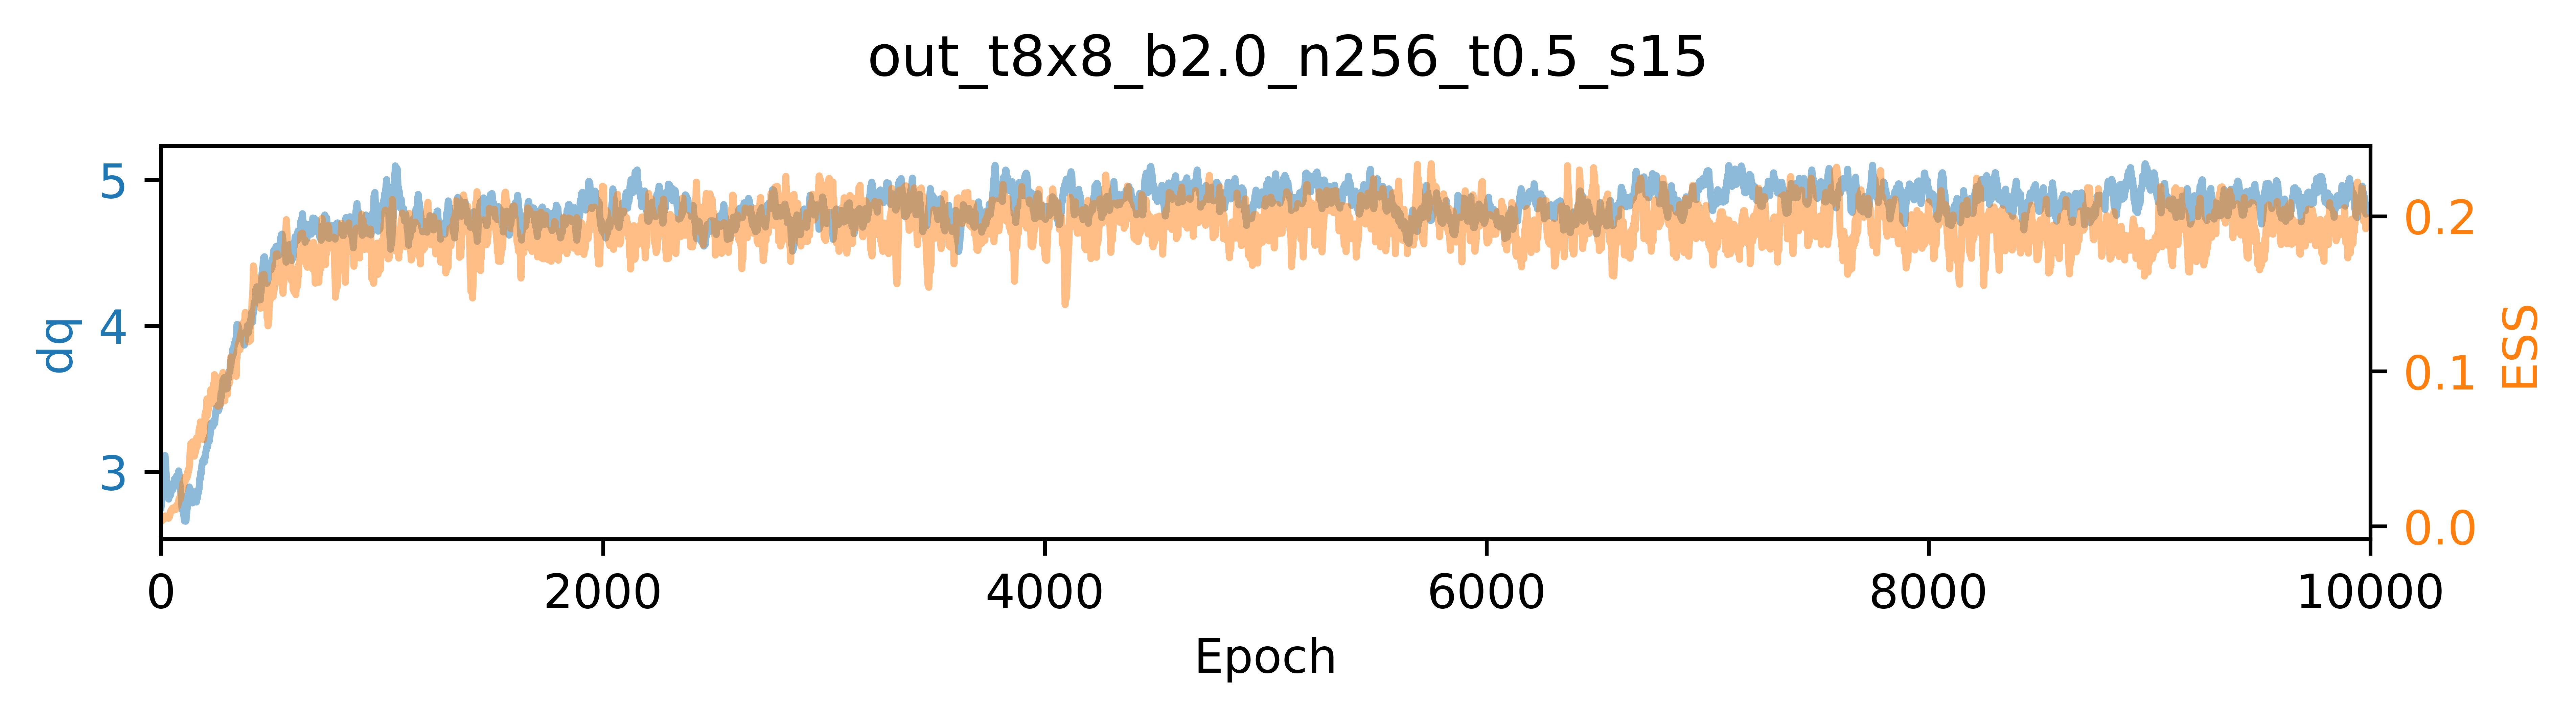

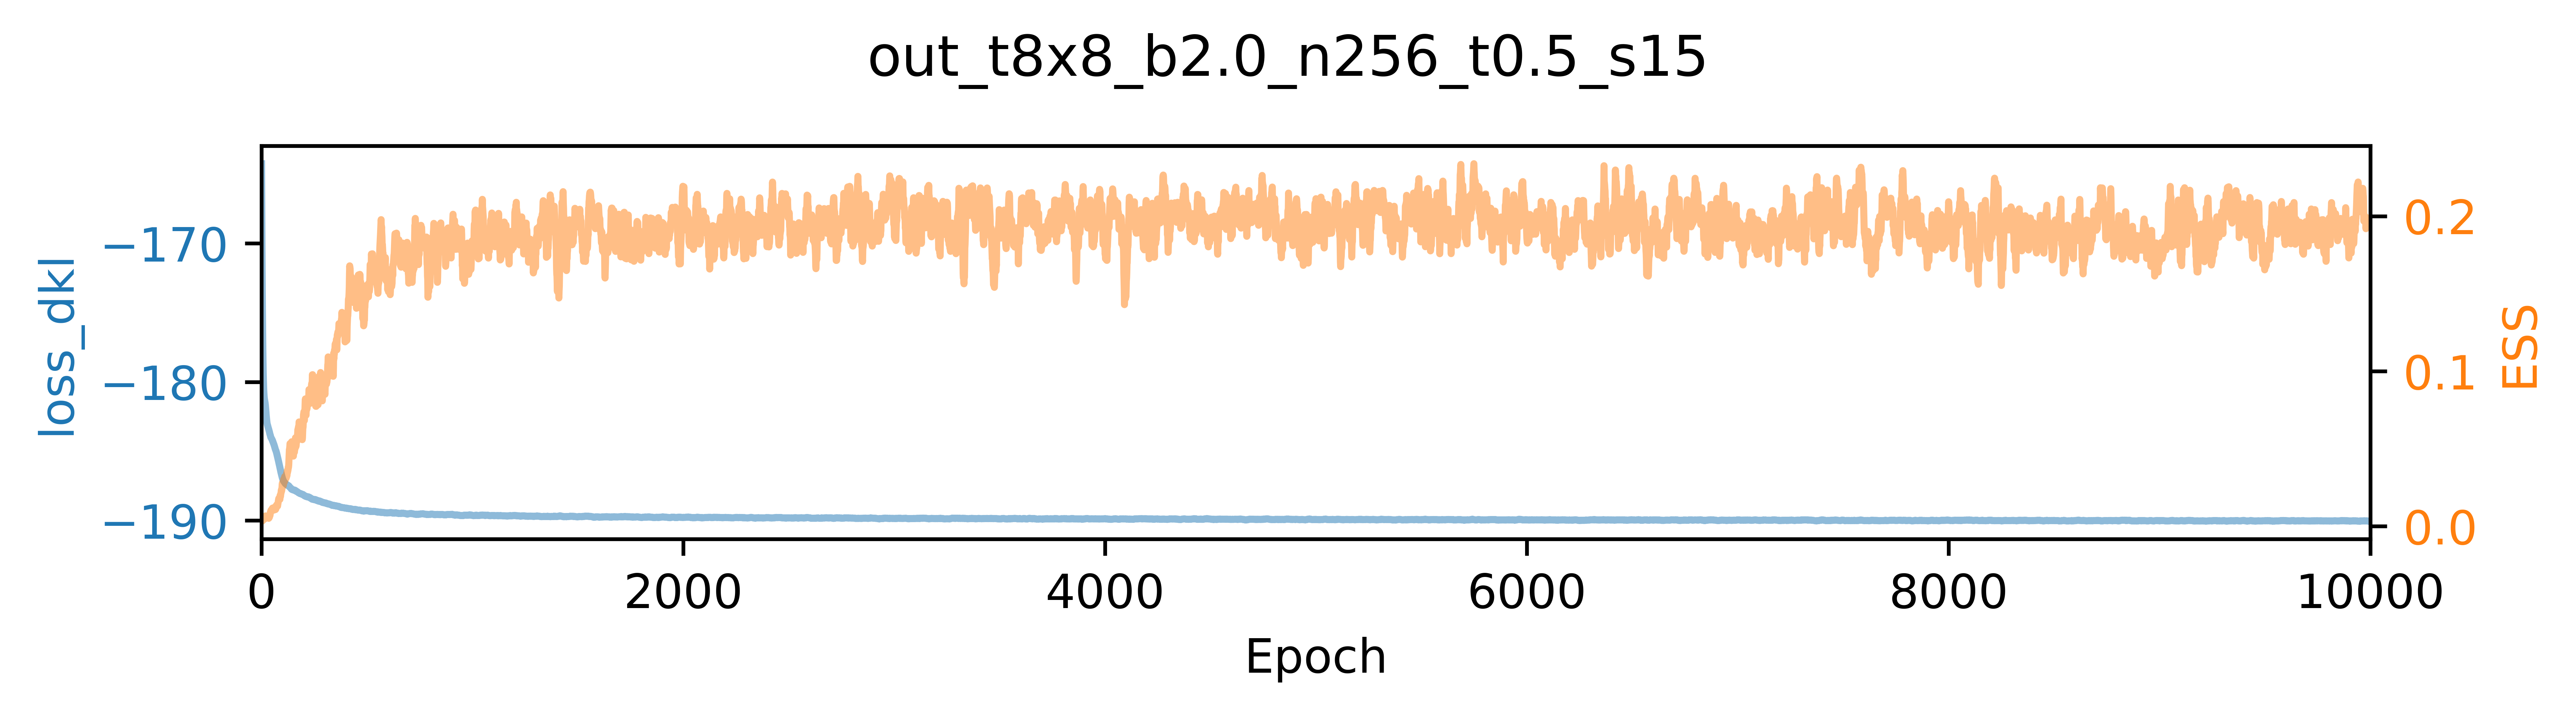

In [10]:
outputs = train(param,
                train_config,
                model=model_init,
                pre_model=None,
                logger=logger,
                figsize=(7.5, 2))
 
pre_flow_model = outputs['model']
pre_flow_history = outputs['history']
flow_act = outputs['action']

In [11]:
from train import generate_ensemble

outputs = generate_ensemble(pre_flow_model, flow_act, logger=logger)
u1_ens = outputs['ensemble']

pre_flow = pre_flow_model['layers']

[13:57:31]  accept_rate=0.3525390625

            top_susceptibility=1.30204 +/- 0.15121

In [12]:
train_force = False
flow_model = None

if train_force:
    flow_model, flow_act = flow_train(param, with_force=True, pre_model=pre_flow_model)
else:
    flow_model = pre_flow_model
    
u1_ens = generate_ensemble(flow_model, flow_act, logger=logger)
flow = flow_model['layers']
# flow.eval()

[13:59:02]  accept_rate=0.38671875

            top_susceptibility=1.34535 +/- 0.10231

TORCH DEVICE: cuda


TrainConfig(n_era=100, n_epoch=100, n_layers=32, n_s_nets=2, hidden_sizes=[8, 8], kernel_size=3, base_lr=0.001, batch_size=1024, print_freq=10, plot_freq=50, with_force=True)

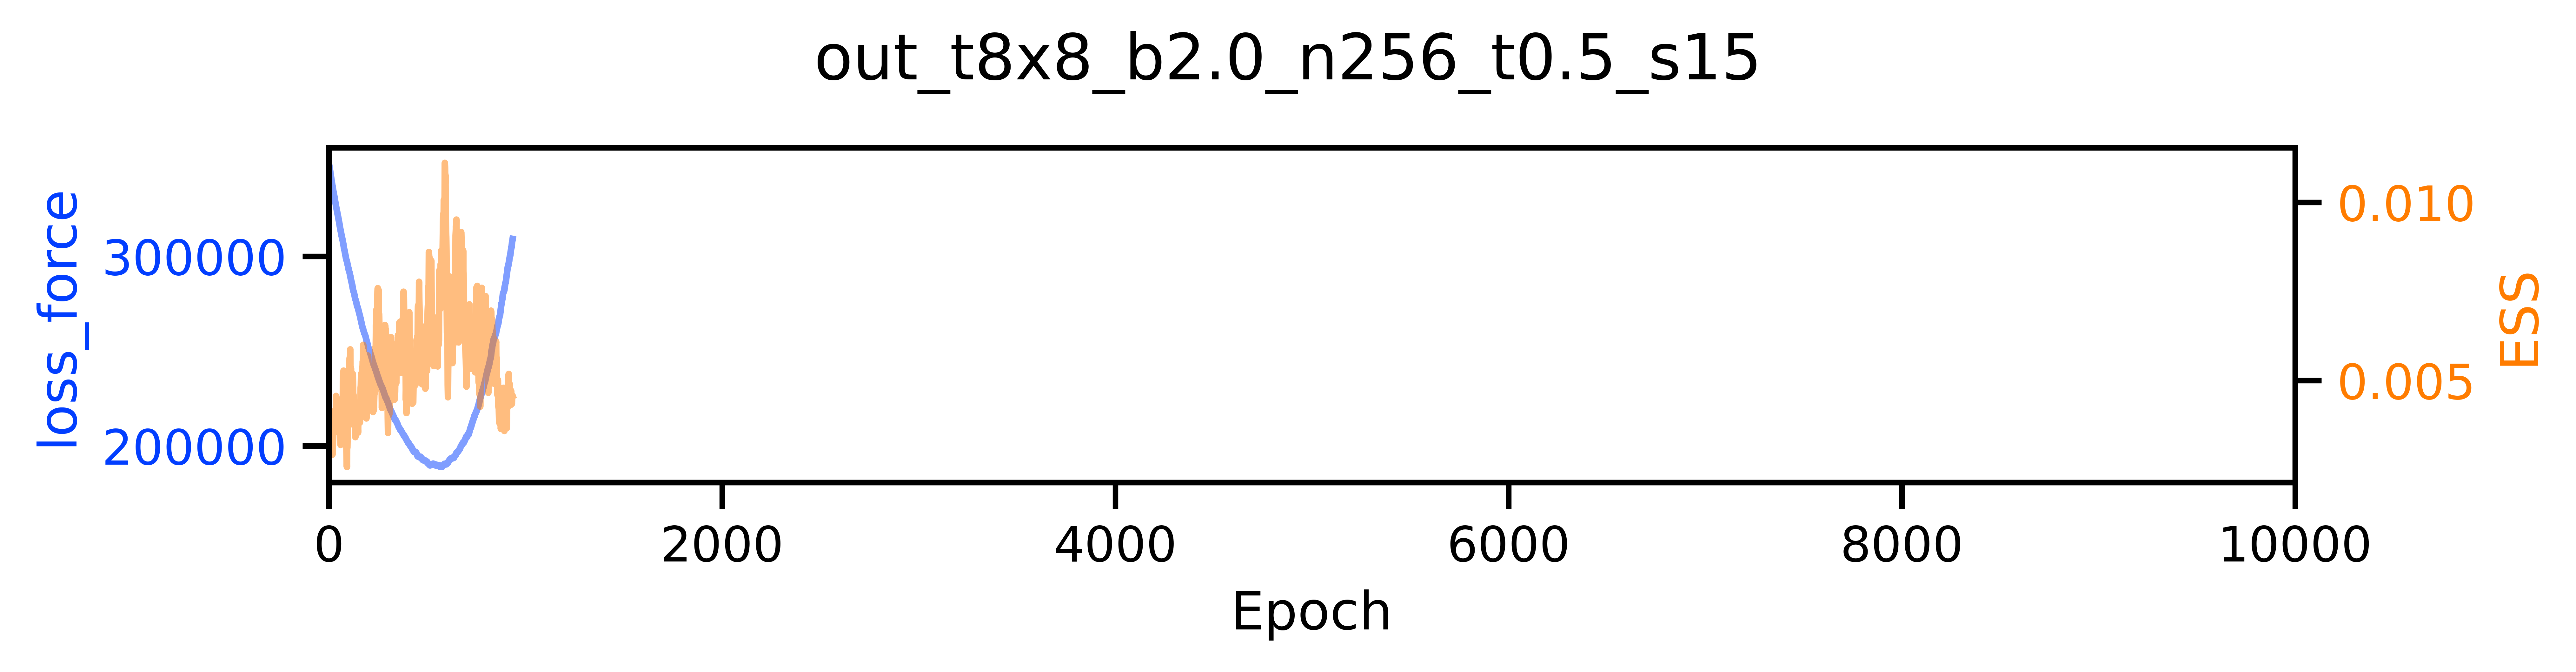

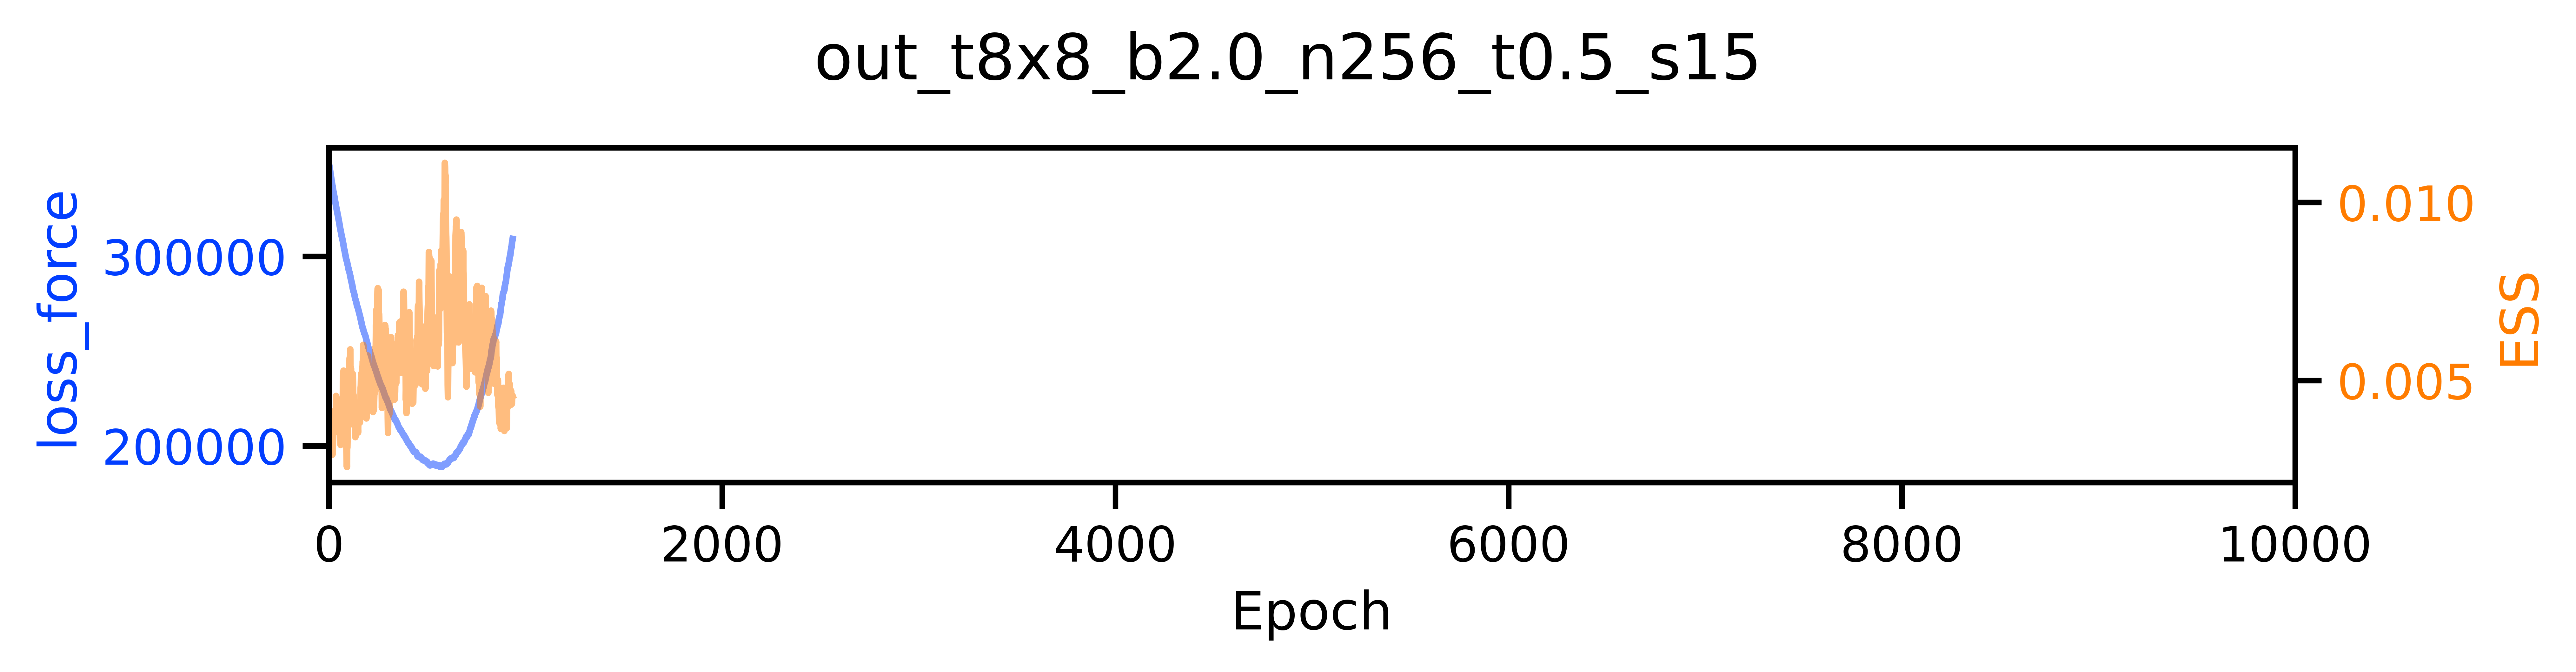

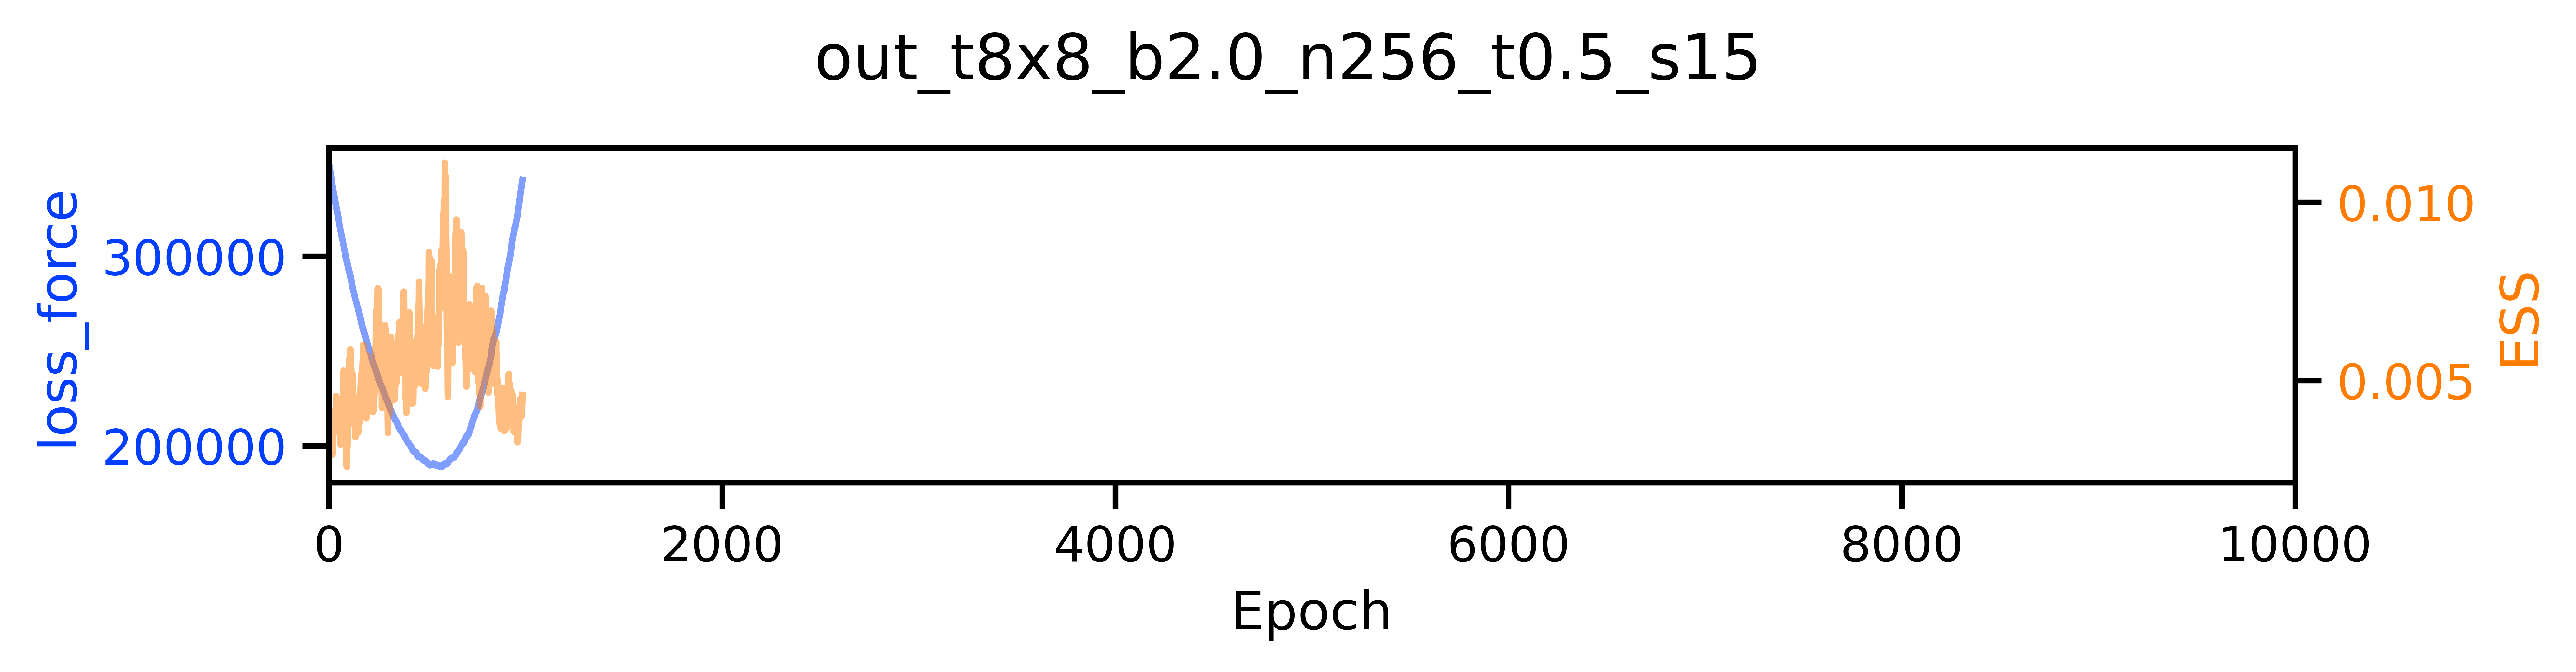

[13:59:55]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=0, last took: 0 min 0 s                                                                                                                                                                                                                         
            -------------------------------------------------------------------

[14:00:05]  epoch=7.000 dt=0.921 loss=349382.062 dq=0.170 ess=0.004 loss_dkl=0.000 logp=87.879 logq=-233.835 loss_force=349382.081 force_size=349382.062 force_norm=591.084

[14:00:15]  epoch=17.000 dt=0.918 loss=342618.562 dq=0.185 ess=0.004 loss_dkl=0.000 logp=87.827 logq=-233.471 loss_force=342618.556 force_size=342618.562 force_norm=585.334

[14:00:24]  epoch=27.000 dt=0.909 loss=335547.594 dq=0.173 ess=0.002 loss_dkl=0.000 logp=87.864 logq=-233.089 loss_force=335547.588 force_size=335547.594 force_norm=579.263

[14:00:33]  epoch=37.000 dt=0.918 loss=330418.812 dq=0.179 ess=0.006 loss_dkl=0.000 logp=88.006 logq=-232.717 loss_force=330418.812 force_size=330418.812 force_norm=574.820

[14:00:42]  epoch=47.000 dt=0.921 loss=325021.906 dq=0.184 ess=0.004 loss_dkl=0.000 logp=87.892 logq=-232.352 loss_force=325021.919 force_size=325021.906 force_norm=570.106

[14:00:54]  epoch=57.000 dt=0.919 loss=319582.062 dq=0.175 ess=0.005 loss_dkl=0.000 logp=87.619 logq=-232.025 loss_force=319582.069 force_size=319582.062 force_norm=565.314

[14:01:04]  epoch=67.000 dt=0.917 loss=312900.344 dq=0.192 ess=0.003 loss_dkl=0.000 logp=87.959 logq=-231.668 loss_force=312900.325 force_size=312900.344 force_norm=559.374

[14:01:13]  epoch=77.000 dt=0.917 loss=308271.500 dq=0.182 ess=0.006 loss_dkl=0.000 logp=88.000 logq=-231.302 loss_force=308271.494 force_size=308271.500 force_norm=555.219

[14:01:22]  epoch=87.000 dt=0.923 loss=302801.500 dq=0.181 ess=0.005 loss_dkl=0.000 logp=87.928 logq=-230.966 loss_force=302801.531 force_size=302801.500 force_norm=550.271

[14:01:31]  epoch=97.000 dt=0.921 loss=297788.656 dq=0.187 ess=0.002 loss_dkl=0.000 logp=87.973 logq=-230.636 loss_force=297788.644 force_size=297788.656 force_norm=545.699

[14:01:34]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=1, last took: 1 min 38.66 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:01:43]  epoch=7.000 dt=0.916 loss=293881.906 dq=0.191 ess=0.005 loss_dkl=0.000 logp=87.823 logq=-230.306 loss_force=293881.894 force_size=293881.906 force_norm=542.106

[14:01:53]  epoch=17.000 dt=0.922 loss=289758.938 dq=0.201 ess=0.004 loss_dkl=0.000 logp=87.725 logq=-229.992 loss_force=289758.938 force_size=289758.938 force_norm=538.291

[14:02:02]  epoch=27.000 dt=0.918 loss=283250.906 dq=0.198 ess=0.005 loss_dkl=0.000 logp=87.896 logq=-229.652 loss_force=283250.900 force_size=283250.906 force_norm=532.212

[14:02:11]  epoch=37.000 dt=0.919 loss=279002.062 dq=0.224 ess=0.004 loss_dkl=0.000 logp=87.818 logq=-229.334 loss_force=279002.044 force_size=279002.062 force_norm=528.206

[14:02:20]  epoch=47.000 dt=0.925 loss=275139.406 dq=0.226 ess=0.002 loss_dkl=0.000 logp=87.783 logq=-229.022 loss_force=275139.400 force_size=275139.406 force_norm=524.536

[14:02:32]  epoch=57.000 dt=0.925 loss=271364.625 dq=0.220 ess=0.004 loss_dkl=0.000 logp=87.911 logq=-228.693 loss_force=271364.650 force_size=271364.625 force_norm=520.926

[14:02:42]  epoch=67.000 dt=0.920 loss=267911.750 dq=0.213 ess=0.005 loss_dkl=0.000 logp=87.720 logq=-228.408 loss_force=267911.725 force_size=267911.750 force_norm=517.601

[14:02:51]  epoch=77.000 dt=0.921 loss=263966.656 dq=0.220 ess=0.006 loss_dkl=0.000 logp=87.844 logq=-228.072 loss_force=263966.628 force_size=263966.656 force_norm=513.774

[14:03:00]  epoch=87.000 dt=0.917 loss=260106.125 dq=0.236 ess=0.006 loss_dkl=0.000 logp=87.768 logq=-227.791 loss_force=260106.134 force_size=260106.125 force_norm=510.005

[14:03:09]  epoch=97.000 dt=0.915 loss=256895.906 dq=0.239 ess=0.003 loss_dkl=0.000 logp=87.761 logq=-227.481 loss_force=256895.891 force_size=256895.906 force_norm=506.847

[14:03:12]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=2, last took: 1 min 38.04 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:03:21]  epoch=7.000 dt=0.916 loss=252590.531 dq=0.234 ess=0.007 loss_dkl=0.000 logp=87.854 logq=-227.176 loss_force=252590.519 force_size=252590.531 force_norm=502.583

[14:03:31]  epoch=17.000 dt=0.916 loss=249466.250 dq=0.237 ess=0.004 loss_dkl=0.000 logp=87.855 logq=-226.882 loss_force=249466.247 force_size=249466.250 force_norm=499.463

[14:03:40]  epoch=27.000 dt=0.934 loss=245849.500 dq=0.242 ess=0.005 loss_dkl=0.000 logp=87.880 logq=-226.594 loss_force=245849.497 force_size=245849.500 force_norm=495.832

[14:03:49]  epoch=37.000 dt=0.941 loss=241978.219 dq=0.250 ess=0.004 loss_dkl=0.000 logp=87.771 logq=-226.296 loss_force=241978.222 force_size=241978.219 force_norm=491.912

[14:03:59]  epoch=47.000 dt=0.931 loss=239896.594 dq=0.267 ess=0.005 loss_dkl=0.000 logp=87.867 logq=-226.013 loss_force=239896.594 force_size=239896.594 force_norm=489.792

[14:04:11]  epoch=57.000 dt=0.929 loss=236458.672 dq=0.266 ess=0.007 loss_dkl=0.000 logp=87.933 logq=-225.733 loss_force=236458.669 force_size=236458.672 force_norm=486.268

[14:04:20]  epoch=67.000 dt=0.926 loss=233440.750 dq=0.283 ess=0.007 loss_dkl=0.000 logp=87.730 logq=-225.470 loss_force=233440.747 force_size=233440.750 force_norm=483.154

[14:04:29]  epoch=77.000 dt=0.938 loss=231496.125 dq=0.288 ess=0.005 loss_dkl=0.000 logp=87.817 logq=-225.185 loss_force=231496.138 force_size=231496.125 force_norm=481.139

[14:04:39]  epoch=87.000 dt=0.923 loss=228385.844 dq=0.289 ess=0.005 loss_dkl=0.000 logp=87.827 logq=-224.920 loss_force=228385.844 force_size=228385.844 force_norm=477.893

[14:04:48]  epoch=97.000 dt=0.920 loss=224627.422 dq=0.296 ess=0.007 loss_dkl=0.000 logp=87.823 logq=-224.624 loss_force=224627.419 force_size=224627.422 force_norm=473.947

[14:04:51]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=3, last took: 1 min 38.57 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:05:00]  epoch=7.000 dt=0.923 loss=223681.500 dq=0.293 ess=0.006 loss_dkl=0.000 logp=87.768 logq=-224.371 loss_force=223681.513 force_size=223681.500 force_norm=472.943

[14:05:09]  epoch=17.000 dt=0.917 loss=220285.281 dq=0.317 ess=0.007 loss_dkl=0.000 logp=87.759 logq=-224.120 loss_force=220285.284 force_size=220285.281 force_norm=469.344

[14:05:18]  epoch=27.000 dt=0.923 loss=217805.969 dq=0.330 ess=0.006 loss_dkl=0.000 logp=87.760 logq=-223.862 loss_force=217805.981 force_size=217805.969 force_norm=466.696

[14:05:28]  epoch=37.000 dt=0.917 loss=214853.875 dq=0.321 ess=0.005 loss_dkl=0.000 logp=87.969 logq=-223.547 loss_force=214853.878 force_size=214853.875 force_norm=463.520

[14:05:37]  epoch=47.000 dt=0.925 loss=213638.578 dq=0.340 ess=0.005 loss_dkl=0.000 logp=87.808 logq=-223.340 loss_force=213638.575 force_size=213638.578 force_norm=462.210

[14:05:49]  epoch=57.000 dt=0.939 loss=210256.344 dq=0.334 ess=0.004 loss_dkl=0.000 logp=88.008 logq=-223.047 loss_force=210256.341 force_size=210256.344 force_norm=458.537

[14:05:58]  epoch=67.000 dt=0.920 loss=209659.703 dq=0.366 ess=0.007 loss_dkl=0.000 logp=87.786 logq=-222.845 loss_force=209659.700 force_size=209659.703 force_norm=457.885

[14:06:08]  epoch=77.000 dt=0.925 loss=207670.125 dq=0.362 ess=0.006 loss_dkl=0.000 logp=87.796 logq=-222.596 loss_force=207670.116 force_size=207670.125 force_norm=455.707

[14:06:17]  epoch=87.000 dt=0.926 loss=205492.922 dq=0.374 ess=0.005 loss_dkl=0.000 logp=87.805 logq=-222.349 loss_force=205492.925 force_size=205492.922 force_norm=453.311

[14:06:26]  epoch=97.000 dt=0.925 loss=204436.375 dq=0.388 ess=0.002 loss_dkl=0.000 logp=87.810 logq=-222.129 loss_force=204436.381 force_size=204436.375 force_norm=452.141

[14:06:29]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=4, last took: 1 min 38.66 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:06:39]  epoch=7.000 dt=0.922 loss=201549.750 dq=0.392 ess=0.005 loss_dkl=0.000 logp=88.000 logq=-221.850 loss_force=201549.750 force_size=201549.750 force_norm=448.942

[14:06:48]  epoch=17.000 dt=0.926 loss=200807.328 dq=0.428 ess=0.007 loss_dkl=0.000 logp=87.855 logq=-221.653 loss_force=200807.331 force_size=200807.328 force_norm=448.112

[14:06:57]  epoch=27.000 dt=0.917 loss=199045.453 dq=0.449 ess=0.006 loss_dkl=0.000 logp=87.776 logq=-221.447 loss_force=199045.462 force_size=199045.453 force_norm=446.139

[14:07:07]  epoch=37.000 dt=0.919 loss=196275.000 dq=0.431 ess=0.007 loss_dkl=0.000 logp=88.069 logq=-221.148 loss_force=196274.987 force_size=196275.000 force_norm=443.027

[14:07:16]  epoch=47.000 dt=0.925 loss=197015.484 dq=0.468 ess=0.005 loss_dkl=0.000 logp=87.830 logq=-220.986 loss_force=197015.487 force_size=197015.484 force_norm=443.861

[14:07:28]  epoch=57.000 dt=0.916 loss=194583.312 dq=0.469 ess=0.006 loss_dkl=0.000 logp=87.991 logq=-220.721 loss_force=194583.303 force_size=194583.312 force_norm=441.116

[14:07:37]  epoch=67.000 dt=0.948 loss=194710.281 dq=0.510 ess=0.006 loss_dkl=0.000 logp=87.648 logq=-220.608 loss_force=194710.281 force_size=194710.281 force_norm=441.255

[14:07:47]  epoch=77.000 dt=0.928 loss=192931.703 dq=0.499 ess=0.004 loss_dkl=0.000 logp=87.887 logq=-220.364 loss_force=192931.706 force_size=192931.703 force_norm=439.239

[14:07:56]  epoch=87.000 dt=0.937 loss=192453.906 dq=0.533 ess=0.008 loss_dkl=0.000 logp=87.702 logq=-220.150 loss_force=192453.888 force_size=192453.906 force_norm=438.693

[14:08:06]  epoch=97.000 dt=0.927 loss=191742.609 dq=0.553 ess=0.006 loss_dkl=0.000 logp=87.870 logq=-219.955 loss_force=191742.606 force_size=191742.609 force_norm=437.883

[14:08:08]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=5, last took: 1 min 38.89 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:08:17]  epoch=7.000 dt=0.922 loss=191572.875 dq=0.596 ess=0.006 loss_dkl=0.000 logp=87.974 logq=-219.738 loss_force=191572.891 force_size=191572.875 force_norm=437.687

[14:08:27]  epoch=17.000 dt=0.938 loss=188759.875 dq=0.615 ess=0.005 loss_dkl=0.000 logp=87.971 logq=-219.539 loss_force=188759.872 force_size=188759.875 force_norm=434.464

[14:08:36]  epoch=27.000 dt=0.922 loss=190404.219 dq=0.640 ess=0.006 loss_dkl=0.000 logp=87.855 logq=-219.415 loss_force=190404.237 force_size=190404.219 force_norm=436.351

[14:08:46]  epoch=37.000 dt=0.926 loss=190117.359 dq=0.667 ess=0.006 loss_dkl=0.000 logp=87.840 logq=-219.256 loss_force=190117.356 force_size=190117.359 force_norm=436.022

[14:08:55]  epoch=47.000 dt=0.929 loss=189893.156 dq=0.675 ess=0.008 loss_dkl=0.000 logp=87.854 logq=-219.088 loss_force=189893.138 force_size=189893.156 force_norm=435.762

[14:09:07]  epoch=57.000 dt=0.922 loss=189959.328 dq=0.687 ess=0.006 loss_dkl=0.000 logp=87.882 logq=-218.947 loss_force=189959.316 force_size=189959.328 force_norm=435.843

[14:09:17]  epoch=67.000 dt=0.933 loss=189351.094 dq=0.775 ess=0.008 loss_dkl=0.000 logp=87.941 logq=-218.777 loss_force=189351.087 force_size=189351.094 force_norm=435.144

[14:09:26]  epoch=77.000 dt=0.925 loss=188289.188 dq=0.765 ess=0.009 loss_dkl=0.000 logp=87.942 logq=-218.588 loss_force=188289.191 force_size=188289.188 force_norm=433.913

[14:09:35]  epoch=87.000 dt=0.936 loss=189466.781 dq=0.851 ess=0.009 loss_dkl=0.000 logp=87.857 logq=-218.498 loss_force=189466.794 force_size=189466.781 force_norm=435.267

[14:09:45]  epoch=97.000 dt=0.935 loss=191083.781 dq=0.864 ess=0.011 loss_dkl=0.000 logp=87.743 logq=-218.430 loss_force=191083.766 force_size=191083.781 force_norm=437.131

[14:09:47]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=6, last took: 1 min 39.31 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:09:57]  epoch=7.000 dt=0.942 loss=190629.469 dq=0.919 ess=0.006 loss_dkl=0.000 logp=87.885 logq=-218.254 loss_force=190629.478 force_size=190629.469 force_norm=436.608

[14:10:06]  epoch=17.000 dt=0.937 loss=191891.094 dq=0.942 ess=0.006 loss_dkl=0.000 logp=87.862 logq=-218.170 loss_force=191891.084 force_size=191891.094 force_norm=438.049

[14:10:16]  epoch=27.000 dt=0.930 loss=193129.188 dq=1.004 ess=0.008 loss_dkl=0.000 logp=87.780 logq=-218.088 loss_force=193129.184 force_size=193129.188 force_norm=439.459

[14:10:25]  epoch=37.000 dt=0.924 loss=192908.656 dq=1.076 ess=0.008 loss_dkl=0.000 logp=87.845 logq=-217.964 loss_force=192908.672 force_size=192908.656 force_norm=439.210

[14:10:35]  epoch=47.000 dt=0.950 loss=193288.781 dq=1.116 ess=0.007 loss_dkl=0.000 logp=87.905 logq=-217.804 loss_force=193288.775 force_size=193288.781 force_norm=439.642

[14:10:47]  epoch=57.000 dt=0.921 loss=195993.531 dq=1.186 ess=0.015 loss_dkl=0.000 logp=87.822 logq=-217.798 loss_force=195993.544 force_size=195993.531 force_norm=442.708

[14:10:56]  epoch=67.000 dt=0.926 loss=196636.000 dq=1.203 ess=0.004 loss_dkl=0.000 logp=87.854 logq=-217.689 loss_force=196636.000 force_size=196636.000 force_norm=443.434

[14:11:05]  epoch=77.000 dt=0.926 loss=199392.766 dq=1.329 ess=0.009 loss_dkl=0.000 logp=87.792 logq=-217.659 loss_force=199392.759 force_size=199392.766 force_norm=446.531

[14:11:15]  epoch=87.000 dt=0.920 loss=201355.156 dq=1.371 ess=0.009 loss_dkl=0.000 logp=87.778 logq=-217.637 loss_force=201355.163 force_size=201355.156 force_norm=448.725

[14:11:24]  epoch=97.000 dt=0.919 loss=201640.859 dq=1.540 ess=0.008 loss_dkl=0.000 logp=87.942 logq=-217.510 loss_force=201640.859 force_size=201640.859 force_norm=449.037

[14:11:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=7, last took: 1 min 39.11 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:11:36]  epoch=7.000 dt=0.922 loss=205536.266 dq=1.604 ess=0.004 loss_dkl=0.000 logp=87.775 logq=-217.516 loss_force=205536.256 force_size=205536.266 force_norm=453.355

[14:11:45]  epoch=17.000 dt=0.925 loss=205960.453 dq=1.735 ess=0.010 loss_dkl=0.000 logp=87.939 logq=-217.413 loss_force=205960.453 force_size=205960.453 force_norm=453.802

[14:11:55]  epoch=27.000 dt=0.931 loss=209305.688 dq=1.881 ess=0.006 loss_dkl=0.000 logp=87.875 logq=-217.397 loss_force=209305.697 force_size=209305.688 force_norm=457.492

[14:12:04]  epoch=37.000 dt=0.925 loss=211053.406 dq=1.892 ess=0.005 loss_dkl=0.000 logp=87.923 logq=-217.440 loss_force=211053.400 force_size=211053.406 force_norm=459.401

[14:12:13]  epoch=47.000 dt=0.921 loss=215909.172 dq=2.033 ess=0.006 loss_dkl=0.000 logp=87.792 logq=-217.490 loss_force=215909.175 force_size=215909.172 force_norm=464.655

[14:12:25]  epoch=57.000 dt=0.931 loss=217781.297 dq=2.109 ess=0.005 loss_dkl=0.000 logp=87.906 logq=-217.498 loss_force=217781.294 force_size=217781.297 force_norm=466.660

[14:12:35]  epoch=67.000 dt=0.937 loss=220280.406 dq=2.265 ess=0.006 loss_dkl=0.000 logp=88.022 logq=-217.518 loss_force=220280.378 force_size=220280.406 force_norm=469.332

[14:12:44]  epoch=77.000 dt=0.935 loss=225510.047 dq=2.505 ess=0.006 loss_dkl=0.000 logp=87.762 logq=-217.556 loss_force=225510.062 force_size=225510.047 force_norm=474.862

[14:12:54]  epoch=87.000 dt=0.933 loss=227618.406 dq=2.657 ess=0.008 loss_dkl=0.000 logp=87.808 logq=-217.656 loss_force=227618.406 force_size=227618.406 force_norm=477.088

[14:13:03]  epoch=97.000 dt=0.937 loss=233135.078 dq=2.854 ess=0.005 loss_dkl=0.000 logp=87.780 logq=-217.669 loss_force=233135.075 force_size=233135.078 force_norm=482.834

[14:13:06]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=8, last took: 1 min 39.36 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:13:16]  epoch=7.000 dt=0.947 loss=236182.047 dq=2.981 ess=0.009 loss_dkl=0.000 logp=87.833 logq=-217.797 loss_force=236182.069 force_size=236182.047 force_norm=485.983

[14:13:25]  epoch=17.000 dt=0.943 loss=239802.297 dq=3.205 ess=0.004 loss_dkl=0.000 logp=87.877 logq=-217.840 loss_force=239802.316 force_size=239802.297 force_norm=489.689

[14:13:35]  epoch=27.000 dt=0.952 loss=243964.578 dq=3.340 ess=0.005 loss_dkl=0.000 logp=87.996 logq=-217.924 loss_force=243964.566 force_size=243964.578 force_norm=493.909

[14:13:44]  epoch=37.000 dt=0.941 loss=250139.781 dq=3.666 ess=0.009 loss_dkl=0.000 logp=87.859 logq=-218.064 loss_force=250139.772 force_size=250139.781 force_norm=500.127

[14:13:54]  epoch=47.000 dt=0.935 loss=257501.578 dq=3.939 ess=0.003 loss_dkl=0.000 logp=87.857 logq=-218.235 loss_force=257501.566 force_size=257501.578 force_norm=507.440

[14:14:06]  epoch=57.000 dt=0.943 loss=259806.422 dq=4.185 ess=0.004 loss_dkl=0.000 logp=87.863 logq=-218.307 loss_force=259806.419 force_size=259806.422 force_norm=509.689

[14:14:15]  epoch=67.000 dt=0.939 loss=265401.875 dq=4.630 ess=0.004 loss_dkl=0.000 logp=87.947 logq=-218.420 loss_force=265401.881 force_size=265401.875 force_norm=515.169

[14:14:25]  epoch=77.000 dt=0.929 loss=269149.531 dq=4.803 ess=0.004 loss_dkl=0.000 logp=87.898 logq=-218.569 loss_force=269149.531 force_size=269149.531 force_norm=518.787

[14:14:34]  epoch=87.000 dt=0.931 loss=277336.844 dq=5.102 ess=0.004 loss_dkl=0.000 logp=87.815 logq=-218.762 loss_force=277336.856 force_size=277336.844 force_norm=526.615

[14:14:44]  epoch=97.000 dt=0.926 loss=283709.562 dq=5.382 ess=0.003 loss_dkl=0.000 logp=87.848 logq=-218.911 loss_force=283709.562 force_size=283709.562 force_norm=532.635

[14:14:46]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=9, last took: 1 min 40.39 s                                                                                                                                                                                                                     
            -------------------------------------------------------------------

[14:14:56]  epoch=7.000 dt=0.935 loss=285669.438 dq=5.824 ess=0.003 loss_dkl=0.000 logp=87.934 logq=-219.052 loss_force=285669.431 force_size=285669.438 force_norm=534.469

[14:15:05]  epoch=17.000 dt=0.943 loss=293721.562 dq=6.134 ess=0.005 loss_dkl=0.000 logp=87.810 logq=-219.229 loss_force=293721.544 force_size=293721.562 force_norm=541.958

[14:15:15]  epoch=27.000 dt=0.930 loss=297774.844 dq=6.368 ess=0.005 loss_dkl=0.000 logp=87.792 logq=-219.463 loss_force=297774.850 force_size=297774.844 force_norm=545.679

[14:15:24]  epoch=37.000 dt=0.941 loss=306798.812 dq=6.906 ess=0.004 loss_dkl=0.000 logp=87.724 logq=-219.667 loss_force=306798.787 force_size=306798.812 force_norm=553.871

[14:15:34]  epoch=47.000 dt=0.938 loss=313975.125 dq=7.323 ess=0.004 loss_dkl=0.000 logp=87.735 logq=-219.912 loss_force=313975.144 force_size=313975.125 force_norm=560.329

[14:15:46]  epoch=57.000 dt=0.942 loss=316753.250 dq=7.364 ess=0.004 loss_dkl=0.000 logp=87.995 logq=-220.034 loss_force=316753.269 force_size=316753.250 force_norm=562.805

[14:15:56]  epoch=67.000 dt=0.950 loss=321251.625 dq=7.780 ess=0.003 loss_dkl=0.000 logp=87.877 logq=-220.195 loss_force=321251.619 force_size=321251.625 force_norm=566.789

[14:16:05]  epoch=77.000 dt=0.937 loss=330103.312 dq=8.314 ess=0.005 loss_dkl=0.000 logp=87.788 logq=-220.461 loss_force=330103.325 force_size=330103.312 force_norm=574.531

[14:16:15]  epoch=87.000 dt=0.938 loss=337821.812 dq=8.716 ess=0.005 loss_dkl=0.000 logp=87.909 logq=-220.606 loss_force=337821.794 force_size=337821.812 force_norm=581.211

[14:16:25]  epoch=97.000 dt=0.949 loss=343318.375 dq=9.343 ess=0.005 loss_dkl=0.000 logp=87.718 logq=-220.919 loss_force=343318.375 force_size=343318.375 force_norm=585.924

[14:16:27]  -------------------------------------------------------------------                                                                                                                                                                                 
            ERA=10, last took: 1 min 40.83 s                                                                                                                                                                                                                    
            -------------------------------------------------------------------

[14:16:37]  epoch=7.000 dt=0.951 loss=348071.156 dq=9.435 ess=0.007 loss_dkl=0.000 logp=87.687 logq=-221.123 loss_force=348071.144 force_size=348071.156 force_norm=589.968

[14:16:46]  epoch=17.000 dt=0.944 loss=357047.250 dq=9.986 ess=0.006 loss_dkl=0.000 logp=87.706 logq=-221.390 loss_force=357047.244 force_size=357047.250 force_norm=597.528

[14:16:56]  epoch=27.000 dt=0.929 loss=357202.562 dq=10.028 ess=0.003 loss_dkl=0.000 logp=87.912 logq=-221.442 loss_force=357202.562 force_size=357202.562 force_norm=597.646

[14:17:05]  epoch=37.000 dt=0.934 loss=364697.812 dq=10.674 ess=0.004 loss_dkl=0.000 logp=87.877 logq=-221.670 loss_force=364697.775 force_size=364697.812 force_norm=603.899

In [ ]:
import seaborn as sns

from dataclasses import asdict
from copy import deepcopy
from utils.distributions import MultivariateUniform
from utils.layers import make_u1_equiv_layers, set_weights
from math import pi as PI
import utils.qed_helpers as qed

TWO_PI = 2 * PI
# from train import train

sns.set_context('notebook')
sns.set_palette('bright')

train_cfg_force = asdict(train_config)
train_cfg_force['with_force'] = True

tconfig_force = TrainConfig(**train_cfg_force)

link_shape = (2, *param.lat)
lattice_shape = tuple(param.lat)
u1_action = qed.BatchAction(param.beta)

prior = MultivariateUniform(torch.zeros(link_shape),
                            TWO_PI * torch.ones(link_shape))

tconfig_force
layers = make_u1_equiv_layers(lattice_shape=lattice_shape,
                              n_layers=tconfig_force.n_layers,
                              n_mixture_comps=tconfig_force.n_s_nets,
                              hidden_sizes=tconfig_force.hidden_sizes,
                              kernel_size=tconfig_force.kernel_size)

set_weights(layers)

model_force = {
    'prior': prior,
    'layers': layers,
}
                              

outputs = train(param, tconfig_force,
                model=model_force,
                pre_model=pre_flow_model,
                figsize=(8, 2.),
                use_alt=False,
                force_factor=0.001,
                dkl_factor=1.)#, logger=logger)

flow_model_force = outputs['model']
flow_model_force_history = outputs['history']
flow_action_force = outputs['action']

In [ ]:
def test_force(
    param: Param,
    model: dict,
    x: torch.Tensor = None,
    pre_model: dict = None
):
    """Test the force.
    
    If `x` is None:
      - Draw samples `xi (~ pre_prior)` from prior and pass through `pre_model` to get `x (~ pre_posterior)`.
     
    Pass `x` backwards through the `model` to get `xi (~ prior)`.
    
    Calculate `force(xi)` and `norm(force(xi))`.
    """
    if x is None:
        if pre_model is None:
            raise ValueError(f'Either `x` or `pre_model` must be specified.')
            
        # Draw samples `xi` from prior
        pre_xi = pre_model['prior'].sample_n(1)
        
        # Pass `xi` through layers in `pre_model`
        x = qed.ft_flow(pre_model['layers'], pre_xi)
        
    # Pass `x` backwards through layers in `model`
    xi = qed.ft_flow_inv(model['layers'], x)
    # Calculate force
    force = qed.ft_force(param, model['layers'], xi)
    force_norm = torch.linalg.norm(force)
    return force_norm

In [ ]:
from train import run as hmc_run
fields, metrics = hmc_run(param, logger=logger, keep_fields=True)

#metrics_dir = os.path.join(OUTDIR, 'metrics', 'hmc')
#metrics_file = os.path.join(metrics_dir, 'metrics.z')
#io.savez(metrics, metrics_file)

In [ ]:
#field_arr = torch.stack(tuple(fields.values()), dim=0)
len(fields)
#
field_arr = np.array([qed.grab(torch.stack(i)) for i in fields])
field_arr.shape
#logger.log(field_arr.shape)

In [ ]:
for field in field_arr:
    force_tf = test_force(param, flow_model_force, pre_model=pre_flow_model)
    logger.log(f'ft_flow(players, pxi), (pxi ~ pre_prior): {force_tf:.5g}') 
    
    x = torch.from_numpy(field[-1]).squeeze()[None, :]
    if torch.cuda.is_available():
        x = x.cuda()
    
    #x_ = field_arr.squeeze()[None, :]
    force_ = test_force(param, flow_model_force, x=x, pre_model=pre_flow_model)
    logger.log(f'ft_flow(layers, field_arr), (pxi ~ pre_prior): {force_:.5g}')

In [ ]:
# field_arr generated from generic HMC run
for idx, fields in enumerate(field_arr):
    # x generated from HMC
    x = torch.from_numpy(fields)
    if torch.cuda.is_available():
        x = x.cuda()
        
    # flow HMC samples backwards through `flow_model_force` and calculate force
    force1 = test_force(param, flow_model_force, x=x)
    
    # sample x ~ pre_flow_model_prior, flow through `pre_flow_model` to get xi 
    # flow xi backwards through `flow_model_force` and calculate force
    force2 = test_force(param, flow_model_force, pre_model=pre_flow_model)
    
    logger.log(f'run={idx}\n'
               f'  (xi ~ HMC): force_xi={force1:.5g}\n'
               f"  (xi ~ pre_flow_model_prior): force_xi_pre={force2:.5g}")

In [ ]:
#field_run = torch.stack(tuple(fields.values()), dim=0)
##flows = flow

#x0 = field_arr[0][None, :]
#x = field_arr[0][None, :]

# select last trajectory from last run
x = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()
x0 = torch.from_numpy(field_arr[-1][-1][None, :]).cuda()

if torch.cuda.is_available():
    x = x.cuda()

plaq0 = qed.action(param, x) / (-param.beta * param.volume)
logger.log(f'plaq(field_arr[0])={plaq0:.8g}')

#logger\.log(f'plaq(field_run[0]) {qed.action(param, x) / (-param.beta*param.volume)}')
# field.requires_grad_(True)
#x = field_run[0][None, :]
logJ = 0.0
for layer in reversed(flow_model_force['layers']):
    x, lJ = layer.reverse(x)
    logJ += lJ

# x is the prior distribution now
    
x.requires_grad_(True)
    
y = x
logJy = 0.0
for layer in flow_model_force['layers']:
    y, lJ = layer.forward(y)
    logJy += lJ
    
s = qed.action(param, y[0][None, :]) - logJy

logger.log(f'sum(logJ): {qed.grab(logJ.sum())}')
logger.log(f'sum(logJy): {qed.grab(logJy.sum())}')
#print(logJ,logJy)


# print("eff_action", s + 136.3786)

logger.log(f'original_action: {qed.action(param, y[0][None, :]) + 91}')
#print("original_action", qed.action(param, y[0][None, :]) + 91)

logger.log(f'eff_action: {s + 56}')
#print("eff_action", {s + 56)

s.backward()

f = x.grad

x.requires_grad_(False)

logger.log(f'plaq(x) {qed.action(param, x[0][None, :]) / (-param.beta*param.volume)}  logJ {qed.grab(logJ)}  force.norm {torch.linalg.norm(f)}')
logger.log(f'plaq(y) {qed.action(param, y[0][None, :]) / (-param.beta*param.volume)}')
logger.log(f'plaq(x) {qed.action(param, x0) / (-param.beta*param.volume)}  force.norm {torch.linalg.norm(qed.force(param, x0))}')

In [ ]:
logger.log(x.shape)

field_tensor = torch.from_numpy(field_arr).cuda()

x = qed.ft_flow_inv(flow, field_tensor[-1])
# x = field_run
#for layer in reversed(flows):
#    x, lJ = layer.reverse(x)
ff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(ff))
fff = qed.ft_force(param, flow, x)
logger.log(torch.linalg.norm(fff))

In [ ]:
x = qed.ft_flow_inv(flow, field_tensor[-1])
logger.log(qed.grab(qed.ft_action(param, flow, x)))